### Explore Data

In [1]:
# Enforce nullable-integer dtypes for columns that should be whole numbers
def enforce_int_like(df):
    int_like = {
        "PROMPT_CHAR","WORD","WORD_ID","WORD_LEN_KEYS",
        "CONFIDENT_MARKED_CHAR","UNCONFIDENT_MARKED_CHAR",
        "D1U1","D1D2","U1U2","D1U2","U1D2",
        "WORD_DURATION","WORD_GAP_AFTER","OVERLAP_FLAG"
    }
    for c in (int_like & set(df.columns)):
        df[c] = pd.to_numeric(df[c], errors="coerce").round().astype("Int64")
    return df


In [2]:
import glob
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy.ma.core import count

folder = 'data/keystrokes'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

dfs = []
for file in all_files:
    df = pd.read_csv(file)
    df = enforce_int_like(df)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data = pd.concat(dfs, ignore_index=True)
subset_cols = [c for c in ["SOURCE_FILE","PRESS_TIME","RELEASE_TIME","KEYCODE"] if c in data.columns]
data = data.drop_duplicates(subset=subset_cols, ignore_index=True)


# unique participant_ids count
def unique_participant_ids(dataframe):
    unique_participants = dataframe['PARTICIPANT_ID'].nunique()
    print(f"Count of unique PARTICIPANT_IDs: {unique_participants}")

# print all ids
def print_pids(folder):
    unique_ids = set()

    for file in folder:
        with open(file, 'r', encoding='utf-8') as f:
            reader = csv.reader(f)
            header = next(reader)
            try:
                pid_idx = header.index('PARTICIPANT_ID')
            except ValueError:
                continue  # Skip files without the column
            for row in reader:
                if len(row) > pid_idx:
                    participant_id = row[pid_idx]
                    unique_ids.add(participant_id)

    print("Unique PARTICIPANT_IDs:")
    for pid in unique_ids:
        print(pid)
    print(f"Total unique PARTICIPANT_IDs: {len(unique_ids)}")

#submission per participant id
def submissions_per_pid(dataframe):
    files_per_participant = dataframe.groupby('PARTICIPANT_ID')['SOURCE_FILE'].nunique()
    files_per_participant.plot(kind='bar')
    plt.title('Data per PARTICIPANT_ID')
    plt.xlabel('PARTICIPANT_ID')
    plt.ylabel('Data')
    plt.show()

# usage time
def usage_time(df):
    return df['RELEASE_TIME'].max() - df['PRESS_TIME'].min()

# usage_times = data.groupby('PARTICIPANT_ID').apply(usage_time)
# print("total time passed PARTICIPANT_ID (ms):")
# print(usage_times)

# frequency
def show_frequency(dataframe):
    plt.figure()
    dataframe['FREQUENCY'].value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of FREQUENCY')
    plt.xlabel('FREQUENCY')
    plt.ylabel('Count')
    plt.show()

# count columns
def count_rows(folder):
    df_rows_count_current = []
    for file in folder:
        df_current = pd.read_csv(file)
        df_current = enforce_int_like(df_current)
        df_current['ROW_COUNT'] = len(df_current)
        df_rows_count_current.append(df_current)
    df_rows_count = pd.concat(df_rows_count_current, ignore_index=True)
    print(df_rows_count)

    # calculate time passing for each file

def calculate_time_per_file(folder):
    df_calculate_time_current = []
    for file in folder:
        df_current = pd.read_csv(file)
        df_current = enforce_int_like(df_current)
        df_current['TIME_PASSING'] = df_current['RELEASE_TIME'] - df_current['PRESS_TIME']
        df_calculate_time_current.append(df_current)
    df_calculate_time = pd.concat(df_calculate_time_current, ignore_index=True)
    print(df_calculate_time)

# 5. length of rows per file
def prompt_length_per_file(df):
    return df['PROMPT'].astype(str).apply(len).sum()

# prompt_lengths = data.groupby('SOURCE_FILE').apply(prompt_length_per_file)
# print("Length of PROMPT Columns per file:")
# print(prompt_lengths)

In [3]:
import os

def is_valid_participant_id(pid):
    # Checks if the id is 24 chars, only lowercase letters and digits
    return bool(re.fullmatch(r'[a-z0-9]{24}', str(pid)))

def print_invalid_participant_ids(file_paths):
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            df = enforce_int_like(df)
            for pid in df.get('PARTICIPANT_ID', []):
                if not is_valid_participant_id(pid):
                    print(f"Invalid PARTICIPANT_ID in file {path}: {pid}")
        except Exception as e:
            print(f"Error reading {path}: {e}")

def print_unique_valid_participant_ids(file_paths):
    valid_ids = set()
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            df = enforce_int_like(df)
            for pid in df.get('PARTICIPANT_ID', []):
                if is_valid_participant_id(pid):
                    valid_ids.add(pid)
        except Exception as e:
            print(f"Error reading {path}: {e}")
    print("Unique valid PARTICIPANT_IDs:")
    for pid in valid_ids:
        print(pid)
    print(f"Total valid PARTICIPANT_IDs: {len(valid_ids)}")

folder = 'data/keystrokes'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

print_invalid_participant_ids(all_files)
print_unique_valid_participant_ids(all_files)

Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827082827.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091333.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091443.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091551.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091705.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091734.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091841.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091947.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827092128.csv: name 're' is not defined
E

In [4]:
# print(unique_participant_ids(data))
# print(print_pids(all_files))
# print(submissions_per_pid(data))
#
# usage_times = data.groupby('PARTICIPANT_ID').apply(usage_time)
# print("total time passed PARTICIPANT_ID (ms):")
# print(usage_times)
#
# print(show_frequency(data))
#
# prompt_lengths = data.groupby('SOURCE_FILE').apply(prompt_length_per_file)
# print("Length of PROMPT Columns per file:")
# print(prompt_lengths)

### Failure given data having invalid characters -> clean data

In [5]:
import re
import shutil
import os

def is_valid_participant_id(pid):
    # Checks if the id is 24 chars, only lowercase letters and digits
    return bool(re.fullmatch(r'[a-z0-9]{24}', str(pid)))

def get_files_with_invalid_participant_ids(file_paths):
    invalid_files = set()
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            df = enforce_int_like(df)
            for pid in df.get('PARTICIPANT_ID', []):
                if not is_valid_participant_id(pid):
                    invalid_files.add(path)
                    break
        except Exception as e:
            print(f"Error reading {path}: {e}")
    return invalid_files

# Example usage:
invalid_files = get_files_with_invalid_participant_ids(all_files)
os.makedirs('data/valid_keystrokes', exist_ok=True)
for file in all_files:
    if file not in invalid_files:
        shutil.copy(file, os.path.join('data/valid_keystrokes', os.path.basename(file)))

In [6]:
import csv

folder = 'data/valid_keystrokes'
all_valid_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]


dfs = []
for file in all_valid_files:
    df = pd.read_csv(file)
    df = enforce_int_like(df)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data_id_cleaned = pd.concat(dfs, ignore_index=True)
subset_cols = [c for c in ["SOURCE_FILE","PRESS_TIME","RELEASE_TIME","KEYCODE"] if c in data_id_cleaned.columns]
data_id_cleaned = data_id_cleaned.drop_duplicates(subset=subset_cols, ignore_index=True)



### with cleaned id overview

Count of unique PARTICIPANT_IDs: 136
None
Unique PARTICIPANT_IDs:
6672fea3fe6378e257b6ef25
57507e67fcaa630007cb9ad2
67bb91a04f5f96b7ac52242d
5962a9280b835400010a7617
5f29eff59714081a3594a331
6725030a6ee43d8130ceefc5
65feaaac53eb219f09ad5ea0
65fc95c627592d85499ae358
66321cfc446914f3b199e193
5dd671942b033b5ec8bc97b4
5883a935c0c9a10001df6345
608ab8b9eb657a41933a4ec9
615921b85071b9caef6148d8
6682afdddc274c7cc3e4ea16
649dba79b97070557ebe3d0b
64e8b6f73929dae22fc25705
5de90f54a48441037ac21f43
6643495b44af166c626762cd
6538097b8793d9b90adc4667
5f600669b846780f0fe45709
5ed02ffb8090240f93ab74ad
65f333c755d191fcd18fa279
60f06a479c4f3ec0a536d40a
663378460f834e9670d1508c
664b33c7c40530f620a719a0
6527f153bea7b2d7c0d556e4
6140ef8d27499e70e8740918
663068f52490bf6d13f95968
5ea4cebb8944a8495280db42
66324d7b75233b6df004695d
66bb6b7e0ccbed81f3ed30a8
67acbb030811018b016dcaf7
57c357770e6a1f00015f6038
65fda4aa45ba55e983e2a2d9
60efc4347ae709f7f3dd8b04
67450bce7a49cb1c784dcc2b
65f03cac071873738667ccbb
676797a57

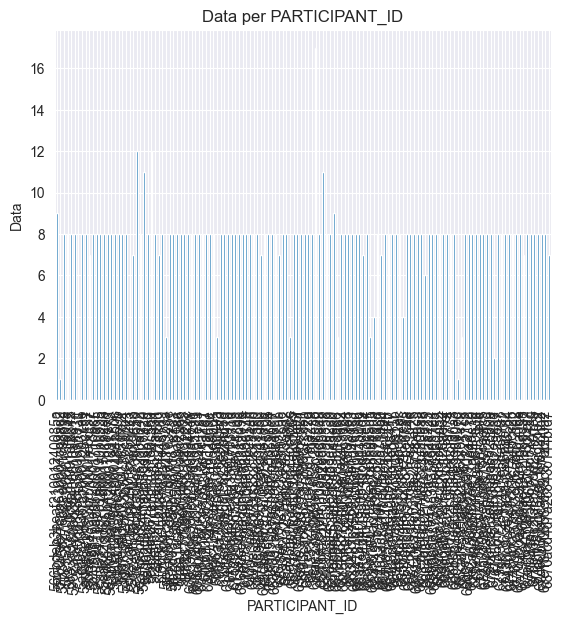

None
total time passed PARTICIPANT_ID (ms):
PARTICIPANT_ID
566bdeb3beaf21001240085a    11436794
57507e67fcaa630007cb9ad2      124106
57b345d276b2ea0001c988bc      476638
57c357770e6a1f00015f6038     1162911
5883a935c0c9a10001df6345      825654
                              ...   
67be486c2fafa97dd2710135      408449
67d01f812bf82a710cd2193f     1480021
67d80b3db0cac8b1bd982fb2      404790
67e184908b8cd53c87ac90a2     1439517
6870acd4d7a2c843c144bfd7     7504700
Length: 136, dtype: int64


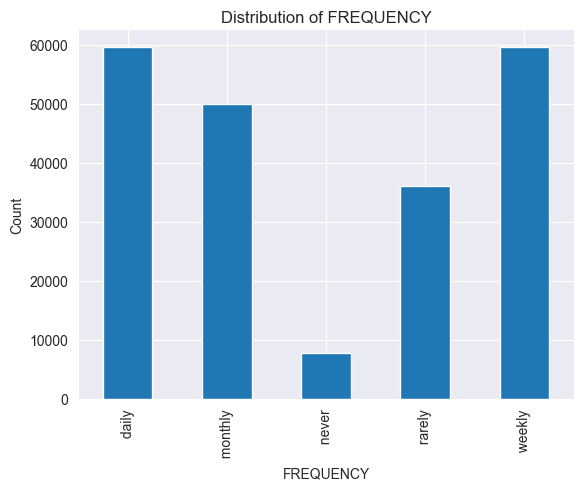

None
Length of PROMPT Columns per file:
SOURCE_FILE
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827082827.csv     59427
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091333.csv    143934
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091443.csv     36414
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091551.csv     30056
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091705.csv     53289
                                                                                 ...  
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074523.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074524.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074750.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074751.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074752.csv  

In [7]:
print(unique_participant_ids(data_id_cleaned))
print(print_pids(all_valid_files))
print(submissions_per_pid(data_id_cleaned))

usage_times = data_id_cleaned.groupby('PARTICIPANT_ID').apply(usage_time, include_groups=False)
print("total time passed PARTICIPANT_ID (ms):")
print(usage_times)

print(show_frequency(data_id_cleaned))

prompt_lengths = data_id_cleaned.groupby('SOURCE_FILE').apply(prompt_length_per_file, include_groups=False)
print("Length of PROMPT Columns per file:")
print(prompt_lengths)

print(count_rows(all_valid_files))

print(calculate_time_per_file(all_valid_files))

## Folder contains participant ids with more than 8 submissions

In [8]:
import os
import shutil
from collections import Counter
from pathlib import Path
import pandas as pd

def clean_full_submission(folder: str | os.PathLike) -> dict:
    """
    Scan `folder` for CSVs, count how many files each PARTICIPANT_ID appears in
    (counting once per file), and create 'data/full_submissions' containing only
    files whose PARTICIPANT_ID appears in exactly 8 files.

    Returns:
        {
            "counts": Counter({participant_id: num_files, ...}),
            "ids_exactly_8": set([...]),
            "ids_less_than_8": set([...]),
            "ids_more_than_8": set([...]),
            "file_to_id": {Path(...): "participant_id", ...},
            "output_dir": Path("data/full_submissions"),
            "problems": [(Path(...), "message"), ...],
        }
    """
    folder = Path(folder)
    csv_files = sorted(p for p in folder.glob("*.csv") if p.is_file())
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found in: {folder}")

    file_to_id: dict[Path, str] = {}
    problems: list[tuple[Path, str]] = []

    for f in csv_files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
            if "PARTICIPANT_ID" not in df.columns:
                problems.append((f, "Missing column 'PARTICIPANT_ID'"))
                continue

            s = df["PARTICIPANT_ID"].astype(str).str.strip()
            vals = [v for v in s if v and v.lower() != "nan"]
            if not vals:
                problems.append((f, "No participant ID values"))
                continue

            # Expect a single ID per file; if not, use the mode
            unique_ids = set(vals)
            if len(unique_ids) == 1:
                pid = next(iter(unique_ids))
            else:
                pid = pd.Series(vals).value_counts().idxmax()
                problems.append((f, f"Multiple IDs found, using most frequent: {pid}"))

            file_to_id[f] = str(pid)

        except Exception as e:
            problems.append((f, f"Error reading file: {e!s}"))

    # Count files per participant (each file contributes at most once)
    counts = Counter(file_to_id.values())
    ids_exactly_8 = {pid for pid, c in counts.items() if c == 8}
    ids_less_than_8 = {pid for pid, c in counts.items() if c < 8}
    ids_more_than_8 = {pid for pid, c in counts.items() if c > 8}

    # Create output dir exactly like your working snippet (relative, no leading slash)
    output_dir = Path("data") / "full_submissions"
    os.makedirs(output_dir, exist_ok=True)

    # Optional: clear existing files so the folder reflects the current rule
    for p in output_dir.iterdir():
        if p.is_file():
            p.unlink()

    # Copy only files whose participant has exactly 8 files in total
    selected_files = [f for f, pid in file_to_id.items() if pid in ids_exactly_8]
    for f in selected_files:
        shutil.copy(f, output_dir / f.name)

    # Quick console summary
    print(f"Scanned {len(csv_files)} files in: {folder}")
    print(f">8 files: {sorted(ids_more_than_8)}")
    print(f"<8 files: {sorted(ids_less_than_8)}")
    print(f"=8 files: {sorted(ids_exactly_8)}")
    print(f"Copied {len(selected_files)} files to: {output_dir.resolve()}")

    return {
        "counts": counts,
        "ids_exactly_8": ids_exactly_8,
        "ids_less_than_8": ids_less_than_8,
        "ids_more_than_8": ids_more_than_8,
        "file_to_id": file_to_id,
        "output_dir": output_dir,
        "problems": problems,
    }


In [9]:
result = clean_full_submission('data/valid_keystrokes')

Scanned 1032 files in: data\valid_keystrokes
>8 files: ['566bdeb3beaf21001240085a', '5e5ce9165cd2ad4c23019550', '5ea56ad134f3aa550dd26320', '5ed94af267e7bf10f180c5b0', '65fae23bd06ae76bcc297e8b', '65fbb4220141f00a2ed68e4b', '65feaaac53eb219f09ad5ea0']
<8 files: ['57507e67fcaa630007cb9ad2', '5abc0d68436f550001ff83ff', '5bb58e338f3bd70001e5df57', '5de42a01a7cb2401ccc682c3', '5de90f54a48441037ac21f43', '5f4e12f4bfcaa83ec7f3f5f0', '5fa76304caa4374da116923a', '60f06a479c4f3ec0a536d40a', '647869e6f69318bacc341d53', '65689a7642fbd31df35497eb', '65a45ac08354b6cf79cc48cc', '6609688e8e4fe9698ab13a66', '6634e4d4f1950b4dcd44d4d9', '663a7af013938e6bbfb065d5', '663b8164ac148ec74b884ed5', '664b33c7c40530f620a719a0', '66568a94f8713133e461fe9c', '6682afdddc274c7cc3e4ea16', '66c4a3da2faac6abe33860ec', '66ca1c321a8e2b7f6bf01c79', '672f4f1751ad53d8967e67bd', '6779432466bae4912f58dd58', '6870acd4d7a2c843c144bfd7']
=8 files: ['57b345d276b2ea0001c988bc', '57c357770e6a1f00015f6038', '5883a935c0c9a10001df6345'

### verify grafically 8 submissions cleaned

In [10]:
folder = 'data/full_submissions'
all_full_submission = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]


dfs = []
for file in all_full_submission:
    df = pd.read_csv(file)
    df = enforce_int_like(df)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data_id_full = pd.concat(dfs, ignore_index=True)
subset_cols = [c for c in ["SOURCE_FILE","PRESS_TIME","RELEASE_TIME","KEYCODE"] if c in data_id_full.columns]
data_id_full = data_id_full.drop_duplicates(subset=subset_cols, ignore_index=True)



Count of unique PARTICIPANT_IDs: 106
None
Unique PARTICIPANT_IDs:
6672fea3fe6378e257b6ef25
67bb91a04f5f96b7ac52242d
5962a9280b835400010a7617
5f29eff59714081a3594a331
6725030a6ee43d8130ceefc5
65fc95c627592d85499ae358
66321cfc446914f3b199e193
5dd671942b033b5ec8bc97b4
5883a935c0c9a10001df6345
608ab8b9eb657a41933a4ec9
615921b85071b9caef6148d8
649dba79b97070557ebe3d0b
64e8b6f73929dae22fc25705
6643495b44af166c626762cd
6538097b8793d9b90adc4667
5f600669b846780f0fe45709
5ed02ffb8090240f93ab74ad
65f333c755d191fcd18fa279
663378460f834e9670d1508c
6527f153bea7b2d7c0d556e4
663068f52490bf6d13f95968
6140ef8d27499e70e8740918
5ea4cebb8944a8495280db42
66324d7b75233b6df004695d
66bb6b7e0ccbed81f3ed30a8
67acbb030811018b016dcaf7
57c357770e6a1f00015f6038
65fda4aa45ba55e983e2a2d9
60efc4347ae709f7f3dd8b04
67450bce7a49cb1c784dcc2b
65f03cac071873738667ccbb
676797a573d3cbf6add72f02
65a3f4da297bacfcc92dead2
666f76b68b89442817be678a
5ced66139b5b490001b688ed
5caa534a19731a00190bb935
65cf6d8a589a67afcab54e6f
66ce47505

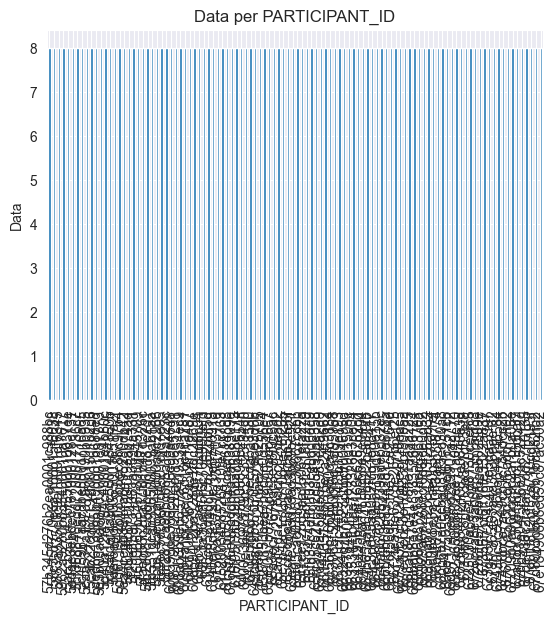

None
total time passed PARTICIPANT_ID (ms):
PARTICIPANT_ID
566bdeb3beaf21001240085a    11436794
57507e67fcaa630007cb9ad2      124106
57b345d276b2ea0001c988bc      476638
57c357770e6a1f00015f6038     1162911
5883a935c0c9a10001df6345      825654
                              ...   
67be486c2fafa97dd2710135      408449
67d01f812bf82a710cd2193f     1480021
67d80b3db0cac8b1bd982fb2      404790
67e184908b8cd53c87ac90a2     1439517
6870acd4d7a2c843c144bfd7     7504700
Length: 136, dtype: int64


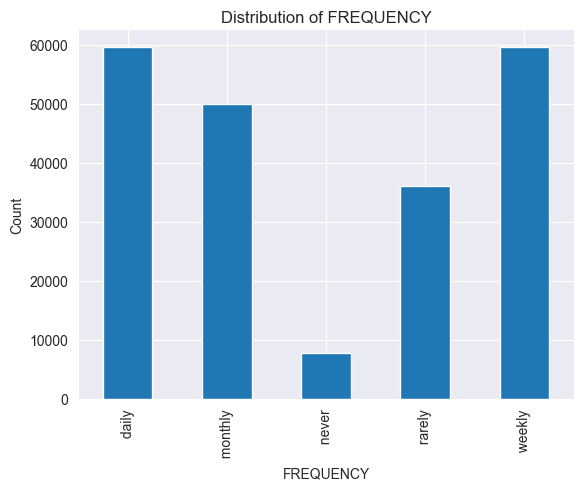

None
Length of PROMPT Columns per file:
SOURCE_FILE
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827082827.csv     59427
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091333.csv    143934
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091443.csv     36414
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091551.csv     30056
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091705.csv     53289
                                                                                 ...  
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074523.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074524.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074750.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074751.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074752.csv  

In [11]:
print(unique_participant_ids(data_id_full))
print(print_pids(all_full_submission))
print(submissions_per_pid(data_id_full))

usage_times = data_id_cleaned.groupby('PARTICIPANT_ID').apply(usage_time, include_groups=False)
print("total time passed PARTICIPANT_ID (ms):")
print(usage_times)

print(show_frequency(data_id_cleaned))

prompt_lengths = data_id_cleaned.groupby('SOURCE_FILE').apply(prompt_length_per_file, include_groups=False)
print("Length of PROMPT Columns per file:")
print(prompt_lengths)

print(count_rows(all_full_submission))

print(calculate_time_per_file(all_full_submission))

In [12]:
from pathlib import Path
import pandas as pd

def _is_ascii_printable(ch: str) -> bool:
    o = ord(ch)
    return 0x20 <= o <= 0x7E  # space .. ~

def _is_cjk_like(ch: str) -> bool:
    o = ord(ch)
    # Unified ideographs + extensions
    return (
        (0x4E00 <= o <= 0x9FFF) or        # CJK Unified Ideographs
        (0x3400 <= o <= 0x4DBF) or        # CJK Extension A
        (0x20000 <= o <= 0x2A6DF) or      # CJK Extension B
        (0x2A700 <= o <= 0x2B73F) or      # CJK Extension C
        (0x2B740 <= o <= 0x2B81F) or      # CJK Extension D
        (0x2B820 <= o <= 0x2CEAF) or      # CJK Extension E
        (0x2CEB0 <= o <= 0x2EBEF) or      # CJK Extension F/G
        (0xF900 <= o <= 0xFAFF) or        # CJK Compatibility Ideographs
        (0x3040 <= o <= 0x309F) or        # Hiragana
        (0x30A0 <= o <= 0x30FF) or        # Katakana
        (0xFF65 <= o <= 0xFF9F) or        # Halfwidth Katakana
        (0xAC00 <= o <= 0xD7AF) or        # Hangul Syllables
        (0x1100 <= o <= 0x11FF)           # Hangul Jamo
    )

def _tally_token(token: str, process_markers=("process", "dead", "ime")):
    """
    Count characters within a single token/keystroke label.
    Returns (ascii_printable, cjk_like, other, process_flag)
    """
    if token is None:
        return 0, 0, 0, 0

    t = str(token).strip()
    # If the logger writes special events as words like 'Process', 'Dead', etc.
    if t.lower() in process_markers:
        return 0, 0, 0, 1

    ascii_cnt = sum(_is_ascii_printable(ch) for ch in t)
    cjk_cnt   = sum(_is_cjk_like(ch)       for ch in t)
    other_cnt = max(len(t) - ascii_cnt - cjk_cnt, 0)
    return ascii_cnt, cjk_cnt, other_cnt, 0

def detect_majority_regular_keys(
    folder,
    key_col="KEY",                 # change to your keystroke column name if different
    participant_id_col="PARTICIPANT_ID",
    file_pattern="*.csv",
    process_markers=("process", "dead", "ime"),
    per_file_mode=True,            # if True, only the mode key label per file counts once (less bias)
):
    """
    Scans all CSVs in `folder` and estimates, per participant and overall, whether
    keystrokes_before are mostly regular ASCII vs. CJK/IME composition ('Process/Dead/IME').

    Returns:
      {
        "overall": { "ascii_ratio": float, "cjk_ratio": float, "process_ratio": float, "classification": str },
        "participants": {
            "<participant_id>": {
                "ascii_ratio": float,
                "cjk_ratio": float,
                "process_ratio": float,
                "n_tokens": int,
                "classification": "regular" | "cjk_like" | "ime_process_heavy"
            },
            ...
        }
      }
    """
    folder = Path(folder)
    files = sorted(p for p in folder.glob(file_pattern) if p.is_file())
    if not files:
        raise FileNotFoundError(f"No files matching {file_pattern} in {folder}")

    # Per-participant tallies
    per_pid = {}

    # Helper to update tallies
    def _accumulate(pid, token):
        a, c, o, p = _tally_token(token, process_markers)
        rec = per_pid.setdefault(pid, {"ascii":0, "cjk":0, "other":0, "process":0, "n":0})
        rec["ascii"] += a
        rec["cjk"]   += c
        rec["other"] += o
        rec["process"] += p
        rec["n"]     += max(len(str(token)) if token is not None else 0, p)  # count chars or 1 for process

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"Error reading {f.name}: {e}")
            continue

        if participant_id_col not in df.columns:
            print(f"Skipping {f.name}: missing '{participant_id_col}'")
            continue
        if key_col not in df.columns:
            print(f"Skipping {f.name}: missing '{key_col}'")
            continue

        # determine the file's participant id (expect single id; fallback to mode)
        pids = df[participant_id_col].dropna().astype(str).str.strip()
        pid = pids.mode().iloc[0] if not pids.empty else "__unknown__"

        keys = df[key_col].dropna().astype(str)

        if per_file_mode:
            # Use the most frequent key label in the file to avoid bias from very long texts
            token = keys.mode().iloc[0] if not keys.empty else None
            _accumulate(pid, token)
        else:
            for token in keys:
                _accumulate(pid, token)

    # Compute ratios and classifications
    def _ratios(rec):
        total_chars = rec["ascii"] + rec["cjk"] + rec["other"]
        total_events = total_chars + rec["process"]  # treat process as its own bucket
        if total_events == 0:
            return 0.0, 0.0, 0.0
        ascii_ratio   = rec["ascii"]   / total_events
        cjk_ratio     = rec["cjk"]     / total_events
        process_ratio = rec["process"] / total_events
        return ascii_ratio, cjk_ratio, process_ratio

    def _classify(ascii_ratio, cjk_ratio, process_ratio):
        # Simple, interpretable heuristics; tweak thresholds to your dataset.
        if process_ratio >= 0.30:
            return "ime_process_heavy"
        if cjk_ratio >= 0.30 and ascii_ratio < 0.60:
            return "cjk_like"
        return "regular"

    participants = {}
    overall_rec = {"ascii":0, "cjk":0, "other":0, "process":0, "n":0}

    for pid, rec in per_pid.items():
        a, c, p = _ratios(rec)
        participants[pid] = {
            "ascii_ratio": round(a, 3),
            "cjk_ratio": round(c, 3),
            "process_ratio": round(p, 3),
            "n_tokens": rec["n"],
            "classification": _classify(a, c, p)
        }
        for k in ("ascii","cjk","other","process","n"):
            overall_rec[k] += rec[k]

    oa, oc, op = _ratios(overall_rec)
    result = {
        "overall": {
            "ascii_ratio": round(oa, 3),
            "cjk_ratio": round(oc, 3),
            "process_ratio": round(op, 3),
            "classification": _classify(oa, oc, op)
        },
        "participants": participants
    }
    return result


In [13]:
stats = detect_majority_regular_keys("data/keystrokes", key_col="LETTER")  # change key_col if needed
print("Overall:", stats["overall"])

# Inspect a participant:
for pid, info in list(stats["participants"].items())[:5]:
    print(pid, info)


Overall: {'ascii_ratio': 0.999, 'cjk_ratio': 0.0, 'process_ratio': 0.001, 'classification': 'regular'}
566bdeb3beaf21001240085a {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 33, 'classification': 'regular'}
57507e67fcaa630007cb9ad2 {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 5, 'classification': 'regular'}
57b345d276b2ea0001c988bc {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 23, 'classification': 'regular'}
57c357770e6a1f00015f6038 {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 16, 'classification': 'regular'}
5883a935c0c9a10001df6345 {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 24, 'classification': 'regular'}


In [14]:
from pathlib import Path
import pandas as pd

def find_irregular_files_and_ids(
    folder,
    key_col="KEY",                 # change to your column name
    participant_id_col="PARTICIPANT_ID",
    file_pattern="*.csv",
    process_markers=("process", "dead", "ime", "composition"),
):
    """
    Scans all CSV files in `folder` and flags files that contain irregular key events:
      - Non-ASCII characters (not printable 0x20..0x7E)
      - CJK/Hangul/Hiragana/Katakana characters
      - Special tokens like 'Process', 'Dead', 'IME', 'Composition'

    Returns:
      {
        "irregular_files": { Path(...) : {"participant_ids": set([...]), "irregular_tokens": set([...])}, ... },
        "regular_files":   set([Path(...), ...]),
        "irregular_ids":   set([...])   # all participant IDs that ever had irregular input
      }
    """

    def _is_ascii_printable(ch: str) -> bool:
        return 0x20 <= ord(ch) <= 0x7E

    def _is_cjk_like(ch: str) -> bool:
        o = ord(ch)
        return (
            (0x4E00 <= o <= 0x9FFF) or (0x3400 <= o <= 0x4DBF) or
            (0x20000 <= o <= 0x2EBEF) or (0xF900 <= o <= 0xFAFF) or
            (0x3040 <= o <= 0x30FF) or (0xFF65 <= o <= 0xFF9F) or
            (0xAC00 <= o <= 0xD7AF) or (0x1100 <= o <= 0x11FF)
        )

    folder = Path(folder)
    files = sorted(p for p in folder.glob(file_pattern) if p.is_file())
    if not files:
        raise FileNotFoundError(f"No files matching {file_pattern} in {folder}")

    irregular_files = {}
    irregular_ids = set()
    regular_files = set()

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"Error reading {f}: {e}")
            continue

        if key_col not in df.columns:
            print(f"Skipping {f.name}: missing '{key_col}'")
            continue

        pids = set()
        if participant_id_col in df.columns:
            pids = set(df[participant_id_col].dropna().astype(str).str.strip())

        irregular_tokens = set()
        for token in df[key_col].dropna().astype(str):
            t = token.strip()
            if not t:
                continue
            if t.lower() in process_markers:
                irregular_tokens.add(t)
                continue
            for ch in t:
                if not _is_ascii_printable(ch):
                    irregular_tokens.add(ch)

        if irregular_tokens:
            irregular_files[f] = {
                "participant_ids": pids,
                "irregular_tokens": irregular_tokens,
            }
            irregular_ids.update(pids)
        else:
            regular_files.add(f)

    # Summary
    print(f"Checked {len(files)} files in {folder}")
    print(f"Regular files: {len(regular_files)}")
    print(f"Irregular files: {len(irregular_files)}")
    print(f"Irregular participant IDs: {len(irregular_ids)}")

    if irregular_files:
        print("\nExamples of irregular files:")
        for f, info in list(irregular_files.items())[:10]:
            print(f" - {f.name} (pids={list(info['participant_ids'])}): "
                  f"{list(info['irregular_tokens'])[:5]}...")

    return {
        "irregular_files": irregular_files,
        "regular_files": regular_files,
        "irregular_ids": irregular_ids,
    }


In [15]:
results = find_irregular_files_and_ids("data/full_submissions", key_col="LETTER")

# Get all irregular participant IDs
print("Irregular IDs:", results["irregular_ids"])

# Inspect irregular files
for f, info in results["irregular_files"].items():
    print(f.name, info["participant_ids"], info["irregular_tokens"])


Checked 848 files in data\full_submissions
Regular files: 815
Irregular files: 33
Irregular participant IDs: 19

Examples of irregular files:
 - experiment_5ed02ffb8090240f93ab74ad_20250904153142.csv (pids=['5ed02ffb8090240f93ab74ad']): ['¡']...
 - experiment_5ed02ffb8090240f93ab74ad_20250904154426.csv (pids=['5ed02ffb8090240f93ab74ad']): ['¡']...
 - experiment_606598de386cd206c99a4648_20250827100151.csv (pids=['606598de386cd206c99a4648']): ['τ', 'ρ', 'ι', 'ς']...
 - experiment_6081728972120aa7f9685791_20250819163340.csv (pids=['6081728972120aa7f9685791']): ['№']...
 - experiment_6081728972120aa7f9685791_20250819164901.csv (pids=['6081728972120aa7f9685791']): ['ф', 'у', 'Ц', 'ш', 'ы']...
 - experiment_60f23a36acf5f6c70e990efd_20250826202528.csv (pids=['60f23a36acf5f6c70e990efd']): ['ç']...
 - experiment_616b06e97addc4a9a638909e_20250904212714.csv (pids=['616b06e97addc4a9a638909e']): ['¿']...
 - experiment_616b06e97addc4a9a638909e_20250904213058.csv (pids=['616b06e97addc4a9a638909e']): 

In [16]:
from pathlib import Path
import pandas as pd

def list_files_with_nan(
    folder,
    pattern="*.csv",
    columns=None,            # e.g. ["KEY", "PARTICIPANT_ID"]; None = check all columns
    keep_default_na=True,    # True = pandas treats "", "NA", "NaN", etc. as NaN
    show_counts=False        # True = also print per-file counts
):
    """
    Print and return only the files that contain NaN values.

    Returns: list[Path] with files that have any NaN.
    """
    folder = Path(folder)
    hits = []

    for f in sorted(p for p in folder.glob(pattern) if p.is_file()):
        try:
            df = pd.read_csv(f, low_memory=False, keep_default_na=keep_default_na)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"Skip {f.name}: {e}")
            continue

        scope = df if columns is None else df[columns]
        has_nan = scope.isna().any().any()
        if has_nan:
            hits.append(f)
            if show_counts:
                by_col = scope.isna().sum()
                n_rows = scope.isna().any(axis=1).sum()
                print(f"{f}  -> rows_with_NaN={n_rows}, by_column={{k:v for k,v in by_col.items() if v}}")
            else:
                print(f)

    print(f"\n{len(hits)} file(s) with NaN.")
    return hits


In [17]:
# Check all columns in all CSVs and print only files that contain NaN
list_files_with_nan("data/full_submissions", show_counts=True)


0 file(s) with NaN.


[]

### no files containing Nan values, no false Ids, no incomplete submissions

## find method to link keystrokes charAtpos with marked text (confident, unconfident) -> output linked_charAt

In [18]:
import os
import re
import difflib
from pathlib import Path
from typing import List, Dict, Optional, Tuple
import pandas as pd

# --- helpers ---------------------------------------------------------------

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _normalize_key_token(tok: str) -> str:
    """
    Normalize raw key labels. Preserve literal space; map space-like labels to ' '; DO NOT confuse Backspace.
    """
    raw = str(tok)               # do NOT strip yet
    low_raw = raw.lower()

    # 1) Literal space character
    if raw == " ":
        return " "

    # 2) Space-like labels (guard against 'backspace')
    low_trim = low_raw.strip()
    if (("space" in low_trim and "backspace" not in low_trim)
        or low_trim in {"space", "spacebar", "key.space", "vk_space", "vk space", "key space"}):
        return " "

    # 3) Other aliases
    aliases = {
        "backspace": "Backspace",
        "delete": "Delete",
        "del": "Delete",
        "ctrl+a": "Ctrl+A",
        "ctrl + a": "Ctrl+A",
        "control+a": "Ctrl+A",
        "caps": "Cap",
        "shift": "Cap",
    }
    return aliases.get(low_trim, raw.strip())

def _is_printable_char(tok: str) -> bool:
    return isinstance(tok, str) and len(tok) == 1

def _pick_mode_nonempty(df: pd.DataFrame, colname: str) -> Optional[str]:
    if colname not in df.columns:
        return None
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _find_key_column(df: pd.DataFrame) -> Optional[str]:
    if "LETTER" in df.columns:
        return "LETTER"
    if "KEY" in df.columns:
        return "KEY"
    lowers = {c.lower(): c for c in df.columns}
    return lowers.get("letter") or lowers.get("key")

# --- produced -> prompt alignment -----------------------------------------

def _map_produced_to_prompt_indices(produced: str, prompt: str) -> Dict[int, int]:
    m = difflib.SequenceMatcher(a=produced, b=prompt, autojunk=False)
    mapping: Dict[int, int] = {}
    for tag, a0, a1, b0, b1 in m.get_opcodes():
        if tag == "equal":
            for off in range(a1 - a0):
                mapping[a0 + off] = b0 + off
        elif tag == "replace":
            alen, blen = (a1 - a0), (b1 - b0)
            if alen == 0:
                continue
            for off in range(alen):
                bi = b0 if blen == 0 else b0 + round(off * (blen / max(alen, 1)))
                bi = min(max(b0, bi), max(b0, b1 - 1)) if blen > 0 else b0
                mapping[a0 + off] = bi
        elif tag == "delete":
            fallback = max(0, b0 - 1) if len(prompt) else -1
            for off in range(a1 - a0):
                mapping[a0 + off] = fallback
        # 'insert' has no produced chars to map
    # fill gaps (keep None higher up instead of forcing to 0)
    last = None
    for i in range(len(produced)):
        if i not in mapping:
            mapping[i] = last
        else:
            last = mapping[i]
    return mapping

def _remap_keys_to_prompt_indices(
    key_to_prod_idx: Dict[int, Optional[int]],
    produced: str,
    prompt: str,
) -> Dict[int, Optional[int]]:
    """
    Map keystroke -> produced_index to keystroke -> prompt_index.
    Missing produced indices remain None; do NOT coerce to 0 here.
    """
    if not prompt:
        return {k: None for k in key_to_prod_idx}
    prod2prompt = _map_produced_to_prompt_indices(produced, prompt)
    L = len(prompt)
    out: Dict[int, Optional[int]] = {}
    for k, p in key_to_prod_idx.items():
        if p is None:
            out[k] = None
        else:
            q = prod2prompt.get(p, None)
            if q is None:
                out[k] = None
            else:
                # clamp safety (SequenceMatcher shouldn't produce <0 or >=L here)
                if q < 0: q = 0
                if q >= L: q = L - 1
                out[k] = q
    return out

# --- typing simulation -----------------------------------------------------

def _simulate_keys_to_produced_index(keys: List[str]) -> Tuple[Dict[int, Optional[int]], str, List[str]]:
    """
    Editor-accurate simulation with a movable cursor and select-all semantics.

    Returns:
      key_to_prod_idx: dict[row_index] -> produced_char_index (position in final produced string),
                        or None for keys that don't directly produce a char (before second-pass remap)
      produced: final produced string
      norm_tokens: normalized token list

    Behavior:
      - Printable chars insert at the current cursor position (honors Shift/Cap uppercasing for letters).
      - Backspace/Delete remove relative to cursor (Backspace: before cur; Delete: at cur).
      - ArrowLeft/Right move the cursor within [0, len(buf)].
      - Home/End jump cursor to 0 / len(buf).
      - Ctrl+A selects all. Next printable replaces the selection. Backspace/Delete clear selection.
      - Non-text-effect keys (Shift/Cap, arrows, Process, Home/End, etc.) will be remapped later
        to the next surviving character's produced index.
      - Printable characters that were later deleted are also remapped to the next survivor.
    """
    # Text buffer and per-position provenance (which key created each char)
    buf: List[str] = []
    producers: List[int] = []

    # Mapping from key index -> produced index (provisional)
    key_to_idx: Dict[int, Optional[int]] = {}

    # Cursor & selection
    cur = 0
    sel_active = False
    sel_start = 0
    sel_end = 0

    # Shift/caps handling for the NEXT character only
    cap_next = False
    cap_key_index: Optional[int] = None

    norm_tokens = [_normalize_key_token(x) for x in keys]

    def _clear_selection_record_deletes():
        """Delete the selected range, recording deleted producers; return insertion point."""
        nonlocal buf, producers, sel_active, sel_start, sel_end, cur
        if not sel_active or sel_start == sel_end:
            return cur
        # delete range [sel_start:sel_end)
        del buf[sel_start:sel_end]
        del producers[sel_start:sel_end]
        cur = sel_start
        sel_active = False
        return cur

    def _insert_char(ch: str, key_idx: int):
        """Insert character at cursor (replacing selection if active)."""
        nonlocal buf, producers, cur, cap_next, cap_key_index
        # replace selection if present
        _clear_selection_record_deletes()

        ch_out = ch.upper() if cap_next and ch.isalpha() else ch
        buf[cur:cur] = [ch_out]
        producers[cur:cur] = [key_idx]
        # produced index is the position where it finally lives (for now)
        key_to_idx[key_idx] = cur

        # Map preceding Shift/Cap to the same produced index
        if cap_next and cap_key_index is not None:
            key_to_idx[cap_key_index] = cur

        # advance cursor, clear cap
        cur += 1
        cap_next = False
        cap_key_index = None

    def _backspace(key_idx: int):
        """Backspace: delete char BEFORE cursor; or delete selection if active."""
        nonlocal buf, producers, cur
        if sel_active:
            _clear_selection_record_deletes()
            key_to_idx[key_idx] = cur  # provisional; remap to next survivor later
            return
        if cur > 0:
            del buf[cur-1]
            del producers[cur-1]
            cur -= 1
            key_to_idx[key_idx] = cur  # provisional

    def _delete(key_idx: int):
        """Delete: delete char AT cursor; or delete selection if active."""
        nonlocal buf, producers, cur
        if sel_active:
            _clear_selection_record_deletes()
            key_to_idx[key_idx] = cur
            return
        if cur < len(buf):
            del buf[cur]
            del producers[cur]
            key_to_idx[key_idx] = cur  # provisional

    # --- First pass: simulate editor with cursor ---
    for i, tok in enumerate(norm_tokens):
        if tok in ("Cap", "Shift"):
            cap_next = True
            cap_key_index = i
            key_to_idx[i] = None
            continue

        if tok in ("Ctrl+A", "Ctrl+a"):
            # select all
            sel_active = True
            sel_start, sel_end = 0, len(buf)
            key_to_idx[i] = None
            continue

        # Cursor movement
        if tok == "ArrowLeft":
            # cancel selection and move left by one
            sel_active = False
            cur = max(0, cur - 1)
            key_to_idx[i] = None
            continue
        if tok == "ArrowRight":
            sel_active = False
            cur = min(len(buf), cur + 1)
            key_to_idx[i] = None
            continue
        if tok == "Home":
            sel_active = False
            cur = 0
            key_to_idx[i] = None
            continue
        if tok == "End":
            sel_active = False
            cur = len(buf)
            key_to_idx[i] = None
            continue

        # Deletions
        if tok == "Backspace":
            _backspace(i)
            continue
        if tok == "Delete":
            _delete(i)
            continue

        # Non-text-effect (do nothing now; remap later)
        if tok in {"ArrowUp", "ArrowDown", "Process", "PageUp", "PageDown",
                   "Insert", "Meta", "Alt", "Ctrl", "Tab"}:
            key_to_idx[i] = None
            continue

        # Printable?
        if _is_printable_char(tok):
            _insert_char(tok, i)
        else:
            # Unknown token -> treat as no-text-effect
            key_to_idx[i] = None

    produced = "".join(buf)

    # Survivors: producer key -> its FINAL produced position
    final_pos_by_key: Dict[int, int] = {kid: idx for idx, kid in enumerate(producers)}

    # Build "next surviving produced index" for each key index (scan right-to-left)
    next_surviving_prod_idx: List[Optional[int]] = [None] * len(norm_tokens)
    next_seen: Optional[int] = None
    for i in range(len(norm_tokens) - 1, -1, -1):
        if i in final_pos_by_key:
            next_seen = final_pos_by_key[i]
        next_surviving_prod_idx[i] = next_seen

    # --- Second pass: remap non-survivors & no-text keys to the NEXT survivor ---
    for i, tok in enumerate(norm_tokens):
        if tok in ("Backspace", "Delete", "Cap", "Shift",
                   "ArrowLeft", "ArrowRight", "Home", "End",
                   "ArrowUp", "ArrowDown", "Process", "PageUp", "PageDown",
                   "Insert", "Meta", "Alt", "Ctrl", "Tab"):
            key_to_idx[i] = next_surviving_prod_idx[i]
            continue

        if _is_printable_char(tok):
            # if this printable didn't survive, follow the next survivor
            if i not in final_pos_by_key:
                key_to_idx[i] = next_surviving_prod_idx[i]
            else:
                key_to_idx[i] = final_pos_by_key[i]
        # else: unknown non-printable stays None

    return key_to_idx, produced, norm_tokens



# --- main ------------------------------------------------------------------

def create_prompt_char(path: str | os.PathLike):
    """
    Creates data/linked_charAt/ with same CSVs extended by PROMPT_CHAR.
    - Every Shift maps to the same index as the next surviving printable.
    - Backspace/Delete map to the NEXT valid position (next surviving printable).
    - Printables typed then erased inherit the next surviving printable’s index.
    - If no later printable exists (trailing edits), keys map to the LAST prompt index.
    - Spaces are printable and advance naturally.
    - Unmappable keys -> -1.
    """
    path = Path(path)
    out_dir = Path("data") / "linked_charAt"
    os.makedirs(out_dir, exist_ok=True)

    csvs = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not csvs:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in csvs:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        key_col = _find_key_column(df)
        if not key_col:
            print(f"[skip] {f.name}: missing 'LETTER' or 'KEY' column")
            continue

        prompt = _pick_mode_nonempty(df, "PROMPT") or ""
        prompt = _norm_text(prompt)
        L = len(prompt)

        keys = df[key_col].astype(str).tolist()
        key_to_prod_idx, produced, norm_tokens = _simulate_keys_to_produced_index(keys)

        # Align produced -> prompt
        key_to_prompt_idx = _remap_keys_to_prompt_indices(key_to_prod_idx, produced, prompt)

        # Final safety: if there's NO later printable, push these to LAST prompt index
        if L > 0:
            for i, tok in enumerate(norm_tokens):
                if key_to_prompt_idx.get(i) is None and (
                    tok in ("Backspace", "Delete", "Cap", "Shift") or _is_printable_char(tok)
                ):
                    key_to_prompt_idx[i] = L - 1

        # Emit PROMPT_CHAR
        n = len(df)
        max_key = max(key_to_prompt_idx.keys()) if key_to_prompt_idx else -1
        out = []
        for i in range(n):
            if i <= max_key:
                v = key_to_prompt_idx.get(i, None)
                out.append(int(v) if v is not None else -1)
            else:
                out.append(-1)

        df["PROMPT_CHAR"] = pd.Series(out, dtype="int64")

        out_path = out_dir / f.name
        df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path}")

    print(f"\nDone. Files with PROMPT_CHAR written to: {out_dir.resolve()}")


In [19]:
create_prompt_char("data/full_submissions")

[ok] experiment_57b345d276b2ea0001c988bc_20250904190321.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190321.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190454.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190454.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190536.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190536.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190637.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190637.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190707.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190707.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190838.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190838.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190858.csv -> data\linked_charAt\experiment_57b345d276b2ea0001c988bc_20250904190858.csv
[ok] experiment_57b345d276b2ea0001c988bc_

### indexes to corresponding prompt characters created
-> check for ctrl+a+Backspace behaviour

In [20]:
from pathlib import Path
import pandas as pd

def _find_key_col(df):
    if "LETTER" in df.columns: return "LETTER"
    if "KEY" in df.columns:    return "KEY"
    # case-insensitive fallback
    lowers = {c.lower(): c for c in df.columns}
    return lowers.get("letter") or lowers.get("key")

def _norm(tok: str) -> str:
    s = str(tok).strip()
    low = s.lower()
    # normalize common variants
    if low in {"ctrl", "control", "lctrl", "rctrl", "leftctrl", "rightctrl", "ctrl_l", "ctrl_r"}:
        return "ctrl"
    if low in {"backspace", "bksp", "bspace"}:
        return "backspace"
    # normalize chord forms like "ctrl + a", "Ctrl+A"
    low = low.replace(" ", "")
    if low in {"ctrl+a", "control+a"}:
        return "ctrl+a"
    return s.lower()  # letters like 'a', 'b', ' ' (space) etc.

def find_ctrl_a_backspace_sequences(folder, pattern="*.csv", max_print_hits=10):
    """
    Look for suspicious consecutive patterns that can break indexing:
      1) 'ctrl', 'a', 'backspace'  (three consecutive rows)
      2) 'ctrl+a', 'backspace'     (two consecutive rows when chord is logged as one token)

    Prints the file names and row indices where the pattern occurs.
    Returns: dict[Path, {"triple": [(i,i+1,i+2), ...], "chord": [(i,i+1), ...]}]
    """
    folder = Path(folder)
    results = {}
    files = sorted(p for p in folder.glob(pattern) if p.is_file())

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        col = _find_key_col(df)
        if not col:
            # no keystroke column
            continue

        toks = [_norm(x) for x in df[col].astype(str).tolist()]

        triple_hits = []
        chord_hits  = []

        # three-row pattern: ctrl, a, backspace
        for i in range(len(toks) - 2):
            if toks[i] == "ctrl" and toks[i+1] == "a" and toks[i+2] == "backspace":
                triple_hits.append((i, i+1, i+2))

        # two-row pattern: ctrl+a, backspace
        for i in range(len(toks) - 1):
            if toks[i] == "ctrl+a" and toks[i+1] == "backspace":
                chord_hits.append((i, i+1))

        if triple_hits or chord_hits:
            results[f] = {"triple": triple_hits, "chord": chord_hits}

    # ---- report
    if not results:
        print("No files contain consecutive 'ctrl, a, backspace' (or 'Ctrl+A', 'Backspace') patterns.")
        return {}

    print("Found files with potential Ctrl+A→Backspace sequences:")
    for f, hits in results.items():
        print(f" - {f.name}")
        # show a few example indices
        if hits["triple"]:
            show = hits["triple"][:max_print_hits]
            print(f"    triple (ctrl, a, backspace): {show}" + (" ..." if len(hits['triple']) > len(show) else ""))
        if hits["chord"]:
            show = hits["chord"][:max_print_hits]
            print(f"    chord  (Ctrl+A, backspace): {show}" + (" ..." if len(hits['chord']) > len(show) else ""))

    return results


In [21]:
# Scan the folder you processed (e.g., data/linked_charAt or your raw folder)
find_ctrl_a_backspace_sequences("data/full_submissions")

# If your CSVs use KEY instead of LETTER, it’s handled automatically.
# You can also scan the already-extended files:
find_ctrl_a_backspace_sequences("data/linked_charAt")


No files contain consecutive 'ctrl, a, backspace' (or 'Ctrl+A', 'Backspace') patterns.
No files contain consecutive 'ctrl, a, backspace' (or 'Ctrl+A', 'Backspace') patterns.


{}

## Now generate files that link CONFIDENT and UNCONFIDENT to PROMPT_CHAR indexes ->output concrete_chars

In [22]:
from pathlib import Path
import re
import pandas as pd
import os
from typing import List, Tuple, Optional, Set

# -------- helpers --------

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _pick_mode_nonempty(df: pd.DataFrame, colname: str) -> Optional[str]:
    if colname not in df.columns:
        return None
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _parse_spans(val) -> List[Tuple[int, int]]:
    """
    Accepts formats like: [4,84], (4,84), 4,84, 4-84, 4;84, and multiples separated by ';' or '|'
    Returns inclusive pairs [(start, end), ...].
    Single numbers become (n, n).
    """
    if val is None:
        return []
    s = str(val).strip()
    if not s or s.lower() == "nan":
        return []
    spans = []
    # split multiple spans
    for part in re.split(r"[;|]", s):
        nums = [int(x) for x in re.findall(r"-?\d+", part)]
        if len(nums) >= 2:
            a, b = nums[0], nums[1]
            if a > b:
                a, b = b, a
            spans.append((a, b))
        elif len(nums) == 1:
            n = nums[0]
            spans.append((n, n))
    return spans

def _clamp_spans(spans: List[Tuple[int, int]], max_index: int) -> List[Tuple[int, int]]:
    """
    Clamp inclusive spans to [0, max_index]. Drop spans entirely outside.
    (Handles your 'end might be +1 at very end' case by clamping to max_index.)
    """
    if max_index < 0:
        return []
    out = []
    for a, b in spans:
        a2 = max(0, a)
        b2 = min(max_index, b)
        if a2 <= b2:
            out.append((a2, b2))
    return out

def _span_to_index_set(spans: List[Tuple[int, int]]) -> Set[int]:
    idx: Set[int] = set()
    for a, b in spans:
        idx.update(range(a, b + 1))
    return idx

# -------- main --------

def create_concrete_chars(path: str | os.PathLike):
    """
    Reads all CSVs in `path` and writes them to data/concrete_chars/ with:
      - CONFIDENT_MARKED_CHAR (0/1): 1 if PROMPT_CHAR in any CONFIDENT span
      - UNCONFIDENT_MARKED_CHAR (0/1): 1 if PROMPT_CHAR in any UNCONFIDENT span

    Notes:
    - PROMPT_CHAR is expected to be 0-based index per row; rows with PROMPT_CHAR == -1 get 0.
    - CONFIDENT/UNCONFIDENT may contain multiple span ranges like "[4,84];[95,105]".
    - Span ends are clamped to len(PROMPT)-1 to tolerate a +1 overrun at the very end.
    """
    path = Path(path)
    out_dir = Path("data") / "concrete_chars"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # PROMPT length (for clamping)
        prompt_val = _pick_mode_nonempty(df, "PROMPT") or ""
        prompt = _norm_text(prompt_val)
        max_idx = len(prompt) - 1  # can be -1 if empty

        # PROMPT_CHAR column must exist
        if "PROMPT_CHAR" not in df.columns:
            print(f"[skip] {f.name}: missing PROMPT_CHAR column")
            continue
        # Coerce PROMPT_CHAR to numeric (keep -1 for invalids)
        pc = pd.to_numeric(df["PROMPT_CHAR"], errors="coerce").fillna(-1).astype("int64")

        # Parse and clamp CONFIDENT spans
        conf_raw = _pick_mode_nonempty(df, "CONFIDENT")
        conf_spans = _parse_spans(conf_raw)
        conf_spans = _clamp_spans(conf_spans, max_idx)
        conf_idx = _span_to_index_set(conf_spans)

        # Parse and clamp UNCONFIDENT spans
        unconf_raw = _pick_mode_nonempty(df, "UNCONFIDENT")
        unconf_spans = _parse_spans(unconf_raw)
        unconf_spans = _clamp_spans(unconf_spans, max_idx)
        unconf_idx = _span_to_index_set(unconf_spans)

        # Build 0/1 columns
        if conf_idx:
            df["CONFIDENT_MARKED_CHAR"] = pc.apply(lambda x: 1 if (x >= 0 and x in conf_idx) else 0).astype("int64")
        else:
            df["CONFIDENT_MARKED_CHAR"] = pd.Series([0]*len(df), dtype="int64")

        if unconf_idx:
            df["UNCONFIDENT_MARKED_CHAR"] = pc.apply(lambda x: 1 if (x >= 0 and x in unconf_idx) else 0).astype("int64")
        else:
            df["UNCONFIDENT_MARKED_CHAR"] = pd.Series([0]*len(df), dtype="int64")

        # Write out
        out_path = out_dir / f.name
        df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path}")

    print(f"\nDone. Extended files are in: {out_dir.resolve()}")


In [23]:
create_concrete_chars("data/linked_charAt")

[ok] experiment_57b345d276b2ea0001c988bc_20250904190321.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190321.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190454.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190454.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190536.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190536.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190637.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190637.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190707.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190707.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190838.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190838.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190858.csv -> data\concrete_chars\experiment_57b345d276b2ea0001c988bc_20250904190858.csv
[ok] experiment_57b345d276b2ea0001

## Now generate words to later link to words that have been marked or WPM, Error rate etc. -> outputs words

In [24]:
from pathlib import Path
import pandas as pd
import os

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _pick_mode_nonempty(df: pd.DataFrame, colname: str):
    if colname not in df.columns:
        return ""
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def create_words(path: str | os.PathLike):
    """
    Read all CSVs in `path` and write them to ./data/words/ with a new column:
      - WORD (0/1): 1 if the row's PROMPT_CHAR points to a non-space character in PROMPT; else 0.

    Notes:
    - Punctuation and digits are counted as words (1).
    - True spaces are 0.
    - Rows with PROMPT_CHAR == -1 (unmapped) are 0.
    """
    path = Path(path)
    out_dir = Path("data") / "words"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # Need PROMPT_CHAR
        if "PROMPT_CHAR" not in df.columns:
            print(f"[skip] {f.name}: missing PROMPT_CHAR column")
            continue

        # Get PROMPT (mode non-empty), normalize
        prompt = _norm_text(_pick_mode_nonempty(df, "PROMPT"))
        L = len(prompt)

        # Precompute mask over prompt: 1 for non-space, 0 for space
        if L > 0:
            char_is_word = [0 if prompt[i] == " " else 1 for i in range(L)]
        else:
            char_is_word = []

        # Build WORD column
        pc = pd.to_numeric(df["PROMPT_CHAR"], errors="coerce").fillna(-1).astype("int64")

        def _row_word(ix: int) -> int:
            if ix < 0 or ix >= L:
                return 0
            return char_is_word[ix]

        df["WORD"] = pc.apply(_row_word).astype("int64")

        # Save
        out_path = out_dir / f.name
        df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path}")

    print(f"\nDone. Files with WORD written to: {out_dir.resolve()}")


In [25]:
create_words("data/concrete_chars")

[ok] experiment_57b345d276b2ea0001c988bc_20250904190321.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190321.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190454.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190454.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190536.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190536.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190637.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190637.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190707.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190707.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190838.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190838.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190858.csv -> data\words\experiment_57b345d276b2ea0001c988bc_20250904190858.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904191019.csv -> data\words\experiment_57b345d276b2

### WPM values -> outputs WPM

In [26]:
from pathlib import Path
import pandas as pd
import numpy as np
import os

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return None
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _coerce_time_series(s: pd.Series) -> pd.Series:
    """
    Convert to datetime64[ns] with strong sanitation:
      - Treat 0, negative numbers as invalid (NaT).
      - Detect seconds vs milliseconds using NON-ZERO numeric values.
      - Fall back to ISO parsing for non-numeric cells.
    """
    # Try numeric first
    s_num = pd.to_numeric(s, errors="coerce")

    # Zero/negative -> NaN (bad samples, e.g., release==0)
    s_num_valid = s_num.mask(s_num <= 0, np.nan)

    if s_num_valid.notna().any():
        med = s_num_valid.dropna().median()
        # Decide unit from magnitude of non-zero values
        if med >= 1e12:           # likely milliseconds since epoch
            dt = pd.to_datetime(s_num_valid, unit="ms", origin="unix", errors="coerce")
        elif med >= 1e9:          # likely seconds since epoch
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        else:
            # Treat as seconds offset from epoch (common for relative timers too)
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        # Any leftovers -> try ISO parse
        if dt.isna().any():
            dt2 = pd.to_datetime(s.astype(str), errors="coerce")
            dt = dt.fillna(dt2)
    else:
        # Not meaningfully numeric: try ISO directly
        dt = pd.to_datetime(s.astype(str), errors="coerce")

    return dt

def _count_words_from_mask(word_series: pd.Series) -> int:
    """
    A word = contiguous run of WORD==1.
    """
    if word_series.empty:
        return 0
    x = (pd.to_numeric(word_series, errors="coerce").fillna(0).astype(int) > 0).astype(int).to_numpy()
    if x.size == 0:
        return 0
    starts = (x[1:] == 1) & (x[:-1] == 0)
    return int(x[0] == 1) + int(starts.sum())

def _safe_file_window(press_dt: pd.Series, release_dt: pd.Series) -> tuple[pd.Timestamp | None, pd.Timestamp | None]:
    """
    Use only sane rows: both timestamps present AND release >= press.
    Returns (start, end) or (None, None) if not computable.
    """
    mask = press_dt.notna() & release_dt.notna() & (release_dt >= press_dt)
    if mask.any():
        return press_dt[mask].min(), release_dt[mask].max()

    # Fallbacks (very defensive):
    if press_dt.notna().any() and release_dt.notna().any():
        # If comparisons were weird, try min/max separately
        return press_dt.min(), release_dt.max()
    if press_dt.notna().any():
        t0 = press_dt.min()
        t1 = press_dt.max()
        if t1 > t0:
            return t0, t1
    if release_dt.notna().any():
        t0 = release_dt.min()
        t1 = release_dt.max()
        if t1 > t0:
            return t0, t1
    return None, None

def create_wpm(path: str | os.PathLike):
    """
    Compute:
      - WPM_file per CSV
      - WPM_AVG per PARTICIPANT_ID (mean of that participant's WPM_file)

    Robust to bogus times:
      - 0/negative times ignored
      - rows with RELEASE < PRESS ignored
      - if no valid time window -> duration=0 -> WPM_file=0
    """
    path = Path(path)
    out_dir = Path("data") / "wpm"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_file_rows = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        word_col   = _find_col(df, "WORD")
        press_col  = _find_col(df, "PRESS_TIME")
        release_col= _find_col(df, "RELEASE_TIME")
        if not word_col or not press_col or not release_col:
            print(f"[skip] {f.name}: missing one of WORD/PRESS_TIME/RELEASE_TIME")
            continue

        pid_col = _find_col(df, "PARTICIPANT_ID")
        pid = _mode_nonempty(df, pid_col) if pid_col else ""

        # Count words (robust to junk)
        words = _count_words_from_mask(df[word_col])

        # Sanitize times
        press_dt   = _coerce_time_series(df[press_col])
        release_dt = _coerce_time_series(df[release_col])

        # Valid window only from rows with sane times
        start, end = _safe_file_window(press_dt, release_dt)

        if start is None or end is None or pd.isna(start) or pd.isna(end) or end <= start:
            duration_sec = 0.0
        else:
            duration_sec = float((end - start).total_seconds())

        duration_min = duration_sec / 60.0 if duration_sec > 0 else 0.0
        wpm_file = (words / duration_min) if (duration_min > 0 and words > 0) else 0.0

        per_file_rows.append({
            "filename": f.name,
            "PARTICIPANT_ID": pid,
            "words": int(words),
            "duration_seconds": round(duration_sec, 6),
            "WPM_file": round(wpm_file, 6),
        })

    if not per_file_rows:
        print("No files produced valid WPM; nothing to write.")
        return

    wpm_per_file = pd.DataFrame(per_file_rows)

    # Average per participant (mean of WPM_file values)
    wpm_per_participant = (
        wpm_per_file
        .groupby("PARTICIPANT_ID", dropna=False)
        .agg(files=("WPM_file", "count"),
             WPM_AVG=("WPM_file", "mean"))
        .reset_index()
    )
    wpm_per_participant["WPM_AVG"] = wpm_per_participant["WPM_AVG"].round(6)

    out_dir.mkdir(parents=True, exist_ok=True)
    per_file_path = out_dir / "wpm_per_file.csv"
    per_participant_path = out_dir / "wpm_per_participant.csv"
    wpm_per_file.to_csv(per_file_path, index=False)
    wpm_per_participant.to_csv(per_participant_path, index=False)

    print(f"[ok] wrote {per_file_path}")
    print(f"[ok] wrote {per_participant_path}")
    print(f"\nDone. WPM outputs are in: {out_dir.resolve()}")


In [27]:
create_wpm("data/words")

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3103073175.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3103073175.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3103073175.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3103073175.py:44:

[ok] wrote data\wpm\wpm_per_file.csv
[ok] wrote data\wpm\wpm_per_participant.csv

Done. WPM outputs are in: C:\Users\dekassla\Coding\kd-processing\data\wpm


### Calculate Error rate per word per file and per participant avg -> outputs error per word

In [28]:
from pathlib import Path
import pandas as pd
import os

# ---- helpers ---------------------------------------------------------------

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return None
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _is_backspace(tok: str) -> bool:
    if tok is None:
        return False
    t = str(tok).strip().lower()
    return t in {"backspace", "bksp", "bspace"}

def _count_words_and_backspaces(word_series: pd.Series, letter_series: pd.Series):
    """
    Given WORD (0/1) and LETTER, return:
      - num_words: number of contiguous runs where WORD==1
      - bs_per_word_list: list of backspace counts per word (one value per word)
      - total_bs_in_words: sum of backspaces inside word spans
    """
    w = pd.to_numeric(word_series, errors="coerce").fillna(0).astype(int).to_numpy()
    letters = letter_series.astype(str).tolist()

    n = len(w)
    num_words = 0
    bs_per_word = []
    i = 0
    while i < n:
        # skip 0s
        if w[i] == 0:
            i += 1
            continue
        # start of a word run
        start = i
        while i < n and w[i] == 1:
            i += 1
        end = i  # word span is [start, end)
        num_words += 1

        # count backspaces in this span
        bs = 0
        for j in range(start, end):
            if _is_backspace(letters[j]):
                bs += 1
        bs_per_word.append(bs)

    total_bs = sum(bs_per_word)
    return num_words, bs_per_word, total_bs

# ---- main -----------------------------------------------------------------

def create_error_rate(path: str | os.PathLike):
    """
    Compute error rates based on Backspace usage per word.

    Definitions:
      - Word = any contiguous run of WORD == 1 (WORD column must exist; 0/1 values).
      - Backspace detection uses LETTER column (aliases: 'Backspace', 'bksp', 'bspace').
      - ERRORRATE_FILE = average backspaces per word for that file
                         (= total_backspaces_in_words / number_of_words, or 0 if no words).
      - ERRORRATE_AVG_ID = mean(ERRORRATE_FILE) across files per PARTICIPANT_ID.

    Outputs to ./data/ERROR/:
      - error_per_file.csv  (filename, PARTICIPANT_ID, words, backspaces_in_words, ERRORRATE_FILE)
      - error_per_participant.csv (PARTICIPANT_ID, files, ERRORRATE_AVG_ID)
    """
    path = Path(path)
    out_dir = Path("data") / "error_per_word"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_file_rows = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        word_col   = _find_col(df, "WORD")
        letter_col = _find_col(df, "LETTER") or _find_col(df, "KEY")  # fallback to KEY if needed
        if not word_col or not letter_col:
            print(f"[skip] {f.name}: missing WORD and/or LETTER/KEY column")
            continue

        pid_col = _find_col(df, "PARTICIPANT_ID")
        pid = _mode_nonempty(df, pid_col) if pid_col else ""

        num_words, bs_per_word, total_bs = _count_words_and_backspaces(df[word_col], df[letter_col])
        if num_words > 0:
            errorrate_file = total_bs / num_words
        else:
            errorrate_file = 0.0

        per_file_rows.append({
            "filename": f.name,
            "PARTICIPANT_ID": pid,
            "words": int(num_words),
            "backspaces_in_words": int(total_bs),
            "ERRORRATE_FILE": round(errorrate_file, 6),
        })

    if not per_file_rows:
        print("No files produced valid error rates; nothing to write.")
        return

    error_per_file = pd.DataFrame(per_file_rows)

    # Aggregate per participant: mean of ERRORRATE_FILE
    error_per_participant = (
        error_per_file
        .groupby("PARTICIPANT_ID", dropna=False)
        .agg(files=("ERRORRATE_FILE", "count"),
             ERRORRATE_AVG_ID=("ERRORRATE_FILE", "mean"))
        .reset_index()
    )
    error_per_participant["ERRORRATE_AVG_ID"] = error_per_participant["ERRORRATE_AVG_ID"].round(6)

    # Save
    per_file_path = out_dir / "error_per_file.csv"
    per_participant_path = out_dir / "error_per_participant.csv"
    error_per_file.to_csv(per_file_path, index=False)
    error_per_participant.to_csv(per_participant_path, index=False)

    print(f"[ok] wrote {per_file_path}")
    print(f"[ok] wrote {per_participant_path}")
    print(f"\nDone. Error-rate outputs are in: {out_dir.resolve()}")


In [29]:
create_error_rate("data/words")

[ok] wrote data\error_per_word\error_per_file.csv
[ok] wrote data\error_per_word\error_per_participant.csv

Done. Error-rate outputs are in: C:\Users\dekassla\Coding\kd-processing\data\error_per_word


### calculate total error rate per file and per participant avg -> outputs total_error

In [30]:
from pathlib import Path
import pandas as pd
import os

# --- helpers ---------------------------------------------------------------

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return ""
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def _is_backspace(val) -> bool:
    t = str(val).strip().lower()
    return t in {"backspace", "bksp", "bspace"}

# --- main ------------------------------------------------------------------

def create_error_rate_total(path: str | os.PathLike):
    """
    Compute error rates based on Backspace usage relative to total keystrokes_before.

    Per file:
      ERROR_RATE_FILE = (#Backspace rows) / (total rows)

    Per participant (overall, weighted):
      ERROR_RATE_TOTAL_ID = (sum Backspace over all their files) / (sum rows over all their files)

    Writes two CSVs to ./data/ERROR_TOTAL/:
      - error_total_per_file.csv
          [filename, PARTICIPANT_ID, total_rows, backspaces, ERROR_RATE_FILE]
      - error_total_per_participant.csv
          [PARTICIPANT_ID, files, total_rows, total_backspaces, ERROR_RATE_TOTAL_ID]
    """
    path = Path(path)
    out_dir = Path("data") / "total_error"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_file = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        letter_col = _find_col(df, "LETTER") or _find_col(df, "KEY")
        if not letter_col:
            print(f"[skip] {f.name}: missing LETTER/KEY column")
            continue

        pid_col = _find_col(df, "PARTICIPANT_ID")
        pid = _mode_nonempty(df, pid_col)

        total_rows = int(len(df))
        if total_rows <= 0:
            bs = 0
            err_rate = 0.0
        else:
            bs = int(df[letter_col].apply(_is_backspace).sum())
            err_rate = bs / total_rows

        per_file.append({
            "filename": f.name,
            "PARTICIPANT_ID": pid,
            "total_rows": total_rows,
            "backspaces": bs,
            "ERROR_RATE_FILE": round(err_rate, 6),
        })

    if not per_file:
        print("No files produced error-rate data; nothing to write.")
        return

    df_file = pd.DataFrame(per_file)

    # Weighted overall per participant: total_backspaces / total_rows
    agg = (
        df_file.groupby("PARTICIPANT_ID", dropna=False)
               .agg(files=("filename", "count"),
                    total_rows=("total_rows", "sum"),
                    total_backspaces=("backspaces", "sum"))
               .reset_index()
    )
    agg["ERROR_RATE_TOTAL_ID"] = (agg["total_backspaces"] / agg["total_rows"]).fillna(0).round(6)

    # Save
    out_file = out_dir / "error_total_per_file.csv"
    out_part = out_dir / "error_total_per_participant.csv"
    df_file.to_csv(out_file, index=False)
    agg.to_csv(out_part, index=False)

    print(f"[ok] wrote {out_file}")
    print(f"[ok] wrote {out_part}")
    print(f"\nDone. Error totals are in: {out_dir.resolve()}")


In [31]:
create_error_rate_total("data/linked_charAt")  # or the folder with your CSVs


[ok] wrote data\total_error\error_total_per_file.csv
[ok] wrote data\total_error\error_total_per_participant.csv

Done. Error totals are in: C:\Users\dekassla\Coding\kd-processing\data\total_error


### Find duplicate words in PROMPT, difference in marked (CONFIDENT,UNCONFIDENT,NOT MARKED) -> output word_label_conflicts

In [32]:
from pathlib import Path
import os
import re
import pandas as pd
from typing import List, Tuple, Optional, Dict, Set

# ---------- helpers ----------

_STOPWORDS = {
    "a","an","the","and","or","but","if","while","with","without","in","on","at","to","from","for",
    "of","as","by","is","am","are","was","were","be","been","being","it","its","this","that","these",
    "those","he","she","they","we","you","i","me","him","her","them","us","my","your","his","their",
    "our","mine","yours","hers","theirs","ours","do","does","did","doing","have","has","had","having",
    "so","than","then","there","here","also","too","very","just","not","no","nor","into","over","under",
    "up","down","again","further","once"
}

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _pick_mode_nonempty(df: pd.DataFrame, colname: str) -> Optional[str]:
    if colname not in df.columns:
        return None
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _parse_spans(val) -> List[Tuple[int, int]]:
    """
    Accepts: [4,84], (4,84), 4,84, 4-84, etc.; multiple separated by ';' or '|'.
    Returns inclusive spans: [(start, end), ...].
    Single number => (n, n).
    """
    if val is None:
        return []
    s = str(val).strip()
    if not s or s.lower() == "nan":
        return []
    spans = []
    for part in re.split(r"[;|]", s):
        nums = [int(x) for x in re.findall(r"-?\d+", part)]
        if len(nums) >= 2:
            a, b = nums[0], nums[1]
            if a > b: a, b = b, a
            spans.append((a, b))
        elif len(nums) == 1:
            n = nums[0]
            spans.append((n, n))
    return spans

def _clamp_spans(spans: List[Tuple[int, int]], max_index: int) -> List[Tuple[int, int]]:
    """Clamp inclusive spans to [0, max_index]; drop those completely out of range."""
    if max_index < 0:
        return []
    out = []
    for a, b in spans:
        a2 = max(0, a)
        b2 = min(max_index, b)
        if a2 <= b2:
            out.append((a2, b2))
    return out

def _spans_to_rangeset(spans: List[Tuple[int,int]]) -> List[Tuple[int,int]]:
    """Merge overlapping/adjacent inclusive spans -> sorted, disjoint inclusive spans."""
    if not spans:
        return []
    spans = sorted(spans)
    merged = [list(spans[0])]
    for a,b in spans[1:]:
        last = merged[-1]
        if a <= last[1] + 1:
            last[1] = max(last[1], b)
        else:
            merged.append([a,b])
    return [(a,b) for a,b in merged]

def _intersects(word_span: Tuple[int,int], label_spans: List[Tuple[int,int]]) -> bool:
    """word_span is inclusive; label_spans are inclusive."""
    ws, we = word_span
    for a,b in label_spans:
        if not (we < a or ws > b):
            return True
    return False

def _tokenize_words_with_spans(prompt: str) -> List[Tuple[str, Tuple[int,int]]]:
    """
    Return list of (word_lower, (start_idx, end_idx_inclusive)) for tokens made of letters/digits/'.
    A word’s span covers exactly its character positions in PROMPT.
    """
    tokens = []
    # allow letters incl. accented + digits + apostrophes inside words
    for m in re.finditer(r"[A-Za-z0-9À-ÖØ-öø-ÿ']+", prompt):
        w = m.group(0)
        if not w:
            continue
        start, end_excl = m.span()
        tokens.append((w.lower(), (start, end_excl - 1)))
    return tokens

# ---------- main ----------

def find_word_label_conflicts(path: str | os.PathLike):
    """
    For each CSV in `path`, summarize words that appear with DIFFERENT labels across occurrences:
      - label per occurrence is one of: CONFIDENT / UNCONFIDENT / NONE
      - a word occurrence is defined by tokenizing PROMPT into words (letters/digits/apostrophes)
      - an occurrence is CONFIDENT if its char span overlaps any CONFIDENT span (inclusive)
        similarly UNCONFIDENT; if overlaps both, it's counted in both (and will be flagged)
      - NONE if it overlaps neither
      - stopwords are ignored

    Outputs (to ./data/word_label_conflicts/):
      - <filename>_word_conflicts.csv (rows only for words with >= 2 distinct labels in this file)
          columns: word, n_confident, n_unconfident, n_none, labels, occurrences (positions)
      - _index.csv listing which files had conflicts and how many terms.

    Prints a brief status per file.
    """
    path = Path(path)
    out_dir = Path("data") / "word_label_conflicts"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    index_rows = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # PROMPT and spans
        prompt_val = _pick_mode_nonempty(df, "PROMPT") or ""
        prompt = _norm_text(prompt_val)
        max_idx = len(prompt) - 1

        conf_raw = _pick_mode_nonempty(df, "CONFIDENT")
        unco_raw = _pick_mode_nonempty(df, "UNCONFIDENT")

        conf_spans = _clamp_spans(_parse_spans(conf_raw), max_idx)
        unco_spans = _clamp_spans(_parse_spans(unco_raw), max_idx)

        conf_spans = _spans_to_rangeset(conf_spans)
        unco_spans = _spans_to_rangeset(unco_spans)

        # Tokenize prompt into word occurrences with char spans
        tokens = _tokenize_words_with_spans(prompt)

        # Classify each occurrence
        per_word_labels: Dict[str, Dict[str, int]] = {}
        per_word_pos: Dict[str, List[Tuple[int,int]]] = {}

        for w, (ws, we) in tokens:
            if w in _STOPWORDS:
                continue
            # Determine overlap
            in_conf = _intersects((ws,we), conf_spans)
            in_unco = _intersects((ws,we), unco_spans)

            # map to categories
            cats = []
            if in_conf: cats.append("CONFIDENT")
            if in_unco: cats.append("UNCONFIDENT")
            if not cats: cats.append("NONE")

            # Count categories for this token text
            if w not in per_word_labels:
                per_word_labels[w] = {"CONFIDENT":0, "UNCONFIDENT":0, "NONE":0}
                per_word_pos[w] = []
            for c in cats:
                per_word_labels[w][c] += 1
            per_word_pos[w].append((ws, we))

        # Select only words that appear with >= 2 distinct labels
        rows = []
        for w, counts in per_word_labels.items():
            labels_present = [lab for lab, c in counts.items() if c > 0]
            if len(labels_present) >= 2:
                rows.append({
                    "word": w,
                    "n_confident": counts["CONFIDENT"],
                    "n_unconfident": counts["UNCONFIDENT"],
                    "n_none": counts["NONE"],
                    "labels": ",".join(labels_present),
                    "occurrences": ";".join(f"[{a},{b}]" for (a,b) in per_word_pos[w]),
                })

        out_path = out_dir / f"{f.stem}_word_conflicts.csv"
        if rows:
            out_df = pd.DataFrame(rows).sort_values(
                ["labels","word"], ascending=[True, True]
            )
            out_df.to_csv(out_path, index=False, encoding="utf-8")
            print(f"[ok] {f.name}: {len(rows)} conflicting words -> {out_path.name}")
            index_rows.append({"filename": f.name, "conflicting_words": len(rows)})
        else:
            # Write empty file to show processed; or skip writing if you prefer
            pd.DataFrame(columns=["word","n_confident","n_unconfident","n_none","labels","occurrences"]) \
              .to_csv(out_path, index=False, encoding="utf-8")
            print(f"[ok] {f.name}: no conflicting words")
            index_rows.append({"filename": f.name, "conflicting_words": 0})

    # Overall index
    idx_df = pd.DataFrame(index_rows).sort_values("filename")
    idx_df.to_csv(out_dir / "_index.csv", index=False, encoding="utf-8")
    print(f"\nDone. Summaries in: {out_dir.resolve()}")


In [33]:
find_word_label_conflicts("data/full_submissions")

[ok] experiment_57b345d276b2ea0001c988bc_20250904190321.csv: no conflicting words
[ok] experiment_57b345d276b2ea0001c988bc_20250904190454.csv: no conflicting words
[ok] experiment_57b345d276b2ea0001c988bc_20250904190536.csv: 1 conflicting words -> experiment_57b345d276b2ea0001c988bc_20250904190536_word_conflicts.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190637.csv: 1 conflicting words -> experiment_57b345d276b2ea0001c988bc_20250904190637_word_conflicts.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190707.csv: no conflicting words
[ok] experiment_57b345d276b2ea0001c988bc_20250904190838.csv: no conflicting words
[ok] experiment_57b345d276b2ea0001c988bc_20250904190858.csv: 1 conflicting words -> experiment_57b345d276b2ea0001c988bc_20250904190858_word_conflicts.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904191019.csv: no conflicting words
[ok] experiment_57c357770e6a1f00015f6038_20250904170729.csv: 1 conflicting words -> experiment_57c357770e6a1f00015f6038_20250904

### scan through files, find marked words, extend as column

### Flight, Dwell time, mean flight time, mean dwell time -> word weighted mean flight, dwell times (only rows where word 1 = true)

In [34]:
from pathlib import Path
import pandas as pd
import numpy as np
import os

# ---------- helpers ----------

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return ""
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def _coerce_time_series(s: pd.Series) -> pd.Series:
    """
    Convert column to datetime64[ns], robust to:
      - numbers in seconds or milliseconds since epoch
      - strings in ISO formats
    Treat <= 0 numeric values as invalid (NaT).
    """
    s_num = pd.to_numeric(s, errors="coerce")
    s_num_valid = s_num.mask(s_num <= 0, np.nan)

    if s_num_valid.notna().any():
        med = s_num_valid.dropna().median()
        if med >= 1e12:      # ms epoch
            dt = pd.to_datetime(s_num_valid, unit="ms", origin="unix", errors="coerce")
        elif med >= 1e9:     # s epoch
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        else:                # treat as seconds offset
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        if dt.isna().any():
            dt2 = pd.to_datetime(s.astype(str), errors="coerce")
            dt = dt.fillna(dt2)
    else:
        dt = pd.to_datetime(s.astype(str), errors="coerce")
    return dt

def _word_spans(word_series: pd.Series):
    """Return list of (start, end) half-open spans where WORD==1."""
    x = (pd.to_numeric(word_series, errors="coerce").fillna(0).astype(int) > 0).to_numpy()
    spans = []
    i, n = 0, len(x)
    while i < n:
        if x[i] == 0:
            i += 1
            continue
        j = i + 1
        while j < n and x[j] == 1:
            j += 1
        spans.append((i, j))  # [i, j)
        i = j
    return spans

def _mean_ignore_empty(a):
    """Mean that returns NaN for empty input, numeric otherwise."""
    if len(a) == 0:
        return np.nan
    return float(np.nanmean(a))

# ---------- main ----------

def create_flight_dwell(path: str | os.PathLike):
    """
    Compute Flight, Dwell, and per-word means.

    Per file:
      - mean_dwell_per_word_ms: average over words of (mean dwell time within that word)
      - mean_flight_per_word_ms: average over words of (mean internal flight time within that word)
        (internal flights are PRESS_i - RELEASE_{i-1} where both i-1 and i are inside the same word)

    Per participant:
      - MEAN_DWELL_PER_WORD_AVG_MS: mean of file-level mean_dwell_per_word_ms
      - MEAN_FLIGHT_PER_WORD_AVG_MS: mean of file-level mean_flight_per_word_ms

    Writes to ./data/FLIGHT_DWELL/:
      - flight_dwell_per_file.csv
      - flight_dwell_per_participant.csv
    """
    path = Path(path)
    out_dir = Path("data") / "flight_dwell"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_file_rows = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        word_col   = _find_col(df, "WORD")
        press_col  = _find_col(df, "PRESS_TIME")
        release_col= _find_col(df, "RELEASE_TIME")
        if not word_col or not press_col or not release_col:
            print(f"[skip] {f.name}: missing WORD/PRESS_TIME/RELEASE_TIME")
            continue

        pid_col = _find_col(df, "PARTICIPANT_ID")
        pid = _mode_nonempty(df, pid_col)

        # Parse times robustly
        press_dt   = _coerce_time_series(df[press_col])
        release_dt = _coerce_time_series(df[release_col])

        # Per-row dwell (ms); invalid/negative -> NaN
        dwell = (release_dt - press_dt).dt.total_seconds() * 1000.0
        dwell = dwell.where(dwell >= 0, np.nan)

        # Per-row flight (ms) assigned to CURRENT row i: t_press[i] - t_release[i-1]
        prev_release = release_dt.shift(1)
        flight = (press_dt - prev_release).dt.total_seconds() * 1000.0
        # invalid where any side is NaT or negative
        mask_valid_flight = press_dt.notna() & prev_release.notna() & (flight >= 0)
        flight = flight.where(mask_valid_flight, np.nan)

        # Word spans
        spans = _word_spans(df[word_col])

        # Per-word means
        per_word_dwell_means = []
        per_word_flight_means = []
        for a, b in spans:
            # dwell inside [a, b)
            dw = dwell.iloc[a:b].to_numpy()
            dw_mean = _mean_ignore_empty(dw)

            # internal flights between successive strokes inside the word:
            # rows (a+1 .. b-1) carry the flight from prev (i-1) to curr (i)
            if b - a >= 2:
                fl = flight.iloc[a+1:b].to_numpy()
                fl_mean = _mean_ignore_empty(fl)
            else:
                fl_mean = np.nan

            per_word_dwell_means.append(dw_mean)
            per_word_flight_means.append(fl_mean)

        # Aggregate per file (mean over words, ignoring NaNs)
        mean_dwell_per_word_ms  = _mean_ignore_empty([x for x in per_word_dwell_means if pd.notna(x)])
        mean_flight_per_word_ms = _mean_ignore_empty([x for x in per_word_flight_means if pd.notna(x)])

        num_words = len(spans)
        per_file_rows.append({
            "filename": f.name,
            "PARTICIPANT_ID": pid,
            "words": int(num_words),
            "mean_dwell_per_word_ms": round(mean_dwell_per_word_ms, 6) if pd.notna(mean_dwell_per_word_ms) else np.nan,
            "mean_flight_per_word_ms": round(mean_flight_per_word_ms, 6) if pd.notna(mean_flight_per_word_ms) else np.nan,
        })

    if not per_file_rows:
        print("No files produced flight/dwell stats; nothing to write.")
        return

    per_file_df = pd.DataFrame(per_file_rows)

    # Per participant: mean of file-level means (ignoring NaNs)
    per_participant = (
        per_file_df
        .groupby("PARTICIPANT_ID", dropna=False)
        .agg(
            files=("filename", "count"),
            MEAN_DWELL_PER_WORD_AVG_MS=("mean_dwell_per_word_ms", "mean"),
            MEAN_FLIGHT_PER_WORD_AVG_MS=("mean_flight_per_word_ms", "mean"),
        )
        .reset_index()
    )
    per_participant["MEAN_DWELL_PER_WORD_AVG_MS"]  = per_participant["MEAN_DWELL_PER_WORD_AVG_MS"].round(6)
    per_participant["MEAN_FLIGHT_PER_WORD_AVG_MS"] = per_participant["MEAN_FLIGHT_PER_WORD_AVG_MS"].round(6)

    # Save
    out_file = out_dir / "flight_dwell_per_file.csv"
    out_part = out_dir / "flight_dwell_per_participant.csv"
    per_file_df.to_csv(out_file, index=False)
    per_participant.to_csv(out_part, index=False)

    print(f"[ok] wrote {out_file}")
    print(f"[ok] wrote {out_part}")
    print(f"\nDone. Flight/Dwell outputs are in: {out_dir.resolve()}")


In [35]:
create_flight_dwell("data/words")

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\1039130348.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\1039130348.py:66: RuntimeWarning: Mean of empty slice
  return float(np.nanmean(a))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\1039130348.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\1039130348.py:66: RuntimeWarning: Mean of empty slice
  return float(np.nanmean(a))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\1039130348.py:66: RuntimeWarning: Mean of empty slice

[ok] wrote data\flight_dwell\flight_dwell_per_file.csv
[ok] wrote data\flight_dwell\flight_dwell_per_participant.csv

Done. Flight/Dwell outputs are in: C:\Users\dekassla\Coding\kd-processing\data\flight_dwell


### flight dwell time -> outputs all_flight_dwell_times

In [36]:
from pathlib import Path
import pandas as pd
import numpy as np
import os

# -------- helpers --------

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return ""
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def _coerce_time_series(s: pd.Series) -> pd.Series:
    """
    Convert to pandas datetime64[ns]; numeric 0/negatives -> NaT; auto-detect s vs ms; ISO ok.
    """
    s_num = pd.to_numeric(s, errors="coerce")
    s_num_valid = s_num.mask(s_num <= 0, np.nan)

    if s_num_valid.notna().any():
        med = s_num_valid.dropna().median()
        if med >= 1e12:
            dt = pd.to_datetime(s_num_valid, unit="ms", origin="unix", errors="coerce")
        elif med >= 1e9:
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        else:
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        if dt.isna().any():
            dt2 = pd.to_datetime(s.astype(str), errors="coerce")
            dt = dt.fillna(dt2)
    else:
        dt = pd.to_datetime(s.astype(str), errors="coerce")
    return dt

def _nanmean_numeric(col: pd.Series) -> float:
    """
    Mean that ignores NaN (no sentinel values). Works with float or pandas nullable Int64.
    Returns float or NaN if all-missing.
    """
    s = pd.to_numeric(col, errors="coerce")
    return float(np.nanmean(s)) if s.notna().any() else np.nan

# -------- main --------

def create_all_flight_dwell_times(path: str | os.PathLike):
    """
    Phase 1:
      - Compute per-row timings (ints, ms, nullable): D1U1, D1D2, U1U2, D1U2.
        * D1U1: dwell = RELEASE[i] - PRESS[i]; negatives -> NaN
        * D1D2: PRESS[i] - PRESS[i-1] (negatives allowed; NaN if any side missing)
        * U1U2: RELEASE[i] - RELEASE[i-1] (negatives allowed; NaN if any side missing)
        * D1U2: RELEASE[i+1] - PRESS[i] (negatives allowed; NaN if any side missing)
      - Compute per-file means: *_MEAN_FILE (floats, ms; ignore NaN)

    Phase 2:
      - Compute per-participant means across files: *_MEAN_PARTICIPANT
      - Write each file to data/all_flight_dwell_times/ with all mean columns
        repeated on every row:
          D1U1_MEAN_FILE, D1D2_MEAN_FILE, U1U2_MEAN_FILE, D1U2_MEAN_FILE,
          D1U1_MEAN_PARTICIPANT, D1D2_MEAN_PARTICIPANT,
          U1U2_MEAN_PARTICIPANT, D1U2_MEAN_PARTICIPANT

    Also writes summary tables:
      - fd_means_per_file.csv
      - fd_means_per_participant.csv
    """
    path = Path(path)
    out_dir = Path("data") / "all_flight_dwell_times"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    # Hold in memory so we can add participant means later
    file_records = []      # per-file means rows
    file_dfs = []          # (filename, participant_id, df_with_row_metrics)

    # ---------- Phase 1: per-row + per-file ----------
    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        press_col   = _find_col(df, "PRESS_TIME")
        release_col = _find_col(df, "RELEASE_TIME")
        pid_col     = _find_col(df, "PARTICIPANT_ID")
        if not press_col or not release_col:
            print(f"[skip] {f.name}: missing PRESS_TIME / RELEASE_TIME")
            continue

        pid = _mode_nonempty(df, pid_col)

        # Optional: enforce chronological order by press time
        # df = df.sort_values(by=press_col, kind="stable").reset_index(drop=True)

        press_dt   = _coerce_time_series(df[press_col])
        release_dt = _coerce_time_series(df[release_col])

        # Compute as float ms first
        d1u1_f = (release_dt - press_dt).dt.total_seconds() * 1000.0
        d1u1_f = d1u1_f.where(press_dt.notna() & release_dt.notna(), np.nan)
        d1u1_f = d1u1_f.where(d1u1_f >= 0, np.nan)  # dwell can't be negative

        prev_press = press_dt.shift(1)
        d1d2_f = (press_dt - prev_press).dt.total_seconds() * 1000.0
        d1d2_f = d1d2_f.where(press_dt.notna() & prev_press.notna(), np.nan)

        prev_rel = release_dt.shift(1)
        u1u2_f = (release_dt - prev_rel).dt.total_seconds() * 1000.0
        u1u2_f = u1u2_f.where(release_dt.notna() & prev_rel.notna(), np.nan)

        next_rel = release_dt.shift(-1)
        d1u2_f = (next_rel - press_dt).dt.total_seconds() * 1000.0
        d1u2_f = d1u2_f.where(next_rel.notna() & press_dt.notna(), np.nan)

        # Cast to nullable Int64; keep NaN (no -1 sentinel)
        df["D1U1"] = pd.array(np.rint(d1u1_f), dtype="Int64")
        df["D1D2"] = pd.array(np.rint(d1d2_f), dtype="Int64")
        df["U1U2"] = pd.array(np.rint(u1u2_f), dtype="Int64")
        df["D1U2"] = pd.array(np.rint(d1u2_f), dtype="Int64")

        # Per-file means (ignore NaN)
        d1u1_mean_file = _nanmean_numeric(df["D1U1"])
        d1d2_mean_file = _nanmean_numeric(df["D1D2"])
        u1u2_mean_file = _nanmean_numeric(df["U1U2"])
        d1u2_mean_file = _nanmean_numeric(df["D1U2"])

        file_records.append({
            "filename": f.name,
            "PARTICIPANT_ID": pid,
            "D1U1_MEAN_FILE": d1u1_mean_file,
            "D1D2_MEAN_FILE": d1d2_mean_file,
            "U1U2_MEAN_FILE": u1u2_mean_file,
            "D1U2_MEAN_FILE": d1u2_mean_file,
        })
        file_dfs.append((f.name, pid, df))

    if not file_records:
        print("No valid files processed; nothing to write.")
        return

    per_file_df = pd.DataFrame(file_records)
    per_file_csv = out_dir / "fd_means_per_file.csv"
    per_file_df.to_csv(per_file_csv, index=False)
    print(f"[ok] per-file means -> {per_file_csv}")

    # ---------- Phase 2: per-participant means ----------
    per_part_df = (
        per_file_df
        .groupby("PARTICIPANT_ID", dropna=False)
        .agg(
            files=("filename","count"),
            D1U1_MEAN_PARTICIPANT=("D1U1_MEAN_FILE","mean"),
            D1D2_MEAN_PARTICIPANT=("D1D2_MEAN_FILE","mean"),
            U1U2_MEAN_PARTICIPANT=("U1U2_MEAN_FILE","mean"),
            D1U2_MEAN_PARTICIPANT=("D1U2_MEAN_FILE","mean"),
        )
        .reset_index()
    )
    per_part_csv = out_dir / "fd_means_per_participant.csv"
    per_part_df.to_csv(per_part_csv, index=False)
    print(f"[ok] per-participant means -> {per_part_csv}")

    # Map for quick lookup
    part_means = per_part_df.set_index("PARTICIPANT_ID")[[
        "D1U1_MEAN_PARTICIPANT","D1D2_MEAN_PARTICIPANT",
        "U1U2_MEAN_PARTICIPANT","D1U2_MEAN_PARTICIPANT"
    ]].to_dict(orient="index")

    # ---------- Phase 3: write each file with all mean columns repeated ----------
    for fname, pid, df in file_dfs:
        # attach per-file means
        row_means = per_file_df.loc[per_file_df["filename"] == fname].iloc[0]
        df["D1U1_MEAN_FILE"] = row_means["D1U1_MEAN_FILE"]
        df["D1D2_MEAN_FILE"] = row_means["D1D2_MEAN_FILE"]
        df["U1U2_MEAN_FILE"] = row_means["U1U2_MEAN_FILE"]
        df["D1U2_MEAN_FILE"] = row_means["D1U2_MEAN_FILE"]

        # attach per-participant means
        if pid in part_means:
            pm = part_means[pid]
            df["D1U1_MEAN_PARTICIPANT"] = pm["D1U1_MEAN_PARTICIPANT"]
            df["D1D2_MEAN_PARTICIPANT"] = pm["D1D2_MEAN_PARTICIPANT"]
            df["U1U2_MEAN_PARTICIPANT"] = pm["U1U2_MEAN_PARTICIPANT"]
            df["D1U2_MEAN_PARTICIPANT"] = pm["D1U2_MEAN_PARTICIPANT"]
        else:
            df["D1U1_MEAN_PARTICIPANT"] = np.nan
            df["D1D2_MEAN_PARTICIPANT"] = np.nan
            df["U1U2_MEAN_PARTICIPANT"] = np.nan
            df["D1U2_MEAN_PARTICIPANT"] = np.nan

        # save the row-augmented file
        out_path = out_dir / fname
        try:
            df.to_csv(out_path, index=False, encoding="utf-8")
            print(f"[ok] augmented file -> {out_path}")
        except Exception as e:
            print(f"[err] writing {fname}: {e}")

    print(f"\nDone. Augmented files + summaries in: {out_dir.resolve()}")


In [37]:
# Process your folder with raw keystroke CSVs (the ones like your example)
create_all_flight_dwell_times("data/words")  # or the folder you keep them in


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3551296502.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3551296502.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3551296502.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3551296502.py:37:

[ok] per-file means -> data\all_flight_dwell_times\fd_means_per_file.csv
[ok] per-participant means -> data\all_flight_dwell_times\fd_means_per_participant.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190321.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190454.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190536.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190637.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190707.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190838.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904190858.csv
[ok] augmented file -> data\all_flight_dwell_times\experiment_57b345d276b2ea0001c988bc_20250904191

### merge all full files containing multiple rows no avgs

In [38]:
from pathlib import Path
import pandas as pd
import numpy as np
import os

# ------------- helpers -------------

def _safe_read_csv(p: Path) -> pd.DataFrame | None:
    try:
        return pd.read_csv(p, low_memory=False)
    except Exception as e:
        print(f"[skip] {p}: {e}")
        return None

def _find_col(df: pd.DataFrame, name: str):
    if name in df.columns: return name
    d = {c.lower(): c for c in df.columns}
    return d.get(name.lower())

def _mode_nonempty(df: pd.DataFrame, col: str):
    if not col or col not in df.columns: return ""
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def _load_table(p: Path, required: list[str] | None = None) -> pd.DataFrame | None:
    if not p.exists():
        print(f"[warn] missing file: {p}")
        return None
    df = _safe_read_csv(p)
    if df is None or df.empty:
        print(f"[warn] empty/bad file: {p}")
        return None
    if required:
        missing = [c for c in required if c not in df.columns]
        if missing:
            print(f"[warn] {p} missing expected columns {missing}; continuing anyway.")
    return df

# ------------- main -------------

def create_merged_key_values(
    base_folder: str | os.PathLike = "data/all_flight_dwell_times",
    out_folder:  str | os.PathLike = "data/merged_key_values",
    # paths to summaries
    error_word_file:        str | os.PathLike = "data/ERROR/error_per_file.csv",
    error_word_part:        str | os.PathLike = "data/ERROR/error_per_participant.csv",
    error_total_file:       str | os.PathLike = "data/ERROR_TOTAL/error_total_per_file.csv",
    error_total_part:       str | os.PathLike = "data/ERROR_TOTAL/error_total_per_participant.csv",
    wpm_file:               str | os.PathLike = "data/wpm/wpm_per_file.csv",
    wpm_part:               str | os.PathLike = "data/wpm/wpm_per_participant.csv",
):
    """
    Merge error-per-word, total-error, and WPM summaries (per-file + per-participant)
    into each per-row CSV from data/all_flight_dwell_times/, and save to data/merged_key_values/.

    Adjustments:
      - Drop column 'files' from participant summaries.
      - Case-insensitive rename to UPPERCASE: WORDS, DURATION_SECONDS, WPM_FILE.
      - 'filename' stays lowercase (identifier column).
    """
    base_folder = Path(base_folder)
    out_folder  = Path(out_folder)
    out_folder.mkdir(parents=True, exist_ok=True)

    # Load summary tables
    per_file_tables: list[tuple[str, pd.DataFrame]] = []
    per_part_tables: list[tuple[str, pd.DataFrame]] = []

    # Per-file
    for tag, path in [
        ("ERR_WORD_FILE", error_word_file),
        ("ERR_TOTAL_FILE", error_total_file),
        ("WPM_FILE", wpm_file),
    ]:
        df = _load_table(Path(path))
        if df is not None:
            per_file_tables.append((tag, df))

    # Per-participant
    for tag, path in [
        ("ERR_WORD_PART", error_word_part),
        ("ERR_TOTAL_PART", error_total_part),
        ("WPM_PART", wpm_part),
    ]:
        df = _load_table(Path(path))
        if df is not None:
            # Drop 'files' column if it exists
            drop_cols = [c for c in df.columns if c.lower() == "files"]
            if drop_cols:
                df = df.drop(columns=drop_cols)
            per_part_tables.append((tag, df))

    # Quick lookup for participant-level (by PARTICIPANT_ID, case-insensitive)
    part_maps: dict[str, dict[str, dict]] = {}
    for tag, dfp in per_part_tables:
        pid_col = _find_col(dfp, "PARTICIPANT_ID")
        if not pid_col:
            continue
        part_maps[tag] = dfp.set_index(pid_col).to_dict(orient="index")

    files = sorted(p for p in base_folder.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {base_folder}")

    for f in files:
        df = _safe_read_csv(f)
        if df is None or df.empty:
            print(f"[skip] {f.name}: empty/bad")
            continue

        out_df = df.copy()
        pid_col = _find_col(out_df, "PARTICIPANT_ID")
        pid = _mode_nonempty(out_df, pid_col) if pid_col else ""

        # --- merge per-file (match this file's name) ---
        for tag, tab in per_file_tables:
            fn_col = _find_col(tab, "filename")
            if not fn_col:
                continue
            row = tab.loc[tab[fn_col].astype(str) == f.name]
            if row.empty:
                continue
            drop_like = [c for c in row.columns if c.lower() in {"participant_id", "condition"}]
            r = row.drop(columns=drop_like, errors="ignore").iloc[0:1].copy()
            r = r.assign(__join_key__=1)
            out_df = out_df.assign(__join_key__=1).merge(r, on="__join_key__", how="left").drop(columns="__join_key__")

        # --- attach per-participant summaries ---
        if pid and part_maps:
            for tag, mp in part_maps.items():
                if pid in mp:
                    for col, val in mp[pid].items():
                        if col.lower() == "participant_id":
                            continue
                        out_df[col] = val

        # --- renaming to enforce uppercase for selected columns ---
        rename_map = {}
        for col in list(out_df.columns):
            low = col.lower()
            if low == "words":
                rename_map[col] = "WORDS"
            elif low == "duration_seconds":
                rename_map[col] = "DURATION_SECONDS"
            elif low == "wpm_file":
                rename_map[col] = "WPM_FILE"
            elif low == "filename":
                rename_map[col] = "FILENAME"

        if rename_map:
            out_df = out_df.rename(columns=rename_map)

        out_path = out_folder / f.name
        out_df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path.name}")

    print(f"\nDone. Merged files in: {out_folder.resolve()}")


In [39]:
create_merged_key_values(
    base_folder="data/all_flight_dwell_times",
    out_folder="data/merged_key_values",
    error_word_file="data/ERROR/error_per_file.csv",
    error_word_part="data/ERROR/error_per_participant.csv",
    error_total_file="data/ERROR_TOTAL/error_total_per_file.csv",
    error_total_part="data/ERROR_TOTAL/error_total_per_participant.csv",
    wpm_file="data/wpm/wpm_per_file.csv",
    wpm_part="data/wpm/wpm_per_participant.csv",
)


[warn] missing file: data\ERROR\error_per_file.csv
[warn] missing file: data\ERROR_TOTAL\error_total_per_file.csv
[warn] missing file: data\ERROR\error_per_participant.csv
[warn] missing file: data\ERROR_TOTAL\error_total_per_participant.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190321.csv -> experiment_57b345d276b2ea0001c988bc_20250904190321.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190454.csv -> experiment_57b345d276b2ea0001c988bc_20250904190454.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190536.csv -> experiment_57b345d276b2ea0001c988bc_20250904190536.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190637.csv -> experiment_57b345d276b2ea0001c988bc_20250904190637.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190707.csv -> experiment_57b345d276b2ea0001c988bc_20250904190707.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190838.csv -> experiment_57b345d276b2ea0001c988bc_20250904190838.csv
[ok] experiment_57b345d276b2ea0001c988bc_202509041

### generate column containing marked values

In [40]:
import os
import re
from pathlib import Path
from typing import List, Tuple, Optional
import pandas as pd

# ---------- helpers ----------

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _pick_mode_nonempty(df: pd.DataFrame, colname: str) -> Optional[str]:
    if colname not in df.columns:
        return None
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _find_col(df: pd.DataFrame, name: str) -> Optional[str]:
    if name in df.columns:
        return name
    lowers = {c.lower(): c for c in df.columns}
    return lowers.get(name.lower())

def _parse_spans(val) -> List[Tuple[int, int]]:
    """Parse CONFIDENT/UNCONFIDENT span strings into inclusive (start,end) tuples."""
    if val is None:
        return []
    s = str(val).strip()
    if not s or s.lower() == "nan":
        return []
    spans: List[Tuple[int, int]] = []
    for part in re.split(r"[;|]", s):
        nums = [int(x) for x in re.findall(r"-?\d+", part)]
        if len(nums) >= 2:
            a, b = nums[0], nums[1]
            if a > b: a, b = b, a
            spans.append((a, b))
        elif len(nums) == 1:
            n = nums[0]
            spans.append((n, n))
    return spans

def _clamp_spans(spans: List[Tuple[int, int]], max_index: int) -> List[Tuple[int, int]]:
    """Clamp inclusive spans to [0, max_index]."""
    if max_index < 0:
        return []
    out: List[Tuple[int, int]] = []
    for a, b in spans:
        a2 = max(0, a)
        b2 = min(max_index, b)
        if a2 <= b2:
            out.append((a2, b2))
    return out

def _extract_marked_text(prompt: str, spans: List[Tuple[int, int]]) -> str:
    """Concatenate exact prompt substrings for spans with ' | '."""
    pieces = []
    for a, b in spans:
        pieces.append(prompt[a:b+1])  # inclusive -> b+1
    return " | ".join(pieces)

def _normalize_key_token(tok: str) -> str:
    """Normalize key labels; preserve literal space; map common aliases."""
    raw = str(tok)  # don't strip yet
    low_raw = raw.lower()

    if raw == " ":
        return " "

    low_trim = low_raw.strip()
    if (("space" in low_trim and "backspace" not in low_trim)
        or low_trim in {"space", "spacebar", "key.space", "vk_space", "vk space", "key space"}):
        return " "

    aliases = {
        "backspace": "Backspace",
        "delete": "Delete",
        "del": "Delete",
        "ctrl+a": "Ctrl+A",
        "ctrl + a": "Ctrl+A",
        "control+a": "Ctrl+A",
        "caps": "Cap",
        "shift": "Cap",
    }
    return aliases.get(low_trim, raw.strip())

def _display_token(tok: str) -> str:
    """
    Convert normalized token to the desired display form:
      - printable single character -> itself (including space as 'space')
      - Cap/Shift -> 'SHIFT'
      - Backspace -> 'backspace'
      - Delete -> 'delete'
      - Ctrl+A -> 'ctrl+a'
      - any other key -> lowercase name
    """
    t = _normalize_key_token(tok)
    if t == " ":
        return "space"
    if len(t) == 1:
        return t  # a single printable char
    if t in ("Cap", "Shift"):
        return "SHIFT"
    if t == "Backspace":
        return "backspace"
    if t == "Delete":
        return "delete"
    if t.lower() in {"ctrl+a"}:
        return "ctrl+a"
    return t.lower()

def _seqs_from_mark(df: pd.DataFrame, mark_col: Optional[str], letter_col: Optional[str]) -> str:
    """
    Build a 'letters' listing from rows where mark==1, grouped by consecutive runs.
    Inside each run: tokens joined by commas; runs joined by ' | '.
    """
    if not mark_col or mark_col not in df.columns or not letter_col:
        return ""

    mark = pd.to_numeric(df[mark_col], errors="coerce").fillna(0).astype(int).to_numpy()
    toks = df[letter_col].astype(str).to_numpy()

    segments: List[List[str]] = []
    cur: List[str] = []

    for m, tok in zip(mark, toks):
        if m == 1:
            cur.append(_display_token(tok))
        else:
            if cur:
                segments.append(cur)
                cur = []
    if cur:
        segments.append(cur)

    if not segments:
        return ""

    return " | ".join(",".join(seg) for seg in segments)

# ---------- main ----------

def create_confidence_text_columns(path: str | os.PathLike):
    """
    For every CSV in `path`, write an augmented copy to data/marked_text/ with:
      - CONFIDENT_TEXT: prompt substrings for CONFIDENT spans
      - UNCONFIDENT_TEXT: prompt substrings for UNCONFIDENT spans
      - CONFIDENT_LETTERS: comma-joined tokens of consecutive rows marked 1 in CONFIDENT_MARKED
                           (segments separated by ' | ')
      - UNCONFIDENT_LETTERS: same for UNCONFIDENT_MARKED
    """
    path = Path(path)
    out_dir = Path("data") / "marked_text"
    os.makedirs(out_dir, exist_ok=True)

    csvs = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not csvs:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in csvs:
        try:
            df = pd.read_csv(f, low_memory=False)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        prompt_col = _find_col(df, "PROMPT")
        conf_col   = _find_col(df, "CONFIDENT")
        unco_col   = _find_col(df, "UNCONFIDENT")

        letter_col = _find_col(df, "LETTER") or _find_col(df, "KEY")
        conf_mark  = _find_col(df, "CONFIDENT_MARKED") or _find_col(df, "CONFIDENT_MARKED_CHAR")
        unco_mark  = _find_col(df, "UNCONFIDENT_MARKED") or _find_col(df, "UNCONFIDENT_MARKED_CHAR")

        if not prompt_col:
            print(f"[skip] {f.name}: missing PROMPT column")
            continue

        prompt_val = _pick_mode_nonempty(df, prompt_col) or ""
        prompt = _norm_text(prompt_val)
        max_idx = len(prompt) - 1

        # Parse & clamp spans from CONFIDENT / UNCONFIDENT (file-level)
        conf_spans = _clamp_spans(_parse_spans(_pick_mode_nonempty(df, conf_col)), max_idx) if conf_col else []
        unco_spans = _clamp_spans(_parse_spans(_pick_mode_nonempty(df, unco_col)), max_idx) if unco_col else []

        # Text fields from PROMPT
        df["CONFIDENT_TEXT"]   = _extract_marked_text(prompt, conf_spans) if conf_spans else ""
        df["UNCONFIDENT_TEXT"] = _extract_marked_text(prompt, unco_spans) if unco_spans else ""

        # Letter sequences from marked rows (group consecutive runs)
        df["CONFIDENT_LETTERS"]   = _seqs_from_mark(df, conf_mark, letter_col)
        df["UNCONFIDENT_LETTERS"] = _seqs_from_mark(df, unco_mark, letter_col)

        out_path = out_dir / f.name
        try:
            df.to_csv(out_path, index=False, encoding="utf-8")
            print(f"[ok] {f.name} -> {out_path}")
        except Exception as e:
            print(f"[err] writing {f.name}: {e}")

    print(f"\nDone. Augmented files are in: {out_dir.resolve()}")


In [41]:
create_confidence_text_columns("data/merged_key_values")   # or your folder with the per-row CSV files


[ok] experiment_57b345d276b2ea0001c988bc_20250904190321.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190321.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190454.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190454.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190536.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190536.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190637.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190637.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190707.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190707.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190838.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190838.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904190858.csv -> data\marked_text\experiment_57b345d276b2ea0001c988bc_20250904190858.csv
[ok] experiment_57b345d276b2ea0001c988bc_20250904191019

In [42]:
### create more features to use for prediction

### For binary prediction later find out probability to randomly guess correct CONFIDENT_MARKED AND UNCONFIDENT_MARKED -> to evaluate probablilty achieved later on

In [43]:
import pandas as pd
import os

path = 'data/merged_key_values'
csv_files_prob = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

dfs = [pd.read_csv(f, low_memory=False) for f in csv_files_prob]
df_prob = pd.concat(dfs, ignore_index=True)
subset_cols = [c for c in ["SOURCE_FILE","PRESS_TIME","RELEASE_TIME","KEYCODE"] if c in df_prob.columns]
df_prob = df_prob.drop_duplicates(subset=subset_cols, ignore_index=True)



# Booleans for clarity
conf = df_prob['CONFIDENT_MARKED_CHAR'] == 1
unconf = df_prob['UNCONFIDENT_MARKED_CHAR'] == 1

# Percentages (fraction of all rows). .mean() ignores NaN in the boolean series.
pct_confident_marked    = conf.mean()
pct_unconfident_marked  = unconf.mean()
pct_any_marked          = (conf | unconf).mean()   # marked in either column
pct_both_marked         = (conf & unconf).mean()   # marked in both columns

# If you also want counts:
n_confident_marked   = conf.sum()
n_unconfident_marked = unconf.sum()
n_any_marked         = (conf | unconf).sum()
n_both_marked        = (conf & unconf).sum()

print(f"CONFIDENT_MARKED:  {pct_confident_marked:.2%}  (n={n_confident_marked})")
print(f"UNCONFIDENT_MARKED:{pct_unconfident_marked:.2%}  (n={n_unconfident_marked})")
print(f"ANY_MARKED:        {pct_any_marked:.2%}        (n={n_any_marked})")
print(f"BOTH_MARKED:       {pct_both_marked:.2%}        (n={n_both_marked})")


CONFIDENT_MARKED:  45.78%  (n=75560)
UNCONFIDENT_MARKED:23.06%  (n=38063)
ANY_MARKED:        68.12%        (n=112420)
BOTH_MARKED:       0.73%        (n=1203)


### generate more features to train models with like word aggregates values for flight, dwell time

In [44]:
# --- Keystroke features: robust base latencies + per-word means + inter-word gaps ---
import os, glob
import numpy as np
import pandas as pd

OUTPUT_DIR = "data/word_aggrerated_values"   # per your naming
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Columns used by the feature code (others pass through)
BASE_TIME_COLS = ["PRESS_TIME", "RELEASE_TIME"]
BASE_LAT_COLS  = ["D1U1", "D1D2", "U1U2", "D1U2"]  # will compute if missing
WORD_FLAG_COL  = "WORD"                            # 1 inside word, 0 between words

def _coerce_numeric(df: pd.DataFrame, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

def _ensure_core_columns(df: pd.DataFrame) -> pd.DataFrame:
    """Ensure essential columns exist with sane defaults."""
    df = df.copy()
    # Key identifiers / flags
    if "KEYSTROKE_ID" not in df.columns:
        df["KEYSTROKE_ID"] = np.arange(len(df), dtype=int)
    if WORD_FLAG_COL not in df.columns:
        df[WORD_FLAG_COL] = 0

    # Make sure time columns exist (else fill with NaN)
    for c in BASE_TIME_COLS:
        if c not in df.columns:
            df[c] = np.nan

    # Numeric coercion
    _coerce_numeric(df, BASE_TIME_COLS + BASE_LAT_COLS + [WORD_FLAG_COL])

    # Sort by event order if you have such a column; here we assume the file is already ordered.
    return df

def _compute_missing_base_latencies(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create D1U1/D1D2/U1U2/D1U2 if absent, from PRESS_TIME/RELEASE_TIME.
    Any pair involving a 0 is set to NaN.
    """
    df = df.copy()
    press = df["PRESS_TIME"]
    rel   = df["RELEASE_TIME"]
    press_next = press.shift(-1)
    rel_next   = rel.shift(-1)

    # helper to mask pairs touching any zero
    def invalidate_zero(series, *needed):
        mask_bad = False
        for s in needed:
            mask_bad = mask_bad | (s == 0)
        return series.where(~mask_bad, np.nan)

    if "D1U1" not in df.columns:
        d1u1 = rel - press
        df["D1U1"] = invalidate_zero(d1u1, rel, press)

    if "D1D2" not in df.columns:
        d1d2 = press_next - press
        df["D1D2"] = invalidate_zero(d1d2, press_next, press)

    if "U1U2" not in df.columns:
        u1u2 = rel_next - rel
        df["U1U2"] = invalidate_zero(u1u2, rel_next, rel)

    if "D1U2" not in df.columns:
        d1u2 = rel_next - press
        df["D1U2"] = invalidate_zero(d1u2, rel_next, press)

    return df

def _safe_mean(a: pd.Series) -> float:
    return float(a.dropna().mean()) if a.notna().any() else np.nan

def _build_word_ids(word_series: pd.Series) -> pd.Series:
    """
    Assign a WORD_ID to runs of WORD==1; NaN outside words.
    """
    mask = (word_series == 1)
    starts = (mask & ~mask.shift(fill_value=False)).astype(int)
    word_id = starts.cumsum()
    return word_id.where(mask, np.nan)

def _add_U1D2(df: pd.DataFrame) -> pd.DataFrame:
    """U1D2 = PRESS_TIME[i+1] - RELEASE_TIME[i]; NaN if any involved time is 0."""
    df = df.copy()
    press_next = df["PRESS_TIME"].shift(-1)
    release_curr = df["RELEASE_TIME"]
    valid = (release_curr != 0) & (press_next != 0)
    df["U1D2"] = (press_next - release_curr).where(valid, np.nan)
    return df

def _per_word_means(df: pd.DataFrame, word_id_col: str) -> pd.DataFrame:
    """
    Per-word means of D1U1/D1D2/U1U2/D1U2 and U1D2_INWORD, plus WORD_LEN_KEYS & WORD_DURATION.
    Rows with PRESS_TIME==0 or RELEASE_TIME==0 are excluded from means.
    """
    df = df.copy()
    # ensure the base latency columns exist
    for c in BASE_LAT_COLS:
        if c not in df.columns:
            df[c] = np.nan

    valid_row = (df["PRESS_TIME"] != 0) & (df["RELEASE_TIME"] != 0)

    # U1D2_INWORD: only when the next key is in the same word
    same_word_next = df[word_id_col] == df[word_id_col].shift(-1)
    press_next = df["PRESS_TIME"].shift(-1)
    u1d2_inword = (press_next - df["RELEASE_TIME"]).where(
        valid_row & same_word_next & (press_next != 0)
    )
    df["U1D2_INWORD"] = u1d2_inword

    aggs = {}
    # compute means only for the base latency columns that are actually present
    for col in [c for c in BASE_LAT_COLS if c in df.columns]:
        aggs[f"{col}_MEAN_WORD"] = (df[col].where(valid_row)).groupby(df[word_id_col]).transform(_safe_mean)

    aggs["U1D2_MEAN_WORD"] = df["U1D2_INWORD"].groupby(df[word_id_col]).transform(_safe_mean)

    # descriptive word features
    word_len = df.groupby(df[word_id_col])["KEYSTROKE_ID"].transform("size")
    first_press = df.groupby(df[word_id_col])["PRESS_TIME"].transform("first")
    last_release = df.groupby(df[word_id_col])["RELEASE_TIME"].transform("last")
    bad_dur = (first_press == 0) | (last_release == 0)
    word_duration = (last_release - first_press).where(~bad_dur)

    out = pd.DataFrame(aggs)
    out["WORD_LEN_KEYS"] = word_len
    out["WORD_DURATION"] = word_duration
    return out

def _word_gap_per_boundary(df: pd.DataFrame, word_id_col: str) -> pd.Series:
    """
    WORD_GAP_AFTER for each word: press(first of next) - release(last of current).
    Broadcast back to rows of the current word.
    """
    df = df.copy()
    # first and last row indices per word
    first_idx = df.groupby(word_id_col, dropna=True).head(1).index
    last_idx  = df.groupby(word_id_col, dropna=True).tail(1).index

    per_word = pd.DataFrame({
        "word_id": df.loc[first_idx, word_id_col].values,
        "first_press": df.loc[first_idx, "PRESS_TIME"].values,
    }).set_index("word_id")
    per_word["last_release"] = df.loc[last_idx, "RELEASE_TIME"].values

    per_word = per_word.sort_index()
    per_word["next_first_press"] = per_word["first_press"].shift(-1)
    per_word["WORD_GAP_AFTER"] = per_word["next_first_press"] - per_word["last_release"]

    bad = (per_word["last_release"] == 0) | (per_word["next_first_press"] == 0)
    per_word.loc[bad, "WORD_GAP_AFTER"] = np.nan

    return df[word_id_col].map(per_word["WORD_GAP_AFTER"])

def build_keystroke_word_features(df_in: pd.DataFrame) -> pd.DataFrame:
    """
    Returns df with:
      - auto-computed D1U1/D1D2/U1U2/D1U2 if missing
      - U1D2 (row-wise), U1D2_INWORD
      - WORD_ID for runs of WORD==1
      - *_MEAN_WORD for {D1U1,D1D2,U1U2,D1U2,U1D2}
      - WORD_LEN_KEYS, WORD_DURATION
      - WORD_GAP_AFTER (to next word)
    """
    df = _ensure_core_columns(df_in)
    df = _compute_missing_base_latencies(df)

    # Assign contiguous word ids (NaN outside words)
    df["WORD_ID"] = _build_word_ids(df[WORD_FLAG_COL])

    # U1D2 for any adjacent rows
    df = _add_U1D2(df)

    # Per-word means (broadcast)
    per_word = _per_word_means(df, "WORD_ID")
    df = pd.concat([df, per_word], axis=1)

    # Inter-word gap (broadcast to rows of the earlier word)
    df["WORD_GAP_AFTER"] = _word_gap_per_boundary(df, "WORD_ID")

    # ---------- NEW: cast selected columns to integer-looking nullable dtype ----------
    # WORD_ID can be NaN outside words -> use pandas nullable Int64
    if "WORD_ID" in df.columns:
        df["WORD_ID"] = pd.to_numeric(df["WORD_ID"], errors="coerce").astype("Int64")

    # WORD_LEN_KEYS is a count -> Int64
    if "WORD_LEN_KEYS" in df.columns:
        df["WORD_LEN_KEYS"] = pd.to_numeric(df["WORD_LEN_KEYS"], errors="coerce").astype("Int64")

    # Time-difference fields that you want as integers:
    # round to nearest integer first (change np.rint -> np.floor/np.ceil if you prefer)
    for c in ["U1D2", "WORD_DURATION", "WORD_GAP_AFTER"]:
        if c in df.columns:
            tmp = pd.to_numeric(df[c], errors="coerce")
            df[c] = np.rint(tmp).astype("Int64")

    return df


In [45]:
from pathlib import Path

# <<< CHANGE THIS to your folder of input CSVs >>>
INPUT_DIR = "data/merged_key_values"   # or "data/test", etc.

paths = sorted(glob.glob(os.path.join(INPUT_DIR, "*.csv")))
if not paths:
    print(f"[scan] No CSV files found in: {INPUT_DIR}")
else:
    print(f"[scan] Found {len(paths)} file(s) in {INPUT_DIR}.")
    print(f"[out ] Writing enriched files to: {OUTPUT_DIR}\n")

    for i, p in enumerate(paths, 1):
        base = os.path.basename(p)
        try:
            df = pd.read_csv(p)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[{i:>3}/{len(paths)}] {base:45s} READ  ✗  ({e})")
            continue

        # Heal/augment features
        try:
            df_enriched = build_keystroke_word_features(df)
        except Exception as e:
            print(f"[{i:>3}/{len(paths)}] {base:45s} BUILD ✗  ({e})")
            continue

        out_name = os.path.splitext(base)[0] + "__word_features.csv"
        out_path = os.path.join(OUTPUT_DIR, out_name)
        try:
            df_enriched.to_csv(out_path, index=False)
            n_words = int(df_enriched["WORD_ID"].nunique(dropna=True))
            n_u1d2  = int(df_enriched["U1D2"].notna().sum())
            # count how many base latencies we ended up with
            avail = [c for c in ["D1U1","D1D2","U1U2","D1U2"] if c in df_enriched.columns]
            print(f"[{i:>3}/{len(paths)}] {base:45s} OK    → words={n_words:>4}  U1D2_pairs={n_u1d2:>5}  latencies={','.join(avail):17s}  → {Path(out_path).name}")
        except Exception as e:
            print(f"[{i:>3}/{len(paths)}] {base:45s} WRITE ✗  ({e})")

    print("\n[done] Batch feature generation complete.")


[scan] Found 850 file(s) in data/merged_key_values.
[out ] Writing enriched files to: data/word_aggrerated_values

[  1/850] experiment_57b345d276b2ea0001c988bc_20250904190321.csv OK    → words=   3  U1D2_pairs=   23  latencies=D1U1,D1D2,U1U2,D1U2  → experiment_57b345d276b2ea0001c988bc_20250904190321__word_features.csv
[  2/850] experiment_57b345d276b2ea0001c988bc_20250904190454.csv OK    → words=  15  U1D2_pairs=  102  latencies=D1U1,D1D2,U1U2,D1U2  → experiment_57b345d276b2ea0001c988bc_20250904190454__word_features.csv
[  3/850] experiment_57b345d276b2ea0001c988bc_20250904190536.csv OK    → words=   2  U1D2_pairs=   11  latencies=D1U1,D1D2,U1U2,D1U2  → experiment_57b345d276b2ea0001c988bc_20250904190536__word_features.csv
[  4/850] experiment_57b345d276b2ea0001c988bc_20250904190637.csv OK    → words=  20  U1D2_pairs=  112  latencies=D1U1,D1D2,U1U2,D1U2  → experiment_57b345d276b2ea0001c988bc_20250904190637__word_features.csv
[  5/850] experiment_57b345d276b2ea0001c988bc_20250904190707.

### entropy and additional features

In [46]:
from collections import Counter
import numpy as np
import pandas as pd
from pathlib import Path

def shannon_entropy_chars(seq: str) -> float:
    if not seq:
        return np.nan
    c = Counter(seq)
    p = np.fromiter(c.values(), dtype=float)
    p /= p.sum()
    return float(-(p * np.log2(p)).sum())

def entropy_window(prompt: str, idx, halfwidth: int) -> float:
    if pd.isna(idx) or not isinstance(prompt, str):
        return np.nan
    i = int(idx)
    a = max(0, i - halfwidth)
    b = min(len(prompt), i + halfwidth + 1)
    return shannon_entropy_chars(prompt[a:b])


In [47]:
# === Build additional keystroke features (per-row only; no summaries, no entropy) ===
from pathlib import Path
import numpy as np
import pandas as pd
import os

OUTPUT_DIR = Path("data") / "additional_features"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Files to exclude from processing as inputs
EXCLUDE_FILENAMES = {
    "fd_means_per_file__word_features.csv",
    "fd_means_per_participant__word_features.csv",
}

# ------------ helpers ------------
def _find_col(df, name):
    if name in df.columns: return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return ""
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def _to_datetime_robust(s: pd.Series) -> pd.Series:
    """0/negatives -> NaT; auto-detect epoch (s/ms) or parse ISO strings."""
    s_num = pd.to_numeric(s, errors="coerce")
    s_num_valid = s_num.mask(s_num <= 0, np.nan)

    if s_num_valid.notna().any():
        med = s_num_valid.dropna().median()
        if med >= 1e12:
            dt = pd.to_datetime(s_num_valid, unit="ms", origin="unix", errors="coerce")
        elif med >= 1e9:
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        else:
            # fallback: assume seconds offset from epoch
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        # fill anything still NaT by trying string parse
        dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
    else:
        dt = pd.to_datetime(s.astype(str), errors="coerce")
    return dt

def _safe_mean(x):
    x = pd.to_numeric(pd.Series(x), errors="coerce")
    return float(x.mean()) if x.notna().any() else np.nan


def _word_ids_from_flag(word_flag: pd.Series) -> pd.Series:
    """
    Create WORD_ID for contiguous WORD==1 runs; NaN outside words.
    """
    flag = pd.to_numeric(word_flag, errors="coerce").fillna(0).astype(int)
    mask = flag.eq(1)
    starts = (mask & ~mask.shift(fill_value=False)).astype(int)
    ids = starts.cumsum()
    return ids.where(mask, np.nan)

def _compute_u1d2(press_dt: pd.Series, release_dt: pd.Series) -> pd.Series:
    """
    U1D2 = PRESS[i+1] - RELEASE[i] in ms.
    Missing/invalid -> NaN. Negative values are kept (overlap typing).
    """
    next_press = press_dt.shift(-1)
    ms = (next_press - release_dt).dt.total_seconds() * 1000.0
    ms = ms.where(next_press.notna() & release_dt.notna(), np.nan)
    return ms

def _ms_per_key(word_duration_ms, word_len_keys):
    wlen = pd.to_numeric(word_len_keys, errors="coerce")
    dur  = pd.to_numeric(word_duration_ms, errors="coerce")
    out = dur / wlen.replace({0: np.nan})
    return out

def _first_last_thirds_mask(n):
    """Return boolean masks for first and last third positions in a sequence length n."""
    if n <= 0:
        return np.zeros(0, dtype=bool), np.zeros(0, dtype=bool)
    cut = max(1, n // 3)
    first = np.zeros(n, dtype=bool); first[:cut] = True
    last  = np.zeros(n, dtype=bool);  last[-cut:] = True
    return first, last

def build_additional_features(input_dir: str | os.PathLike):
    input_dir = Path(input_dir)
    files = sorted(
        p for p in input_dir.glob("*.csv")
        if p.is_file() and p.name not in EXCLUDE_FILENAMES
    )
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {input_dir} (after exclusions)")

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
            subset_cols = [c for c in ["SOURCE_FILE","PRESS_TIME","RELEASE_TIME","KEYCODE","KEY"] if c in df.columns]
            if subset_cols:
                df = df.drop_duplicates(subset=subset_cols, ignore_index=True)
            df = enforce_int_like(df)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # locate columns
        word_col = _find_col(df, "WORD")
        pr_col   = _find_col(df, "PRESS_TIME")
        rl_col   = _find_col(df, "RELEASE_TIME")
        if not pr_col or not rl_col:
            print(f"[skip] {f.name}: missing PRESS_TIME/RELEASE_TIME")
            continue

        # times
        press_dt   = _to_datetime_robust(df[pr_col])
        release_dt = _to_datetime_robust(df[rl_col])

        # latencies (ms)
        def _maybe(col, compute_series):
            c = _find_col(df, col)
            if c:
                s = pd.to_numeric(df[c], errors="coerce")
                return s.astype(float)
            return compute_series

        d1u1_ms = _maybe("D1U1", (release_dt - press_dt).dt.total_seconds() * 1000.0)
        d1u1_ms = d1u1_ms.where(press_dt.notna() & release_dt.notna(), np.nan).where(d1u1_ms >= 0, np.nan)

        prev_press = press_dt.shift(1)
        d1d2_ms = _maybe("D1D2", (press_dt - prev_press).dt.total_seconds() * 1000.0).where(
            press_dt.notna() & prev_press.notna(), np.nan
        )

        prev_rel = release_dt.shift(1)
        u1u2_ms = _maybe("U1U2", (release_dt - prev_rel).dt.total_seconds() * 1000.0).where(
            release_dt.notna() & prev_rel.notna(), np.nan
        )

        next_rel = release_dt.shift(-1)
        d1u2_ms = _maybe("D1U2", (next_rel - press_dt).dt.total_seconds() * 1000.0).where(
            next_rel.notna() & press_dt.notna(), np.nan
        )

        u1d2_ms = _maybe("U1D2", _compute_u1d2(press_dt, release_dt))

        # words
        if word_col:
            word_id = _word_ids_from_flag(df[word_col])
        else:
            word_id = pd.Series([np.nan] * len(df))

        wlen_col = _find_col(df, "WORD_LEN_KEYS")
        wdur_col = _find_col(df, "WORD_DURATION")
        if wlen_col and wdur_col:
            word_len_keys = pd.to_numeric(df[wlen_col], errors="coerce")
            word_duration = pd.to_numeric(df[wdur_col], errors="coerce")
        else:
            word_len_keys = df.groupby(word_id, dropna=True)[pr_col].transform("size")
            first_press   = df.groupby(word_id, dropna=True)[pr_col].transform("first")
            last_release  = df.groupby(word_id, dropna=True)[rl_col].transform("last")
            first_press_dt  = _to_datetime_robust(first_press)
            last_release_dt = _to_datetime_robust(last_release)
            word_duration = (last_release_dt - first_press_dt).dt.total_seconds() * 1000.0

        ms_per_key = _ms_per_key(word_duration, word_len_keys)

        # assemble output
        df_aug = df.copy()
        df_aug["WORD_ID"] = pd.to_numeric(word_id, errors="coerce").round().astype("Int64")
        df_aug["WORD_LEN_KEYS"]  = pd.to_numeric(word_len_keys, errors="coerce").round().astype("Int64")
        df_aug["WORD_DURATION"]  = pd.to_numeric(word_duration, errors="coerce").round().astype("Int64")

        df_aug["D1U1"] = pd.to_numeric(d1u1_ms, errors="coerce").round().astype("Int64")
        df_aug["D1D2"] = pd.to_numeric(d1d2_ms, errors="coerce").round().astype("Int64")
        df_aug["U1U2"] = pd.to_numeric(u1u2_ms, errors="coerce").round().astype("Int64")
        df_aug["D1U2"] = pd.to_numeric(d1u2_ms, errors="coerce").round().astype("Int64")
        df_aug["U1D2"] = pd.to_numeric(u1d2_ms, errors="coerce").round().astype("Int64")

        df_aug["OVERLAP_FLAG"] = (pd.to_numeric(u1d2_ms, errors="coerce") < 0).astype("Int64")
        df_aug["MS_PER_KEY_WORD"] = ms_per_key

        df_aug = df_aug.drop(columns=["D1U1_MS","D1D2_MS","U1U2_MS","D1U2_MS","U1D2_MS"], errors="ignore")

        latency_cols = ["D1U1","D1D2","U1U2","D1U2","U1D2"]
        cols = list(df_aug.columns)
        for c in latency_cols:
            if c in cols:
                cols.remove(c)
        insert_at = cols.index("WORD_ID") if "WORD_ID" in cols else 0
        cols = cols[:insert_at] + latency_cols + cols[insert_at:]
        df_aug = df_aug.reindex(columns=cols)

        # save
        out_path = OUTPUT_DIR / f.name
        try:
            df_aug.to_csv(out_path, index=False)
            print(f"[ok] augmented -> {out_path}")
        except Exception as e:
            print(f"[err] writing {f.name}: {e}")
            continue

    print("\nDone.")
    print("  Augmented files  :", OUTPUT_DIR.resolve())

# ---- usage example ----
# build_additional_features("data/word_aggrerated_values")


In [48]:
build_additional_features("data/word_aggrerated_values")

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190321__word_features.csv
[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190454__word_features.csv
[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190536__word_features.csv
[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190637__word_features.csv
[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190707__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190838__word_features.csv
[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904190858__word_features.csv
[ok] augmented -> data\additional_features\experiment_57b345d276b2ea0001c988bc_20250904191019__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904170729__word_features.csv
[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904170920__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904171119__word_features.csv
[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904171210__word_features.csv
[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904171255__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904171332__word_features.csv
[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904172420__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_57c357770e6a1f00015f6038_20250904172533__word_features.csv
[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904171106__word_features.csv
[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904171330__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904171515__word_features.csv
[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904171911__word_features.csv
[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904172003__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904172153__word_features.csv
[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904172252__word_features.csv
[ok] augmented -> data\additional_features\experiment_5883a935c0c9a10001df6345_20250904172352__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819171658__word_features.csv
[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819171842__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819172140__word_features.csv
[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819172308__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819172535__word_features.csv
[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819172701__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819172849__word_features.csv
[ok] augmented -> data\additional_features\experiment_5962a9280b835400010a7617_20250819173056__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826220942__word_features.csv
[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826221152__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826221422__word_features.csv
[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826221929__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826222104__word_features.csv
[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826222601__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826223512__word_features.csv
[ok] augmented -> data\additional_features\experiment_5accb373436f5500010037ee_20250826223839__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819161542__word_features.csv
[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819161703__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819161830__word_features.csv
[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819161945__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819162111__word_features.csv
[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819162323__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819162433__word_features.csv
[ok] augmented -> data\additional_features\experiment_5adae3ebdec767000128c131_20250819162658__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173015__word_features.csv
[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173115__word_features.csv
[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173224__word_features.csv
[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173345__word_features.csv
[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173434__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173531__word_features.csv
[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173657__word_features.csv
[ok] augmented -> data\additional_features\experiment_5bf368846edd7200017136c7_20250819173744__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827072337__word_features.csv
[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827072604__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827072740__word_features.csv
[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827072858__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827073017__word_features.csv
[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827073135__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827073247__word_features.csv
[ok] augmented -> data\additional_features\experiment_5c4f5967aac8be0001716a65_20250827073348__word_features.csv
[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826134753__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826134934__word_features.csv
[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826135056__word_features.csv
[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826135247__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826135512__word_features.csv
[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826135711__word_features.csv
[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826135920__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5caa534a19731a00190bb935_20250826140059__word_features.csv
[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826123221__word_features.csv
[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826123421__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826123618__word_features.csv
[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826123817__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826124016__word_features.csv
[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826124150__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826124351__word_features.csv
[ok] augmented -> data\additional_features\experiment_5cab22cd68194f001511b2d6_20250826124438__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819173629__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819173808__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819173856__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819173958__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819174044__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819174211__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819174300__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ced66139b5b490001b688ed_20250819174412__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827085711__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827085854__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827085949__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827090043__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827090418__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827090613__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827090909__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d3b0da8a884020001881773_20250827091048__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826171318__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826171605__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826171829__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826172035__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826172259__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826172528__word_features.csv
[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826172723__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5d40a12f4994c40001e4b80c_20250826172853__word_features.csv
[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904193856__word_features.csv
[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904193947__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904194324__word_features.csv
[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904194427__word_features.csv
[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904194614__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904194700__word_features.csv
[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904194800__word_features.csv
[ok] augmented -> data\additional_features\experiment_5da5fdef9a9dc5001484350b_20250904194838__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827072907__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827073139__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827073404__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827073623__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827073851__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827074133__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827074355__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5dafea4de40355001651fa2f_20250827074621__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904143132__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904143245__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904143456__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904143617__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904143732__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904143909__word_features.csv
[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904144021__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5dd671942b033b5ec8bc97b4_20250904144444__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131019__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131239__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131357__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131506__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131629__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131754__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827131916__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5ea4cebb8944a8495280db42_20250827132017__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904153142__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904153420__word_features.csv
[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904153611__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904153750__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904154011__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904154426__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904154847__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5ed02ffb8090240f93ab74ad_20250904155114__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827002427__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827002600__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827002741__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827003030__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827003250__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827003720__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827003856__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5f29eff59714081a3594a331_20250827004004__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826213524__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826214105__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826214342__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826214807__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826215049__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826215513__word_features.csv
[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826215949__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5f600669b846780f0fe45709_20250826220343__word_features.csv
[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827155350__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827155623__word_features.csv
[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827155839__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827160020__word_features.csv
[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827160239__word_features.csv
[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827160447__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827160635__word_features.csv
[ok] augmented -> data\additional_features\experiment_5faeb56b25a37f01d47d326c_20250827160757__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904183714__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904184054__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904184353__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904184732__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904185220__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904185439__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904185706__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb2d087a956be967181e2d1_20250904190020__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819155215__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819155325__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819155614__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819155807__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819160110__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819160238__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819160510__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fb551ccab996500099ab1aa_20250819160706__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827123944__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827124623__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827125522__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827125841__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827130713__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827131113__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827131610__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fbfe145e52a44000a9c2966_20250827131905__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904155432__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904160002__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904160328__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904161012__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904161610__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904161937__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904162518__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fc9ec3d0990d4501dfd7e05_20250904162933__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105501__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105621__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105709__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105737__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105815__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105905__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827105927__word_features.csv
[ok] augmented -> data\additional_features\experiment_5fff2877a99bcb65a14a223c_20250827110019__word_features.csv
[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827100151__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827100414__word_features.csv
[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827100613__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827100834__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827101057__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827101337__word_features.csv
[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827101611__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_606598de386cd206c99a4648_20250827101816__word_features.csv
[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819162308__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819162608__word_features.csv
[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819162905__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819163340__word_features.csv
[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819163538__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819164215__word_features.csv
[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819164558__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6081728972120aa7f9685791_20250819164901__word_features.csv
[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904200043__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904200235__word_features.csv
[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904200811__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904201015__word_features.csv
[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904201146__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904201322__word_features.csv
[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904201440__word_features.csv
[ok] augmented -> data\additional_features\experiment_608ab8b9eb657a41933a4ec9_20250904201609__word_features.csv
[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826200447__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826200645__word_features.csv
[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826200908__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826201050__word_features.csv
[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826201214__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826201351__word_features.csv
[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826201445__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60984a1b0cce76d16c4ca781_20250826201546__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827100116__word_features.csv
[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827100808__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827101328__word_features.csv
[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827101501__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827102031__word_features.csv
[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827102148__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827102400__word_features.csv
[ok] augmented -> data\additional_features\experiment_60bf706fc3b12a3c4f11a487_20250827103123__word_features.csv
[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827141622__word_features.csv
[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827141823__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827142119__word_features.csv
[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827142439__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827142708__word_features.csv
[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827142848__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827143129__word_features.csv
[ok] augmented -> data\additional_features\experiment_60db9412ba928de1fdc2269e_20250827143453__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827075231__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827075425__word_features.csv
[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827075557__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827075848__word_features.csv
[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827080019__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827080214__word_features.csv
[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827080404__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60efc4347ae709f7f3dd8b04_20250827080553__word_features.csv
[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826202528__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826202649__word_features.csv
[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826202832__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826202929__word_features.csv
[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826203059__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826203247__word_features.csv
[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826203440__word_features.csv
[ok] augmented -> data\additional_features\experiment_60f23a36acf5f6c70e990efd_20250826203522__word_features.csv
[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826171633__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826171925__word_features.csv
[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826172151__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826172433__word_features.csv
[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826172719__word_features.csv
[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826172909__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826173134__word_features.csv
[ok] augmented -> data\additional_features\experiment_6136cb52db0f1cb2262bbf5d_20250826173315__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819164624__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819165019__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819165535__word_features.csv
[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819165712__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819165918__word_features.csv
[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819170107__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819170250__word_features.csv
[ok] augmented -> data\additional_features\experiment_6140ef8d27499e70e8740918_20250819170542__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083054__word_features.csv
[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083229__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083355__word_features.csv
[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083505__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083655__word_features.csv
[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083752__word_features.csv
[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827083942__word_features.csv
[ok] augmented -> data\additional_features\experiment_6150ca3f37e1fe330f70311d_20250827084050__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904191944__word_features.csv
[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904192230__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904192438__word_features.csv
[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904192622__word_features.csv
[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904192920__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904193246__word_features.csv
[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904193422__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6152003488526410fe7cc763_20250904193811__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827031630__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827031858__word_features.csv
[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827032049__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827032257__word_features.csv
[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827032451__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827032611__word_features.csv
[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827032744__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_615921b85071b9caef6148d8_20250827032948__word_features.csv
[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904210854__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904211924__word_features.csv
[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904212312__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904212714__word_features.csv
[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904213058__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904213339__word_features.csv
[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904213730__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_616b06e97addc4a9a638909e_20250904214246__word_features.csv
[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827010929__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011029__word_features.csv
[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011130__word_features.csv
[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011257__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011345__word_features.csv
[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011511__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011656__word_features.csv
[ok] augmented -> data\additional_features\experiment_616f9519fb3906da76b8e173_20250827011744__word_features.csv
[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826174044__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826174129__word_features.csv
[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826174846__word_features.csv
[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826174953__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826175115__word_features.csv
[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826175153__word_features.csv
[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826175756__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_61717173748006894b2b54ff_20250826175900__word_features.csv
[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826123813__word_features.csv
[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826124041__word_features.csv
[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826124436__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826124619__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826124816__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826125028__word_features.csv
[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826125139__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6400e3697879c55c323f34d0_20250826125335__word_features.csv
[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904204344__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904204550__word_features.csv
[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904204920__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904205147__word_features.csv
[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904205322__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904205458__word_features.csv
[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904205729__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_643ebfff661435ecda5a3580_20250904205958__word_features.csv
[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827035238__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827035613__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827035959__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827040240__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827040519__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827040939__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827041158__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_649dba79b97070557ebe3d0b_20250827041432__word_features.csv
[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034016__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034105__word_features.csv
[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034148__word_features.csv
[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034238__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034323__word_features.csv
[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034458__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034540__word_features.csv
[ok] augmented -> data\additional_features\experiment_64e8b6f73929dae22fc25705_20250827034636__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827020003__word_features.csv
[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827020215__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827020421__word_features.csv
[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827020608__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827020822__word_features.csv
[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827021128__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827021347__word_features.csv
[ok] augmented -> data\additional_features\experiment_6527f153bea7b2d7c0d556e4_20250827021555__word_features.csv
[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827143620__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827143705__word_features.csv
[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827143856__word_features.csv
[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827143933__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827144052__word_features.csv
[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827144122__word_features.csv
[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827144346__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6538097b8793d9b90adc4667_20250827144750__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081018__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081127__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081246__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081524__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081631__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081742__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081821__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3ec77f674ac3e98f0c6ac_20250827081902__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827092530__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827092700__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827092919__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827093020__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827093100__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827093210__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827093335__word_features.csv
[ok] augmented -> data\additional_features\experiment_65a3f4da297bacfcc92dead2_20250827093451__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224116__word_features.csv
[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224130__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224151__word_features.csv
[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224209__word_features.csv
[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224210__word_features.csv
[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224226__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224238__word_features.csv
[ok] augmented -> data\additional_features\experiment_65c7b42c1c15b1064e26f265_20250826224239__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827123551__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827124105__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827124307__word_features.csv
[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827124501__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827124735__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827124940__word_features.csv
[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827125109__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65cf6d8a589a67afcab54e6f_20250827125253__word_features.csv
[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827113009__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827113457__word_features.csv
[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827113736__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827114014__word_features.csv
[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827114136__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827114334__word_features.csv
[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827114531__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65eafe348dd7dad3b69be921_20250827114810__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827092250__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827092521__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827092725__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827092927__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827093155__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827093335__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827093525__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65f03cac071873738667ccbb_20250827093626__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826152638__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826153420__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826154549__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826155141__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826155636__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826160304__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826160449__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65f1ee12589aa15061efa22a_20250826160636__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826134900__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826135249__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826135554__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826135842__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826140107__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826140358__word_features.csv
[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826140611__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_65f333c755d191fcd18fa279_20250826141148__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827094245__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827094458__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827094639__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827094844__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827095006__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827095144__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827095330__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fb34c4df61f03ce0dd6dd9_20250827095609__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819165809__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819170352__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819170605__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819171143__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819171423__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819172025__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819172435__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65fc95c627592d85499ae358_20250819172658__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827040319__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827040608__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827041057__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827041323__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827041645__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827041827__word_features.csv
[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827041958__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_65fda4aa45ba55e983e2a2d9_20250827042205__word_features.csv
[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827115207__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827115412__word_features.csv
[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827115723__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827121241__word_features.csv
[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827121659__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827122028__word_features.csv
[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827122304__word_features.csv
[ok] augmented -> data\additional_features\experiment_6614435124bf16e7a24f9662_20250827122637__word_features.csv
[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826163603__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826163947__word_features.csv
[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826164233__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826164520__word_features.csv
[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826164819__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826165148__word_features.csv
[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826165745__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_661564c766603e80ca4c3184_20250826165952__word_features.csv
[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030140__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030416__word_features.csv
[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030442__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030614__word_features.csv
[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030627__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030817__word_features.csv
[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827030835__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_663068f52490bf6d13f95968_20250827031546__word_features.csv
[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827105624__word_features.csv
[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827110215__word_features.csv
[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827110448__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827111048__word_features.csv
[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827111258__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827111743__word_features.csv
[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827112102__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66321cfc446914f3b199e193_20250827112427__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904195233__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904195234__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904200022__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904201210__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904201907__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904202328__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904202822__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_66324d7b75233b6df004695d_20250904203203__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827132822__word_features.csv
[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827133253__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827133628__word_features.csv
[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827133849__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827134408__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827135206__word_features.csv
[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827135723__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_663378460f834e9670d1508c_20250827140210__word_features.csv
[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826132024__word_features.csv
[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826132250__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826132502__word_features.csv
[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826132624__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826132907__word_features.csv
[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826133223__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826133323__word_features.csv
[ok] augmented -> data\additional_features\experiment_6635344fb4ae723326e3ce04_20250826133518__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819155555__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819155834__word_features.csv
[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819155956__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819160208__word_features.csv
[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819160307__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819160610__word_features.csv
[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819160707__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6643495b44af166c626762cd_20250819160831__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827045451__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827045629__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827045742__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827045845__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827050010__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827050207__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827050356__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_664b44d8a11f1bcbba9e0494_20250827050608__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904140556__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904140844__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904141417__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904141652__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904142042__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904142333__word_features.csv
[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904142628__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664b65aa96495b522be699fb_20250904142959__word_features.csv
[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826174453__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826174734__word_features.csv
[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826175028__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826175139__word_features.csv
[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826175316__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826175558__word_features.csv
[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826175738__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664c8dd7baa052f7b1e88417_20250826175848__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826191757__word_features.csv
[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826192354__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826192643__word_features.csv
[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826193141__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826193708__word_features.csv
[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826194048__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826194611__word_features.csv
[ok] augmented -> data\additional_features\experiment_664e413a5f3eb7f99d90e15b_20250826194947__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827145607__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827150103__word_features.csv
[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827150309__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827150815__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827151110__word_features.csv
[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827151433__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827151627__word_features.csv
[ok] augmented -> data\additional_features\experiment_664fa86722f5339adebd32ec_20250827151843__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827043255__word_features.csv
[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827043510__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827043631__word_features.csv
[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827043905__word_features.csv
[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827044000__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827044216__word_features.csv
[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827044433__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_666f76b68b89442817be678a_20250827044818__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827065429__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827065546__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827065631__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827065820__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827065928__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827070122__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827070316__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672bf56d51710391ce2164d_20250827070412__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250826232322__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250826233453__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250826234654__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250826235530__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250827001005__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))


[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250827001338__word_features.csv
[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250827001601__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6672fea3fe6378e257b6ef25_20250827001819__word_features.csv
[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826125226__word_features.csv
[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826125403__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826125556__word_features.csv
[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826125824__word_features.csv
[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826125919__word_features.csv
[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826130229__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826130356__word_features.csv
[ok] augmented -> data\additional_features\experiment_6679a3b7cb020a6e4728eac5_20250826130646__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904182713__word_features.csv
[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904182929__word_features.csv
[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904183035__word_features.csv
[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904183236__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904183405__word_features.csv
[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904183551__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904183753__word_features.csv
[ok] augmented -> data\additional_features\experiment_667ed7eb53e109339bf80baa_20250904183940__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904185854__word_features.csv
[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904190035__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904190146__word_features.csv
[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904190256__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904190605__word_features.csv
[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904190841__word_features.csv
[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904191009__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_668a9841d4178ffe1aaaa225_20250904191153__word_features.csv
[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904164933__word_features.csv
[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904165422__word_features.csv
[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904165840__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904170218__word_features.csv
[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904170350__word_features.csv
[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904170453__word_features.csv
[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904170555__word_features.csv
[ok] augmented -> data\additional_features\experiment_668bdb8e7e4e833357646124_20250904170704__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904202931__word_features.csv
[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904203028__word_features.csv
[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904203156__word_features.csv
[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904204025__word_features.csv
[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904204107__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904204309__word_features.csv
[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904204349__word_features.csv
[ok] augmented -> data\additional_features\experiment_668f066d8731a18ec696370a_20250904204433__word_features.csv
[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904204854__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205050__word_features.csv
[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205252__word_features.csv
[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205355__word_features.csv
[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205457__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205618__word_features.csv
[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205751__word_features.csv
[ok] augmented -> data\additional_features\experiment_66929a6a268ccf0d6fce0d52_20250904205850__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827074414__word_features.csv
[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827075113__word_features.csv
[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827075354__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827075811__word_features.csv
[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827080128__word_features.csv
[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827080320__word_features.csv
[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827080446__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66986ab71f2b54203f26ad32_20250827080610__word_features.csv
[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904155712__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904155928__word_features.csv
[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904160523__word_features.csv
[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904161025__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904161433__word_features.csv
[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904161702__word_features.csv
[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904162244__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_669d0b18e3a1ae0b5f7571ef_20250904162737__word_features.csv
[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827110519__word_features.csv
[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827110707__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827110837__word_features.csv
[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827111006__word_features.csv
[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827111135__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827111254__word_features.csv
[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827111417__word_features.csv
[ok] augmented -> data\additional_features\experiment_66b4f89242c0ff3aab8f8774_20250827111556__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827094005__word_features.csv
[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827094203__word_features.csv
[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827094339__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827094635__word_features.csv
[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827094749__word_features.csv
[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827095146__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827095354__word_features.csv
[ok] augmented -> data\additional_features\experiment_66bb6b7e0ccbed81f3ed30a8_20250827095543__word_features.csv
[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904163545__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904164618__word_features.csv
[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904164902__word_features.csv
[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904165308__word_features.csv
[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904165646__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904165914__word_features.csv
[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904170231__word_features.csv
[ok] augmented -> data\additional_features\experiment_66ce475055b34eef61c251cb_20250904170423__word_features.csv
[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181526__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181548__word_features.csv
[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181743__word_features.csv
[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181817__word_features.csv
[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181847__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181922__word_features.csv
[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904181943__word_features.csv
[ok] augmented -> data\additional_features\experiment_66d871743a85d2a9902a2712_20250904182040__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904163404__word_features.csv
[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904163452__word_features.csv
[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904163544__word_features.csv
[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904163712__word_features.csv
[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904163808__word_features.csv
[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904164004__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904164141__word_features.csv
[ok] augmented -> data\additional_features\experiment_66e2a65068f02ee11a049e70_20250904164317__word_features.csv
[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827133525__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827133955__word_features.csv
[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827134445__word_features.csv
[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827134606__word_features.csv
[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827134835__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827134920__word_features.csv
[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827135301__word_features.csv
[ok] augmented -> data\additional_features\experiment_6702f60844f21087e0840e3d_20250827135427__word_features.csv
[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904140413__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904140459__word_features.csv
[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904140607__word_features.csv
[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904140648__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904141107__word_features.csv
[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904141314__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904141555__word_features.csv
[ok] augmented -> data\additional_features\experiment_6713ff833df413a8e1d83bf8_20250904141912__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826141649__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826142056__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826142348__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826142721__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826143040__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826143420__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826143716__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725030a6ee43d8130ceefc5_20250826143929__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827051835__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827052240__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827052811__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827052959__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827053420__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827054055__word_features.csv
[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827055027__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_6725c4a8e3ab0787551acf38_20250827055451__word_features.csv
[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904143857__word_features.csv
[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904144210__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904144829__word_features.csv
[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904145325__word_features.csv
[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904150239__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904150724__word_features.csv
[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904151212__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_672b6fe513eb6f6aa602809e_20250904151644__word_features.csv
[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826204640__word_features.csv
[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826205335__word_features.csv
[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826205624__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826210047__word_features.csv
[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826210334__word_features.csv
[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826210919__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826211026__word_features.csv
[ok] augmented -> data\additional_features\experiment_67356f7cf6ff16fe3322a837_20250826211152__word_features.csv
[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103338__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103431__word_features.csv
[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103530__word_features.csv
[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103628__word_features.csv
[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103656__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103742__word_features.csv
[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103842__word_features.csv
[ok] augmented -> data\additional_features\experiment_673d0377254c407e5da57f97_20250827103934__word_features.csv
[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827084022__word_features.csv
[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827084625__word_features.csv
[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827085135__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827085743__word_features.csv
[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827090455__word_features.csv
[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827090828__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827091439__word_features.csv
[ok] augmented -> data\additional_features\experiment_673f7365f63a4a3036aae1f2_20250827091805__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130000__word_features.csv
[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130049__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130140__word_features.csv
[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130246__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130352__word_features.csv
[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130445__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130615__word_features.csv
[ok] augmented -> data\additional_features\experiment_67430c9cce2366e644146584_20250826130746__word_features.csv
[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827065436__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827065809__word_features.csv
[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827070247__word_features.csv
[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827071642__word_features.csv
[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827071753__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827071937__word_features.csv
[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827072032__word_features.csv
[ok] augmented -> data\additional_features\experiment_67450bce7a49cb1c784dcc2b_20250827072143__word_features.csv
[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827070828__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827071011__word_features.csv
[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827071225__word_features.csv
[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827071429__word_features.csv
[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827071601__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827071725__word_features.csv
[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827072002__word_features.csv
[ok] augmented -> data\additional_features\experiment_676797a573d3cbf6add72f02_20250827072125__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826184356__word_features.csv
[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826184357__word_features.csv
[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826184705__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826191927__word_features.csv
[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826192205__word_features.csv
[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826192538__word_features.csv
[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826192903__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67709b0a96dcc9c2a7b0a06e_20250826192905__word_features.csv
[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045345__word_features.csv
[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045441__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045529__word_features.csv
[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045608__word_features.csv
[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045711__word_features.csv
[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045801__word_features.csv
[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045845__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67acbb030811018b016dcaf7_20250827045936__word_features.csv
[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826203847__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826204356__word_features.csv
[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826204756__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826205112__word_features.csv
[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826205405__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826205740__word_features.csv
[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826210002__word_features.csv
[ok] augmented -> data\additional_features\experiment_67bb91a04f5f96b7ac52242d_20250826210430__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135010__word_features.csv
[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135116__word_features.csv
[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135157__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135250__word_features.csv
[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135414__word_features.csv
[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135456__word_features.csv
[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135524__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67be486c2fafa97dd2710135_20250904135616__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826194028__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826194359__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826194644__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826194928__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826195238__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826195514__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826195742__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d01f812bf82a710cd2193f_20250826200038__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121337__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121340__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121343__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121352__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121418__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121517__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121617__word_features.csv
[ok] augmented -> data\additional_features\experiment_67d80b3db0cac8b1bd982fb2_20250827121739__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904145421__word_features.csv
[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904145816__word_features.csv
[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904150049__word_features.csv
[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904150343__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904150805__word_features.csv
[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904150949__word_features.csv
[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904151218__word_features.csv


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\3064412615.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = dt.fillna(pd.to_datetime(s.astype(str), errors="coerce"))
C:\Users\dekassla\AppData\Local\Temp\ipy

[ok] augmented -> data\additional_features\experiment_67e184908b8cd53c87ac90a2_20250904151517__word_features.csv

Done.
  Augmented files  : C:\Users\dekassla\Coding\kd-processing\data\additional_features


### include entropy

In [49]:
IN_DIR = Path("data/additional_features")

for csv_path in sorted(IN_DIR.glob("*.csv")):
    df = pd.read_csv(csv_path, low_memory=False)

    # Per-word entropy from LETTERs (varies by WORD_ID)
    if {"SOURCE_FILE","WORD_ID","LETTER"}.issubset(df.columns):
        ent_word = (
            df.groupby(["SOURCE_FILE","WORD_ID"], dropna=False)["LETTER"]
              .apply(lambda s: shannon_entropy_chars("".join(map(str, s.tolist()))))
              .rename("ENTROPY_WORD")
              .reset_index()
        )
        df = df.merge(ent_word, on=["SOURCE_FILE","WORD_ID"], how="left")

    # Sliding-window entropy around each row (centered on PROMPT_CHAR)
    if {"PROMPT","PROMPT_CHAR"}.issubset(df.columns):
        df["ENTROPY_WIN5"]  = df.apply(lambda r: entropy_window(r["PROMPT"], r["PROMPT_CHAR"], 5),  axis=1)
        df["ENTROPY_WIN10"] = df.apply(lambda r: entropy_window(r["PROMPT"], r["PROMPT_CHAR"], 10), axis=1)

    # Save back in place
    df.to_csv(csv_path, index=False)


In [50]:
# --- Add per-word entropy to files in data/additional_features ---
from pathlib import Path
import numpy as np
import pandas as pd
from collections import Counter

IN_DIR = Path("data/additional_features")

def shannon_entropy_chars(seq: str) -> float:
    if not seq:
        return np.nan
    c = Counter(seq)
    p = np.fromiter(c.values(), dtype=float)
    p /= p.sum()
    return float(-(p * np.log2(p)).sum())

for p in sorted(IN_DIR.glob("*.csv")):
    df = pd.read_csv(p, low_memory=False)

    # ensure WORD_ID is nullable-int (so we don’t see ".0")
    if "WORD_ID" in df.columns:
        df["WORD_ID"] = pd.to_numeric(df["WORD_ID"], errors="coerce").astype("Int64")

    # choose character source
    if "LETTER" in df.columns:
        char_col = "LETTER"
    elif {"PROMPT","PROMPT_CHAR"}.issubset(df.columns):
        def get_char(r):
            if pd.isna(r["PROMPT_CHAR"]) or not isinstance(r["PROMPT"], str):
                return np.nan
            i = int(r["PROMPT_CHAR"])
            return r["PROMPT"][i] if 0 <= i < len(r["PROMPT"]) else np.nan
        df["__CHAR"] = df.apply(get_char, axis=1)
        char_col = "__CHAR"
    else:
        print(f"[skip] {p.name}: no LETTER or PROMPT/PROMPT_CHAR for entropy")
        df.to_csv(p, index=False)
        continue

    # compute per-word entropy (skip NaN WORD_ID)
    ent = (
        df.loc[df["WORD_ID"].notna()]
          .groupby("WORD_ID")[char_col]
          .apply(lambda s: shannon_entropy_chars("".join(map(str, s.dropna().tolist()))))
          .rename("ENTROPY_WORD")
          .reset_index()
    )
    df = df.merge(ent, on="WORD_ID", how="left")
    if "__CHAR" in df.columns:
        df = df.drop(columns="__CHAR")

    df.to_csv(p, index=False)
    print(f"[ok] ENTROPY_WORD -> {p.name}")


[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190321__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190454__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190536__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190637__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190707__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190838__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904190858__word_features.csv
[ok] ENTROPY_WORD -> experiment_57b345d276b2ea0001c988bc_20250904191019__word_features.csv
[ok] ENTROPY_WORD -> experiment_57c357770e6a1f00015f6038_20250904170729__word_features.csv
[ok] ENTROPY_WORD -> experiment_57c357770e6a1f00015f6038_20250904170920__word_features.csv
[ok] ENTROPY_WORD -> experiment_57c357770e6a1f00015f6038_20250904171119__word_features.csv

### additional features

In [51]:
from pathlib import Path
import numpy as np
import pandas as pd

# ---- small utils ----
def num(s):  # numeric or NaN
    return pd.to_numeric(s, errors="coerce")

def iqr(s):
    s = num(s).dropna()
    if s.empty: return np.nan
    return float(np.nanpercentile(s, 75) - np.nanpercentile(s, 25))

def cv(s):
    s = num(s)
    m = s.mean(skipna=True)
    if not np.isfinite(m) or m == 0: return np.nan
    return float(s.std(skipna=True) / m)

def zsafe(a, b):
    return np.where(b==0, np.nan, a / b)

def to_int64(s):
    return num(s).round().astype("Int64")

# ---- core: add engineered features ----
def add_engineered_features(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()

    # Common columns (be defensive)
    file_col = "SOURCE_FILE" if "SOURCE_FILE" in out.columns else "filename" if "filename" in out.columns else None
    pid_col  = "PARTICIPANT_ID" if "PARTICIPANT_ID" in out.columns else None
    word_id  = "WORD_ID" if "WORD_ID" in out.columns else None
    letter_c = "LETTER" if "LETTER" in out.columns else None

    # Ensure WORD_ID displayed as integer-like
    if word_id in out.columns:
        out[word_id] = to_int64(out[word_id])

    # Latencies that might exist
    LATS = [c for c in ["D1U1","D1D2","U1U2","D1U2","U1D2"] if c in out.columns]

    # ---------- A) per-word variability / position ----------
    if word_id in out.columns and LATS:
        # word position inside word [0..len-1] and normalized [0..1]
        out["WORD_POS"] = out.groupby(word_id, dropna=False).cumcount()
        wlen = out.groupby(word_id, dropna=False)["WORD_POS"].transform("max") + 1
        out["WORD_POS_FRAC"] = zsafe(out["WORD_POS"], wlen)

        # per-word stats (broadcast)
        for lat in LATS:
            g = out.groupby(word_id, dropna=False)[lat]
            out[f"{lat}_WORD_STD"]   = g.transform(lambda s: num(s).std(skipna=True))
            out[f"{lat}_WORD_IQR"]   = g.transform(iqr)
            out[f"{lat}_WORD_RANGE"] = g.transform(lambda s: num(s).max(skipna=True) - num(s).min(skipna=True))
            out[f"{lat}_WORD_CV"]    = g.transform(cv)

    # ---------- B) hesitation / pauses (on D1D2 if present) ----------
    if "D1D2" in out.columns:
        # personal/ file baseline for D1D2
        if pid_col and file_col:
            base = out.groupby([pid_col, file_col], dropna=False)["D1D2"].transform("median")
        elif file_col:
            base = out.groupby(file_col, dropna=False)["D1D2"].transform("median")
        else:
            base = out["D1D2"].median(skipna=True)

        s = num(out["D1D2"])
        out["PAUSE_FLAG_X2"]   = (s > 2 * num(base)).astype("Int64")
        out["PAUSE_FLAG_P90"]  = (s > s.quantile(0.90)).astype("Int64")

        if word_id in out.columns:
            out["PAUSE_RATE_WORD"] = out.groupby(word_id, dropna=False)["PAUSE_FLAG_X2"].transform(lambda x: num(x).mean())

    # ---------- C) overlaps (U1D2 < 0) ----------
    if "U1D2" in out.columns:
        u = num(out["U1D2"])
        out["OVERLAP_MAG"] = np.where(u < 0, -u, 0)  # positive magnitude only for overlaps
        if word_id in out.columns:
            out["OVERLAP_RATE_WORD"] = out.groupby(word_id, dropna=False)["OVERLAP_FLAG" if "OVERLAP_FLAG" in out.columns else u.lt(0)].transform(lambda x: num(x).mean())
            out["OVERLAP_MAG_MEAN_WORD"] = out.groupby(word_id, dropna=False)["OVERLAP_MAG"].transform(lambda x: num(x).mean())

    # ---------- D) entropy dynamics (window deltas/volatility) ----------
    for e in [c for c in ["ENTROPY_WIN5","ENTROPY_WIN10"] if c in out.columns]:
        if file_col:
            out[f"{e}_DELTA"] = out.groupby(file_col, dropna=False)[e].diff()
            out[f"{e}_ROLL_STD5"] = out.groupby(file_col, dropna=False)[e].transform(lambda s: num(s).rolling(5, min_periods=2).std())
        else:
            out[f"{e}_DELTA"] = num(out[e]).diff()
            out[f"{e}_ROLL_STD5"] = num(out[e]).rolling(5, min_periods=2).std()

    # ---------- E) n-gram rhythm (bigrams inside words; optional) ----------
    # Uses LETTER + next LETTER; attaches whether this bigram is frequent in the file and timing around it
    if letter_c and word_id in out.columns and "D1U2" in out.columns:
        if file_col:
            # next letter within each file
            nxt = out.groupby(file_col, dropna=False)[letter_c].shift(-1)
            out["BIGRAM"] = out[letter_c].astype(str) + nxt.astype(str)

            # frequency and mean per (file, bigram)
            freq = (out.groupby([file_col, "BIGRAM"], dropna=False)["BIGRAM"]
                       .transform("size"))
            out["BIGRAM_FREQ_IN_FILE"] = freq

            mu = out.groupby([file_col, "BIGRAM"], dropna=False)["D1U2"] \
                    .transform(lambda s: num(s).mean())
            out["D1U2_DEV_FROM_BIGRAM_MEAN"] = num(out["D1U2"]) - num(mu)
        else:
            # fall back: next letter globally (no file boundaries)
            nxt = out[letter_c].shift(-1)
            out["BIGRAM"] = out[letter_c].astype(str) + nxt.astype(str)

            # global frequency and deviation
            freq = out.groupby("BIGRAM", dropna=False)["BIGRAM"].transform("size")
            out["BIGRAM_FREQ_IN_FILE"] = freq  # global, since no file column

            mu = out.groupby("BIGRAM", dropna=False)["D1U2"] \
                    .transform(lambda s: num(s).mean())
            out["D1U2_DEV_FROM_BIGRAM_MEAN"] = num(out["D1U2"]) - num(mu)

    # ---------- F) session/context position ----------
    if file_col:
        out["ROW_IDX_IN_FILE"]  = out.groupby(file_col, dropna=False).cumcount()
        tot = out.groupby(file_col, dropna=False)["ROW_IDX_IN_FILE"].transform("max").replace(0, np.nan)
        out["ROW_POS_FRAC_FILE"] = zsafe(out["ROW_IDX_IN_FILE"], tot)

    # ---------- G) correction keys (backspace heuristics) ----------
    keyc = "KEYCODE" if "KEYCODE" in out.columns else None
    keyn = "KEY" if "KEY" in out.columns else None
    if keyc or keyn:
        is_bk = pd.Series(False, index=out.index)
        if keyn:
            is_bk = is_bk | out[keyn].astype(str).str.lower().eq("backspace")
        if keyc:
            # common backspace codes: 8 (Backspace), 46 (Delete)
            is_bk = is_bk | num(out[keyc]).isin([8, 46])
        out["BACKSPACE_FLAG"] = is_bk.astype("Int64")
        if word_id in out.columns:
            out["BACKSPACE_RATE_WORD"] = out.groupby(word_id, dropna=False)["BACKSPACE_FLAG"].transform(lambda x: num(x).mean())

    return out


In [52]:
from pathlib import Path
import pandas as pd
import glob, os

IN_DIR  = Path("data/additional_features")
OUT_DIR = Path("data/engineered_features")
OUT_DIR.mkdir(parents=True, exist_ok=True)

paths = sorted(glob.glob(str(IN_DIR / "*.csv")))
if not paths:
    raise FileNotFoundError(f"No CSVs found in {IN_DIR}")

for p in paths:
    df = pd.read_csv(p, low_memory=False)
    df_en = add_engineered_features(df)
    out_p = OUT_DIR / os.path.basename(p)
    df_en.to_csv(out_p, index=False)
    print(f"[ok] {out_p}")
print("Done ->", OUT_DIR.resolve())


[ok] data\engineered_features\experiment_57b345d276b2ea0001c988bc_20250904190321__word_features.csv
[ok] data\engineered_features\experiment_57b345d276b2ea0001c988bc_20250904190454__word_features.csv
[ok] data\engineered_features\experiment_57b345d276b2ea0001c988bc_20250904190536__word_features.csv
[ok] data\engineered_features\experiment_57b345d276b2ea0001c988bc_20250904190637__word_features.csv
[ok] data\engineered_features\experiment_57b345d276b2ea0001c988bc_20250904190707__word_features.csv
[ok] data\engineered_features\experiment_57b345d276b2ea0001c988bc_20250904190838__word_features.csv
[ok] data\engineered_features\experiment_57b345d276b2ea0001c988bc_20250904190858__word_features.csv
[ok] data\engineered_features\experiment_57b345d276b2ea0001c988bc_20250904191019__word_features.csv
[ok] data\engineered_features\experiment_57c357770e6a1f00015f6038_20250904170729__word_features.csv
[ok] data\engineered_features\experiment_57c357770e6a1f00015f6038_20250904170920__word_features.csv


### additional features after research

In [53]:
# === Trigraph feature generation for all CSVs in data/engineered_features =====
# Outputs will be written to data/trigraphs (separate folder)
import os, glob
import numpy as np
import pandas as pd

INPUT_DIR  = "data/engineered_features"
OUTPUT_DIR = "data/trigraphs"
LONG_PAUSE_MS = 500.0   # threshold for tri_NumEvents[1] (long pause count)

def _ensure_word_id(df: pd.DataFrame) -> pd.DataFrame:
    """Ensure WORD_ID exists. Prefer existing WORD_ID, else derive from WORD_POS or whitespace."""
    if 'WORD_ID' in df.columns:
        return df
    if 'WORD_POS' in df.columns:
        grp_keys = [c for c in ['PARTICIPANT_ID','EXPERIMENTATTEMPT'] if c in df.columns]
        sort_keys = grp_keys + (['PRESS_TIME'] if 'PRESS_TIME' in df.columns else [])
        df = df.sort_values(sort_keys).copy()
        is_start = (df['WORD_POS'] == 0).astype(int)
        if grp_keys:
            df['WORD_ID'] = is_start.groupby([df[k] for k in grp_keys]).cumsum() - 1
        else:
            df['WORD_ID'] = is_start.cumsum() - 1
        df['WORD_ID'] = df['WORD_ID'].clip(lower=0).astype(int)
        return df
    if 'LETTER' in df.columns:
        grp_keys = [c for c in ['PARTICIPANT_ID','EXPERIMENTATTEMPT'] if c in df.columns]
        sort_keys = grp_keys + (['PRESS_TIME'] if 'PRESS_TIME' in df.columns else [])
        df = df.sort_values(sort_keys).copy()
        is_ws = df['LETTER'].isin([' ','\t']).astype(int)
        start_next = is_ws.shift(1, fill_value=1).astype(bool)
        if grp_keys:
            df['WORD_ID'] = start_next.groupby([df[k] for k in grp_keys]).cumsum() - 1
        else:
            df['WORD_ID'] = start_next.cumsum() - 1
        df['WORD_ID'] = df['WORD_ID'].clip(lower=0).astype(int)
        return df
    raise ValueError("Cannot derive WORD_ID: neither WORD_ID nor WORD_POS/LETTER present.")

def add_trigraph_features(df: pd.DataFrame, long_pause_ms: float = 500.0) -> pd.DataFrame:
    """
    Adds:
      TRIGRAM, TRI_RP_SUM,
      tri_1KeyLat[0/1], tri_2KeyLat[0/1],
      tri_1D2D[0], tri_2D3D[0],
      tri_Dur[0/1], tri_NumEvents[0/1],
      per-word means for a subset,
      ..._DEV_FROM_TRIGRAM_MEAN for selected metrics.

    Assumes columns: LETTER, PRESS_TIME, RELEASE_TIME
    Uses your naming when present: D1U1 (dwell), D1D2 (PP), U1D2 (RP).
    """
    req = ['LETTER','PRESS_TIME','RELEASE_TIME']
    miss = [c for c in req if c not in df.columns]
    if miss:
        raise ValueError(f"Missing required columns: {miss}")

    df = _ensure_word_id(df)

    grp_keys = [c for c in ['PARTICIPANT_ID','EXPERIMENTATTEMPT'] if c in df.columns]
    sort_keys = grp_keys + (['PRESS_TIME'] if 'PRESS_TIME' in df.columns else [])
    df = df.sort_values(sort_keys).copy()

    group = df.groupby(grp_keys, sort=False, dropna=False) if grp_keys else None
    shiftn = (lambda col, n: group[col].shift(n)) if group is not None else (lambda col, n: df[col].shift(n))

    # Base times
    P, U = df['PRESS_TIME'], df['RELEASE_TIME']
    P1, P2 = shiftn('PRESS_TIME', -1), shiftn('PRESS_TIME', -2)
    U1, U2 = shiftn('RELEASE_TIME', -1), shiftn('RELEASE_TIME', -2)

    # Dwell (use D1U1 if available)
    if 'D1U1' in df.columns:
        DW, DW1, DW2 = df['D1U1'], shiftn('D1U1', -1), shiftn('D1U1', -2)
    else:
        DW, DW1, DW2 = U - P, U1 - P1, U2 - P2

    # Latencies
    # PP = press->press, RP = release->next press
    PP, PP1 = P1 - P, P2 - P1
    RP, RP1 = P1 - U, P2 - U1

    # Trigram token
    L, L1, L2 = df['LETTER'].fillna(''), shiftn('LETTER', -1).fillna(''), shiftn('LETTER', -2).fillna('')
    TRIGRAM = (L + L1 + L2).replace('', np.nan)
    df['TRIGRAM'] = TRIGRAM

    # Core trigraph metrics
    df['TRI_RP_SUM']      = RP + RP1
    df['tri_1KeyLat[0]']  = PP
    df['tri_1KeyLat[1]']  = PP1
    df['tri_2KeyLat[0]']  = RP
    df['tri_2KeyLat[1]']  = RP1
    df['tri_1D2D[0]']     = DW + DW1
    df['tri_2D3D[0]']     = DW1 + DW2
    df['tri_Dur[0]']      = DW + DW1 + DW2        # total dwell across 3 keys
    df['tri_Dur[1]']      = U2 - P                # span press(i) -> release(i+2)

    OVERLAP_i  = (RP  < 0).astype('Int64')
    OVERLAP_i1 = (RP1 < 0).astype('Int64')
    df['tri_NumEvents[0]'] = OVERLAP_i.fillna(0) + OVERLAP_i1.fillna(0)

    LONG_i  = (RP  >= long_pause_ms).astype('Int64')
    LONG_i1 = (RP1 >= long_pause_ms).astype('Int64')
    df['tri_NumEvents[1]'] = LONG_i.fillna(0) + LONG_i1.fillna(0)

    # Null out incomplete rows (no full 3-key window)
    tri_cols = ['TRI_RP_SUM','tri_1KeyLat[0]','tri_1KeyLat[1]','tri_2KeyLat[0]','tri_2KeyLat[1]',
                'tri_1D2D[0]','tri_2D3D[0]','tri_Dur[0]','tri_Dur[1]','tri_NumEvents[0]','tri_NumEvents[1]']
    df.loc[df['TRIGRAM'].isna(), tri_cols] = np.nan

    # Per-word means (subset)
    wgrp_keys = []
    if 'PARTICIPANT_ID' in df.columns: wgrp_keys.append('PARTICIPANT_ID')
    if 'EXPERIMENTATTEMPT' in df.columns: wgrp_keys.append('EXPERIMENTATTEMPT')
    wgrp_keys.append('WORD_ID')
    wgrp = df.groupby(wgrp_keys, dropna=False)
    for m in ['TRI_RP_SUM','tri_2KeyLat[0]','tri_2KeyLat[1]','tri_1D2D[0]','tri_2D3D[0]','tri_Dur[0]']:
        df[f'{m}_WORD_MEAN'] = wgrp[m].transform('mean')

    # Deviation from trigram mean (per attempt if available, else global)
    tgrp = df.groupby((grp_keys + ['TRIGRAM']) if grp_keys else ['TRIGRAM'], dropna=False)
    for m in ['TRI_RP_SUM','tri_2KeyLat[0]','tri_2KeyLat[1]','tri_Dur[0]']:
        base = tgrp[m].transform('mean')
        df[f'{m}_DEV_FROM_TRIGRAM_MEAN'] = df[m] - base

    return df

def cast_whole_number_float_cols_to_int(df: pd.DataFrame) -> pd.DataFrame:
    """Cast float columns to integer dtype if all non-null values are whole numbers (e.g., 113.0 → 113)."""
    out = df.copy()
    for c in out.columns:
        if pd.api.types.is_float_dtype(out[c]):
            s = out[c].dropna()
            if not s.empty and np.all(np.isfinite(s)) and np.all(np.equal(np.floor(s), s)):
                try:
                    out[c] = pd.to_numeric(out[c], downcast='integer')
                except Exception:
                    out[c] = out[c].astype('Int64')
    return out

# --- process all CSVs in INPUT_DIR (skip those already enriched anywhere) ---
os.makedirs(OUTPUT_DIR, exist_ok=True)
csv_paths = sorted(glob.glob(os.path.join(INPUT_DIR, "*.csv")))
# Avoid reprocessing files that already have trigraph suffix
csv_paths = [p for p in csv_paths if not p.endswith("__trigraph_features.csv")]

if not csv_paths:
    print(f"No input CSVs found in {INPUT_DIR} (or they’re all already trigraph files).")
else:
    print(f"Found {len(csv_paths)} CSV file(s) in {INPUT_DIR}. Processing into {OUTPUT_DIR} ...")
    n_ok, n_err = 0, 0
    for path in csv_paths:
        try:
            df_in = pd.read_csv(path)
            df_out = add_trigraph_features(df_in, long_pause_ms=LONG_PAUSE_MS)
            df_out = cast_whole_number_float_cols_to_int(df_out)

            base = os.path.splitext(os.path.basename(path))[0]
            out_path = os.path.join(OUTPUT_DIR, f"{base}__trigraph_features.csv")
            df_out.to_csv(out_path, index=False)

            n_ok += 1
            print(f"✔ {os.path.basename(path)} → {os.path.basename(out_path)}  ({df_in.shape} → {df_out.shape})")
        except Exception as e:
            n_err += 1
            print(f"✖ {os.path.basename(path)}  ERROR: {e}")

    print(f"Done. Success: {n_ok}, Errors: {n_err}")
# =============================================================================


Found 848 CSV file(s) in data/engineered_features. Processing into data/trigraphs ...
✔ experiment_57b345d276b2ea0001c988bc_20250904190321__word_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190321__word_features__trigraph_features.csv  ((24, 88) → (24, 110))
✔ experiment_57b345d276b2ea0001c988bc_20250904190454__word_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190454__word_features__trigraph_features.csv  ((110, 88) → (110, 110))
✔ experiment_57b345d276b2ea0001c988bc_20250904190536__word_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190536__word_features__trigraph_features.csv  ((12, 88) → (12, 110))
✔ experiment_57b345d276b2ea0001c988bc_20250904190637__word_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190637__word_features__trigraph_features.csv  ((113, 88) → (113, 110))
✔ experiment_57b345d276b2ea0001c988bc_20250904190707__word_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190707__word_features__trigraph_features.csv

### generate folder for personalized model

In [65]:
# === Build personalized raw set: keep only requested features + PARTICIPANT_ID ===
# Input : data/trigraphs/*.csv
# Output: data/personalized_raw/<basename>__personalized_raw.csv
import os, glob
import numpy as np
import pandas as pd

SRC_DIR = "data/trigraphs"
OUT_DIR = "data/personalized_raw"
os.makedirs(OUT_DIR, exist_ok=True)

KEEP = [
    "PARTICIPANT_ID",
    "CONFIDENT_MARKED_CHAR","UNCONFIDENT_MARKED_CHAR",
    "D1U1","D1D2","U1U2","D1U2","U1D2","WORD_ID",
    "D1U1_MEAN_WORD","D1D2_MEAN_WORD","U1U2_MEAN_WORD","D1U2_MEAN_WORD","U1D2_MEAN_WORD",
    "WORD_LEN_KEYS","WORD_DURATION","OVERLAP_FLAG","MS_PER_KEY_WORD",
    "D1U1_WORD_STD","D1U1_WORD_IQR","D1U1_WORD_RANGE","D1U1_WORD_CV",
    "D1D2_WORD_STD","D1D2_WORD_IQR","D1D2_WORD_RANGE","D1D2_WORD_CV",
    "U1U2_WORD_STD","U1U2_WORD_IQR","U1U2_WORD_RANGE","U1U2_WORD_CV",
    "D1U2_WORD_STD","D1U2_WORD_IQR","D1U2_WORD_RANGE","D1U2_WORD_CV",
    "U1D2_WORD_STD","U1D2_WORD_IQR","U1D2_WORD_RANGE","U1D2_WORD_CV",
    "PAUSE_FLAG_X2","PAUSE_FLAG_P90","PAUSE_RATE_WORD",
    "OVERLAP_MAG","OVERLAP_RATE_WORD","OVERLAP_MAG_MEAN_WORD",
    "BACKSPACE_FLAG","BACKSPACE_RATE_WORD",
    "TRI_RP_SUM","tri_1KeyLat[0]","tri_1KeyLat[1]","tri_2KeyLat[0]","tri_2KeyLat[1]",
    "tri_1D2D[0]","tri_2D3D[0]","tri_Dur[0]","tri_Dur[1]","tri_NumEvents[0]","tri_NumEvents[1]",
    "TRI_RP_SUM_WORD_MEAN","tri_2KeyLat[0]_WORD_MEAN","tri_2KeyLat[1]_WORD_MEAN",
    "tri_1D2D[0]_WORD_MEAN","tri_2D3D[0]_WORD_MEAN","tri_Dur[0]_WORD_MEAN",
    "TRI_RP_SUM_DEV_FROM_TRIGRAM_MEAN","tri_2KeyLat[0]_DEV_FROM_TRIGRAM_MEAN",
    "tri_2KeyLat[1]_DEV_FROM_TRIGRAM_MEAN","tri_Dur[0]_DEV_FROM_TRIGRAM_MEAN",
]

def cast_whole_number_cols(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    for c in out.columns:
        if pd.api.types.is_numeric_dtype(out[c]):
            s = pd.to_numeric(out[c], errors="coerce")
            if s.notna().all():
                # cast to int only if all non-NaNs are whole numbers
                frac = np.modf(s.values)[0]
                if np.allclose(frac[~np.isnan(frac)], 0.0):
                    out[c] = s.astype(np.int64)
                else:
                    out[c] = s
            else:
                out[c] = s
    return out

paths = sorted(glob.glob(os.path.join(SRC_DIR, "*.csv")))
if not paths:
    raise FileNotFoundError(f"No CSVs in {SRC_DIR}")

ok = err = 0
for p in paths:
    try:
        df = pd.read_csv(p, low_memory=False)
        # ensure all keep columns exist
        for c in KEEP:
            if c not in df.columns:
                df[c] = np.nan
        df = df[KEEP].copy()

        df = cast_whole_number_cols(df)

        base = os.path.splitext(os.path.basename(p))[0]
        outp = os.path.join(OUT_DIR, f"{base}__personalized_raw.csv")
        df.to_csv(outp, index=False)
        ok += 1
        print(f"✔ {os.path.basename(p)} → {os.path.basename(outp)}")
    except Exception as e:
        err += 1
        print(f"✖ {os.path.basename(p)}  ERROR: {e}")

print(f"Done. Success: {ok}, Errors: {err}, Output dir: {OUT_DIR}")


✔ experiment_57b345d276b2ea0001c988bc_20250904190321__word_features__trigraph_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190321__word_features__trigraph_features__personalized_raw.csv
✔ experiment_57b345d276b2ea0001c988bc_20250904190454__word_features__trigraph_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190454__word_features__trigraph_features__personalized_raw.csv
✔ experiment_57b345d276b2ea0001c988bc_20250904190536__word_features__trigraph_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190536__word_features__trigraph_features__personalized_raw.csv
✔ experiment_57b345d276b2ea0001c988bc_20250904190637__word_features__trigraph_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190637__word_features__trigraph_features__personalized_raw.csv
✔ experiment_57b345d276b2ea0001c988bc_20250904190707__word_features__trigraph_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190707__word_features__trigraph_features__personalized_raw.csv


### convert mean values of backspace rate word, mag mean owrd etc. into true (1) instead of means

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np

SRC_DIR = Path("data") / "personalized_raw"
OUT_DIR = Path("data") / "fix_means"
OUT_DIR.mkdir(parents=True, exist_ok=True)

BIN_COLS = [
    "BACKSPACE_RATE_WORD",
    "OVERLAP_MAG_MEAN_WORD",
    "OVERLAP_RATE_WORD",
]

def binarize_means_in_df(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    for col in BIN_COLS:
        if col in out.columns:
            s = pd.to_numeric(out[col], errors="coerce").fillna(0.0)
            out[col] = (s != 0.0).astype("Int64")
    return out

for csv_path in SRC_DIR.glob("*.csv"):
    try:
        df = pd.read_csv(csv_path, low_memory=False)
    except Exception as e:
        print(f"[skip] {csv_path.name}: {e}")
        continue

    df_fixed = binarize_means_in_df(df)

    out_path = OUT_DIR / csv_path.name
    df_fixed.to_csv(out_path, index=False)
    print(f"[ok] wrote {out_path}")


[ok] wrote data\fix_means\experiment_57b345d276b2ea0001c988bc_20250904190321__word_features__trigraph_features__personalized_raw.csv
[ok] wrote data\fix_means\experiment_57b345d276b2ea0001c988bc_20250904190454__word_features__trigraph_features__personalized_raw.csv
[ok] wrote data\fix_means\experiment_57b345d276b2ea0001c988bc_20250904190536__word_features__trigraph_features__personalized_raw.csv
[ok] wrote data\fix_means\experiment_57b345d276b2ea0001c988bc_20250904190637__word_features__trigraph_features__personalized_raw.csv
[ok] wrote data\fix_means\experiment_57b345d276b2ea0001c988bc_20250904190707__word_features__trigraph_features__personalized_raw.csv
[ok] wrote data\fix_means\experiment_57b345d276b2ea0001c988bc_20250904190838__word_features__trigraph_features__personalized_raw.csv
[ok] wrote data\fix_means\experiment_57b345d276b2ea0001c988bc_20250904190858__word_features__trigraph_features__personalized_raw.csv
[ok] wrote data\fix_means\experiment_57b345d276b2ea0001c988bc_2025090

### normalize

### plot fixed

In [54]:
# import numpy as np
# import pandas as pd
# from pathlib import Path
# import glob
#
# paths = sorted(glob.glob("data/with_engineered_features/*.csv"))
# if not paths:
#     paths = sorted(glob.glob("data/additional_features/*.csv"))
# if not paths:
#     raise FileNotFoundError("No CSVs found in engineered or additional features folders.")
#
# df = pd.concat([pd.read_csv(p, low_memory=False) for p in paths], ignore_index=True)
# df["__SOURCE_BASENAME"] = [Path(p).name for p in paths for _ in [0]][:len(df)] if len(paths)==1 else df.get("SOURCE_FILE", "unknown")


In [55]:
# conf = pd.to_numeric(df.get("CONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
# unco = pd.to_numeric(df.get("UNCONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
#
# df["CLASS"] = np.select(
#     [(conf==1)&(unco==0), (conf==0)&(unco==1), (conf==1)&(unco==1)],
#     ["Confident-only","Unconfident-only","Both"], default="None"
# )
# CLASS_ORDER = ["None","Confident-only","Unconfident-only","Both"]
# df["CLASS"] = pd.Categorical(df["CLASS"], categories=CLASS_ORDER, ordered=True)
#
# time_cols = [c for c in ["PRESS_TIME","RELEASE_TIME","ROW_IDX_IN_FILE"] if c in df.columns]
# if time_cols:
#     df = df.sort_values(time_cols).reset_index(drop=True)


In [56]:
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# sns.set_theme(context="notebook", style="whitegrid")
#
# LATENCY_POS  = [c for c in ["D1U1","D1D2","D1U2"] if c in df.columns]
# LATENCY_SIGN = [c for c in ["U1D2","U1U2"] if c in df.columns]
# ENTROPY      = [c for c in ["ENTROPY_WORD","ENTROPY_WIN5","ENTROPY_WIN10"] if c in df.columns]
# ENGINEERED   = [c for c in [
#     "PAUSE_RATE_WORD","PAUSE_FLAG_X2","PAUSE_FLAG_P90",
#     "OVERLAP_RATE_WORD","OVERLAP_MAG","OVERLAP_MAG_MEAN_WORD",
#     "ENTROPY_WIN5_DELTA","ENTROPY_WIN5_ROLL_STD5",
#     "ENTROPY_WIN10_DELTA","ENTROPY_WIN10_ROLL_STD5",
#     "BIGRAM_FREQ_IN_FILE","D1U2_DEV_FROM_BIGRAM_MEAN",
#     "WORD_POS","WORD_POS_FRAC","ROW_IDX_IN_FILE","ROW_POS_FRAC_FILE",
#     "BACKSPACE_FLAG","BACKSPACE_RATE_WORD",
#     "D1U1_WORD_STD","D1D2_WORD_STD","U1U2_WORD_STD","D1U2_WORD_STD","U1D2_WORD_STD",
#     "D1U1_WORD_IQR","D1D2_WORD_IQR","U1U2_WORD_IQR","D1U2_WORD_IQR","U1D2_WORD_IQR",
#     "D1U1_WORD_CV","D1D2_WORD_CV","U1U2_WORD_CV","D1U2_WORD_CV","U1D2_WORD_CV",
#     "D1U1_WORD_RANGE","D1D2_WORD_RANGE","U1U2_WORD_RANGE","D1U2_WORD_RANGE","U1D2_WORD_RANGE"
# ] if c in df.columns]


In [57]:
# import pandas as pd, glob, os
# paths = sorted(glob.glob("data/engineered_features/*.csv"))
# if not paths:
#     paths = sorted(glob.glob("data/additional_features/*.csv"))
# if not paths:
#     raise FileNotFoundError("No CSVs in engineered_features/ or additional_features/")
#
# df = pd.concat([pd.read_csv(p, low_memory=False) for p in paths], ignore_index=True)
# print(f"Loaded {len(paths)} files, {len(df):,} rows")


In [58]:
# import numpy as np
# conf = pd.to_numeric(df.get("CONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
# unco = pd.to_numeric(df.get("UNCONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
# df["CLASS"] = np.select(
#     [(conf==1)&(unco==0), (conf==0)&(unco==1), (conf==1)&(unco==1)],
#     ["Confident-only","Unconfident-only","Both"], default="None"
# )
# CLASS_ORDER = ["None","Confident-only","Unconfident-only","Both"]
# df["CLASS"] = pd.Categorical(df["CLASS"], categories=CLASS_ORDER, ordered=True)


### plotting

In [59]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

# Make sure CLASS exists (same 4 groups, fixed order)
CLASS_ORDER = ["None","Confident-only","Unconfident-only","Both"]
if "CLASS" not in df.columns:
    conf = pd.to_numeric(df.get("CONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
    unco = pd.to_numeric(df.get("UNCONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
    df["CLASS"] = np.select(
        [(conf==1)&(unco==0), (conf==0)&(unco==1), (conf==1)&(unco==1)],
        ["Confident-only","Unconfident-only","Both"],
        default="None"
    )
df["CLASS"] = pd.Categorical(df["CLASS"], categories=CLASS_ORDER, ordered=True)

# Feature groups (only keep columns that exist)
LATENCY_POS  = [c for c in ["D1U1","D1D2","D1U2"] if c in df.columns]
LATENCY_SIGN = [c for c in ["U1D2","U1U2"]       if c in df.columns]
ENTROPY_FEATS = [c for c in ["ENTROPY_WORD","ENTROPY_WIN5","ENTROPY_WIN10"] if c in df.columns]

# Consistent look; no dark/white flip
plt.rcParams.update(plt.rcParamsDefault)
sns.set_theme(context="notebook", style="whitegrid")


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\2405962107.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


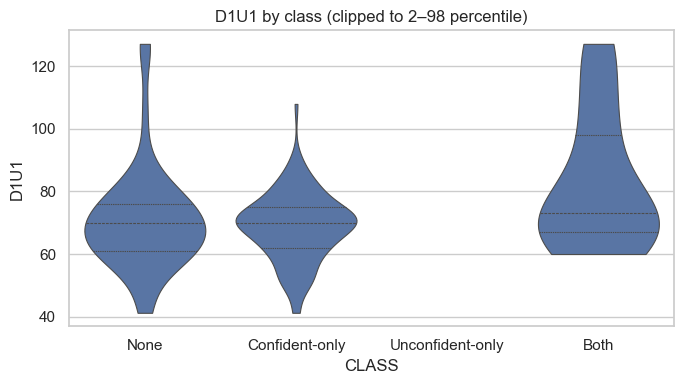

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\2405962107.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


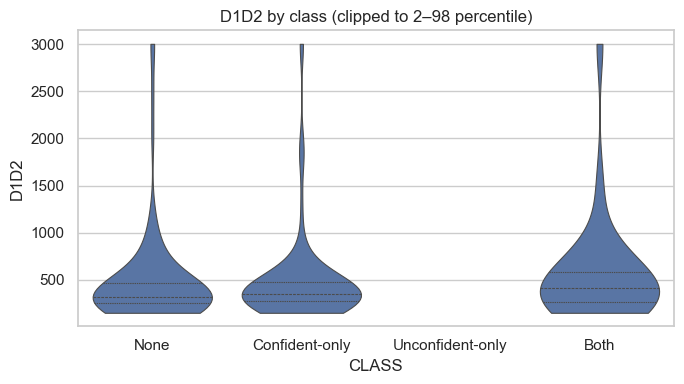

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\2405962107.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


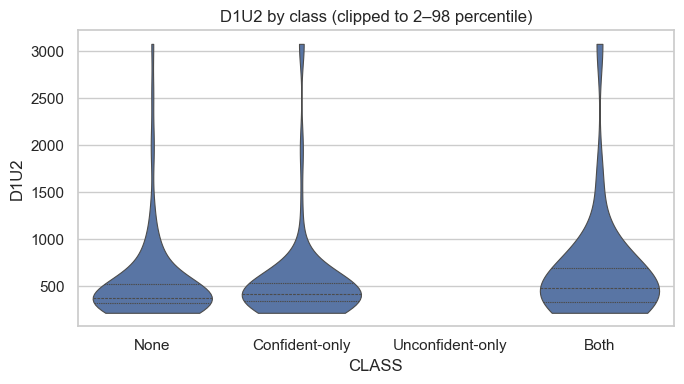

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\2405962107.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


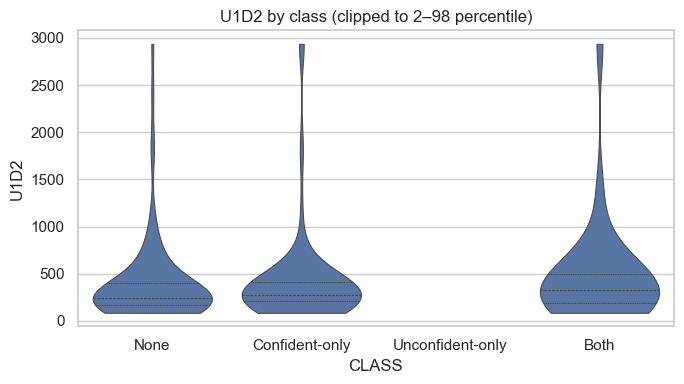

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\2405962107.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


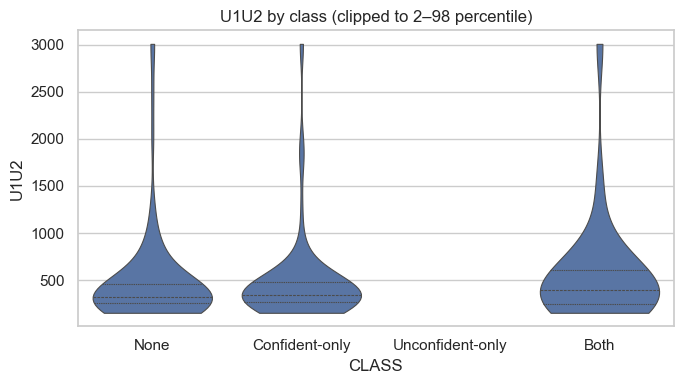

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\2405962107.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


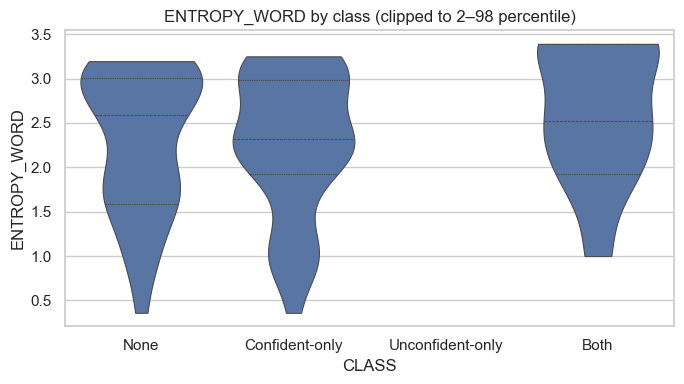

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\2405962107.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


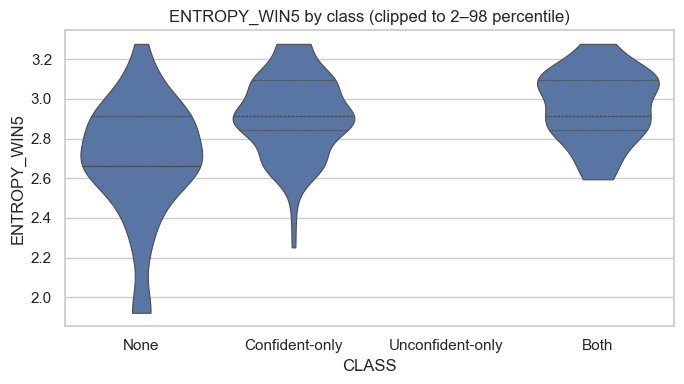

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\2405962107.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


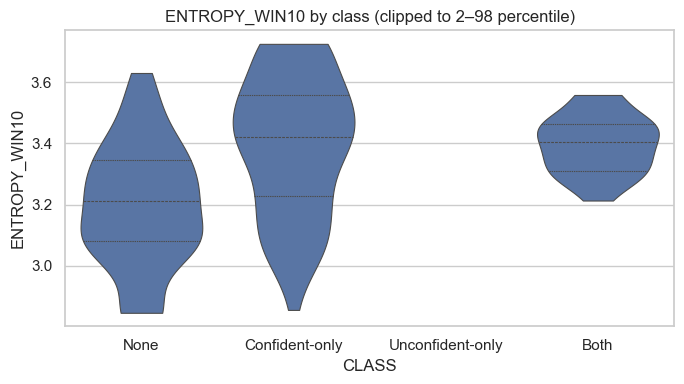

In [60]:
# Helper: draw violin plots with mild outlier clipping (1st–99th percentiles)
def violin_by_class_trimmed(df, feat, order, clip=(0.02, 0.98)):
    s = pd.to_numeric(df[feat], errors="coerce").dropna()
    if s.empty:
        return
    lo, hi = s.quantile(clip)
    s_clipped = s.clip(lower=lo, upper=hi)
    data = pd.DataFrame({"CLASS": df.loc[s.index, "CLASS"], feat: s_clipped}).dropna()

    plt.figure(figsize=(7, 4))
    sns.violinplot(
        data=data, x="CLASS", y=feat, order=order,
        inner="quartile", cut=0, scale="width", linewidth=0.8
    )
    plt.title(f"{feat} by class (clipped to {clip[0]*100:.0f}–{clip[1]*100:.0f} percentile)")
    plt.tight_layout()
    plt.show()

# Plot all latency and entropy features
for feat in LATENCY_POS + LATENCY_SIGN + ENTROPY_FEATS:
    if feat in df.columns:
        violin_by_class_trimmed(df, feat, CLASS_ORDER)


### not-normalized plotting

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


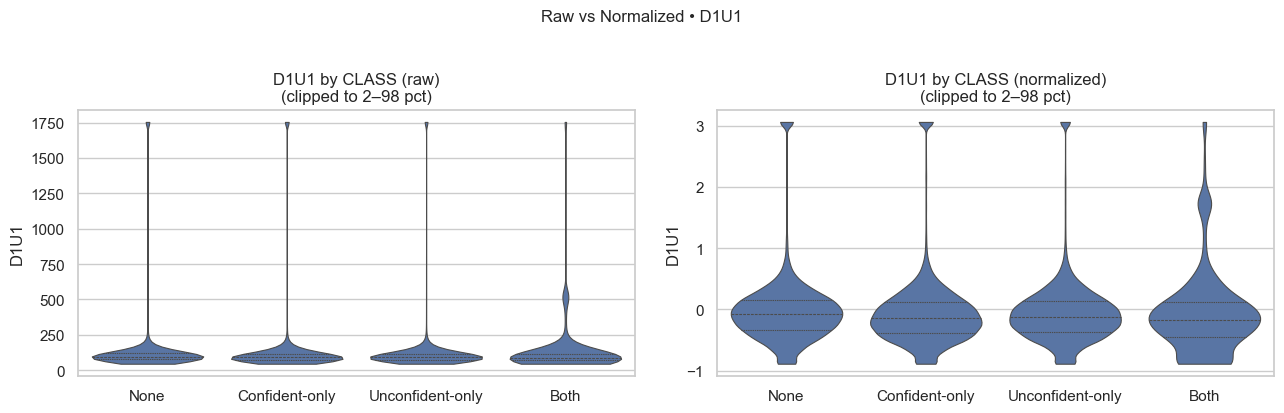

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


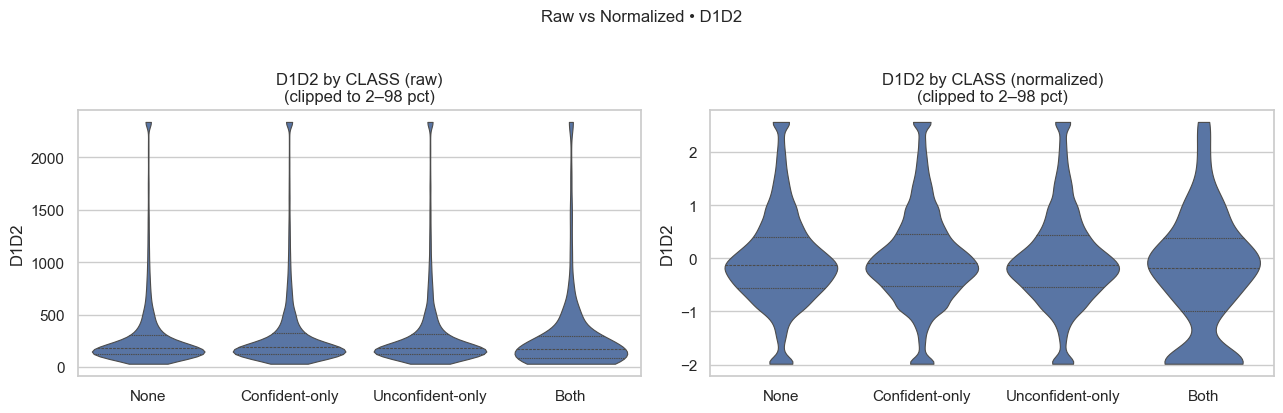

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


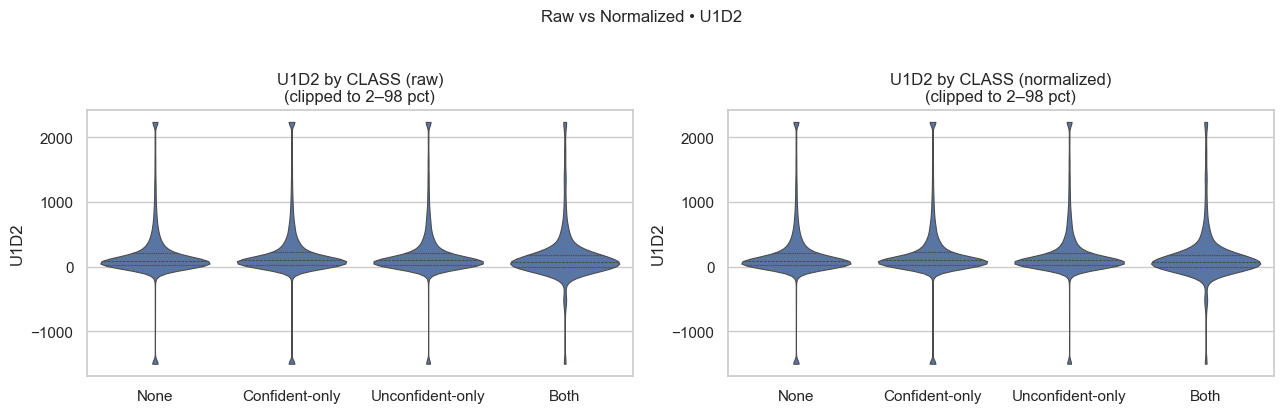

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


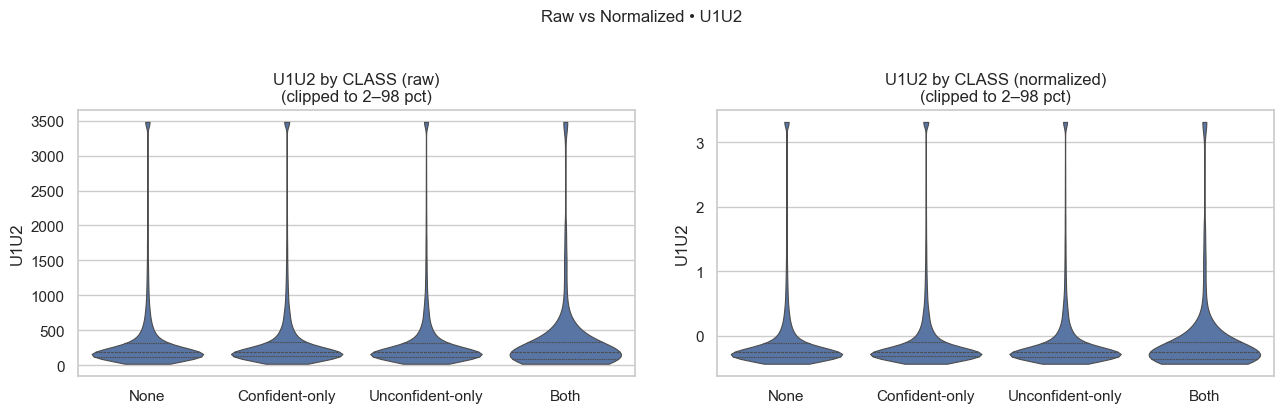

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


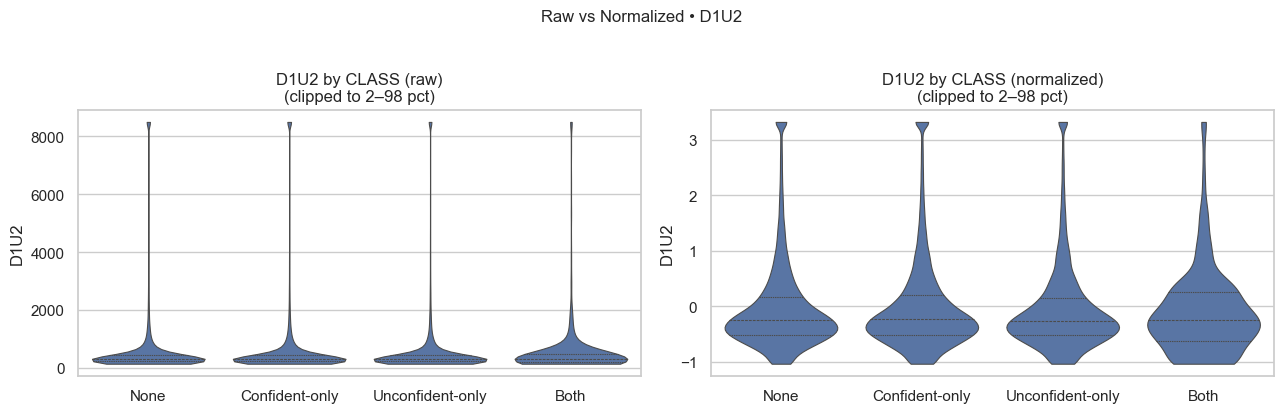

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


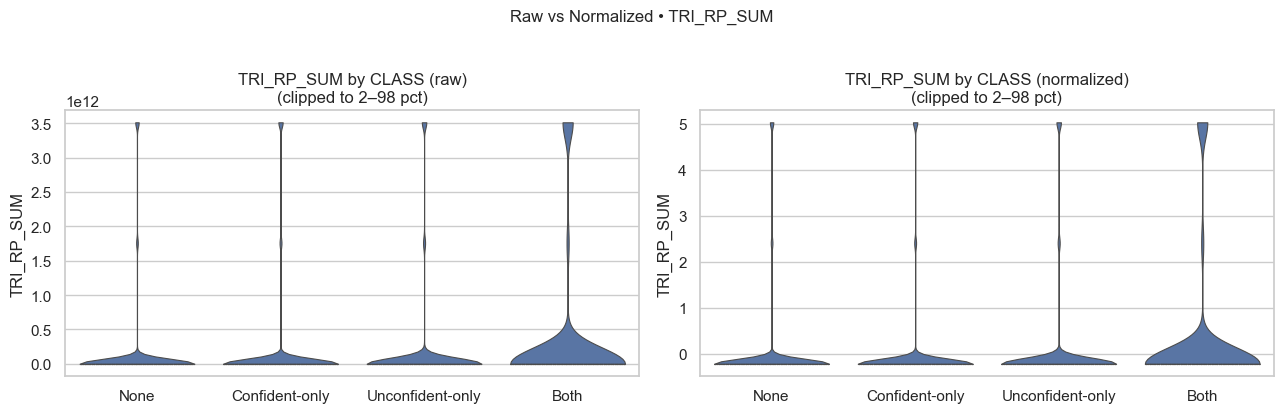

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


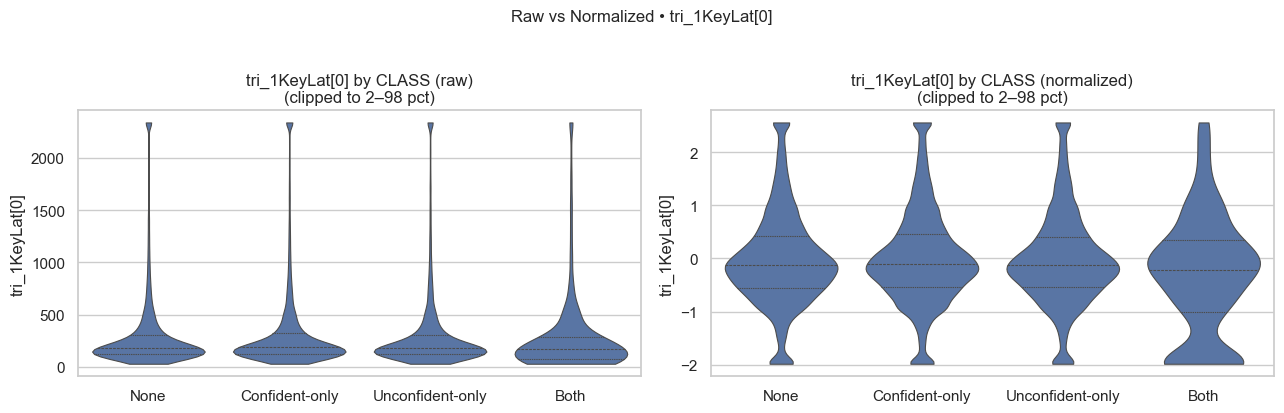

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


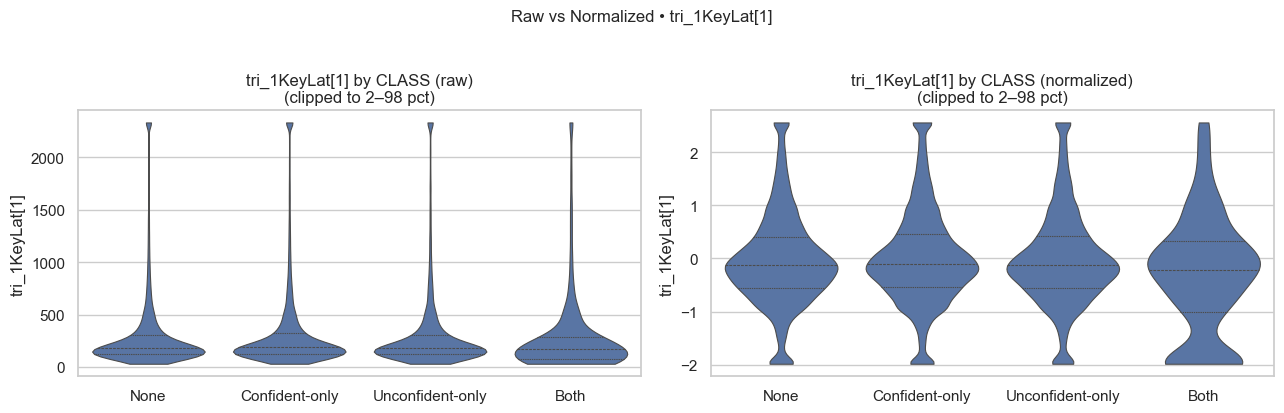

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


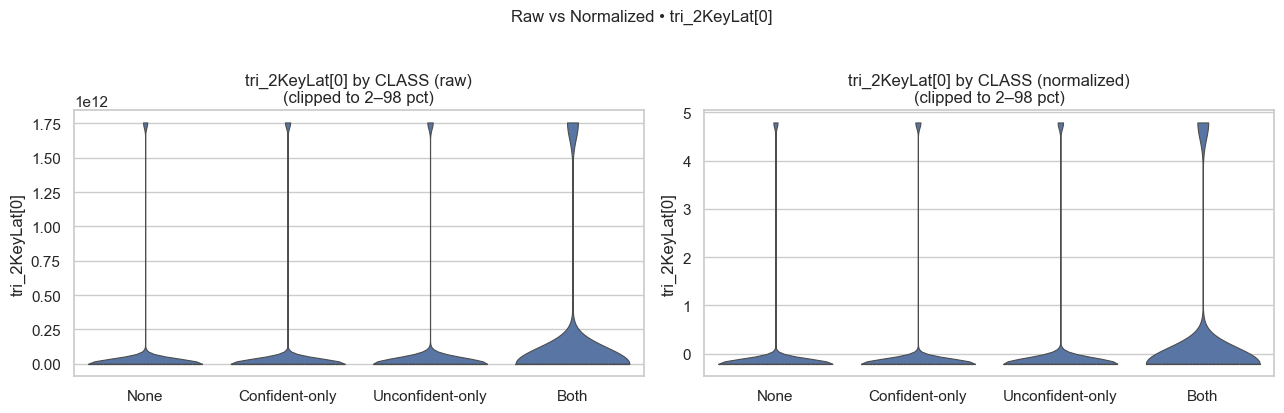

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


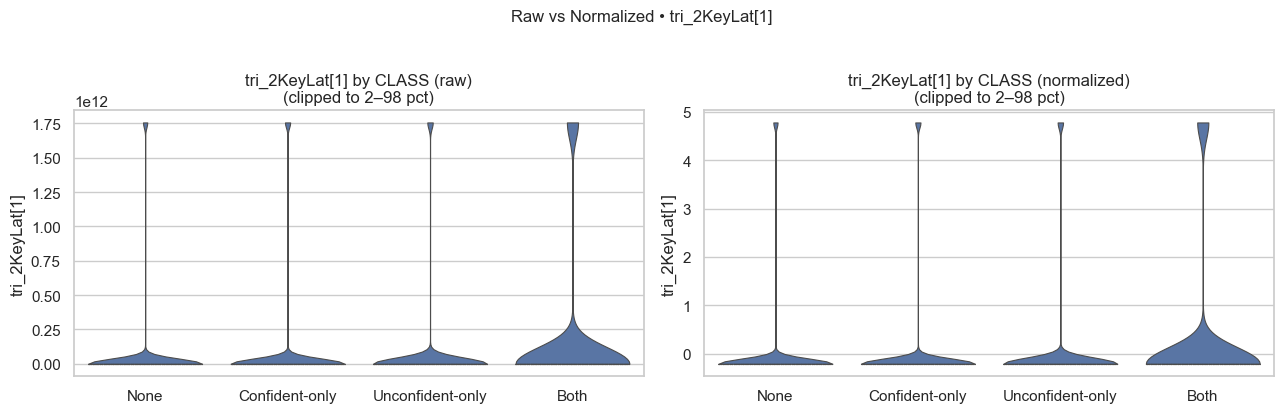

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


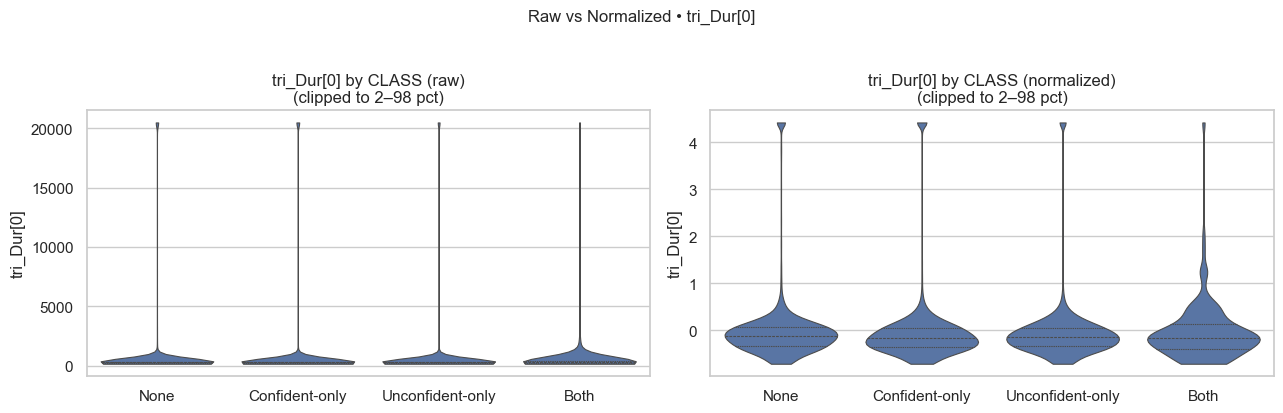

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


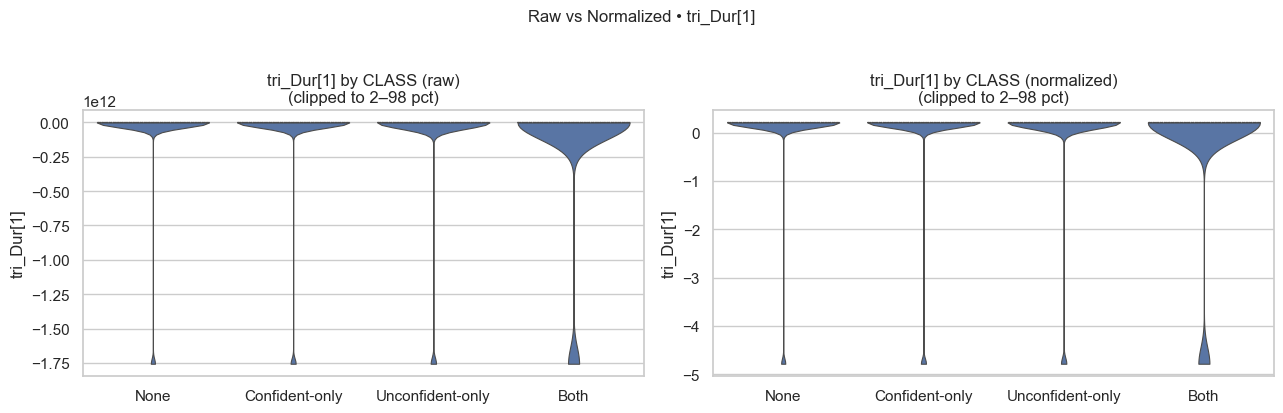

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


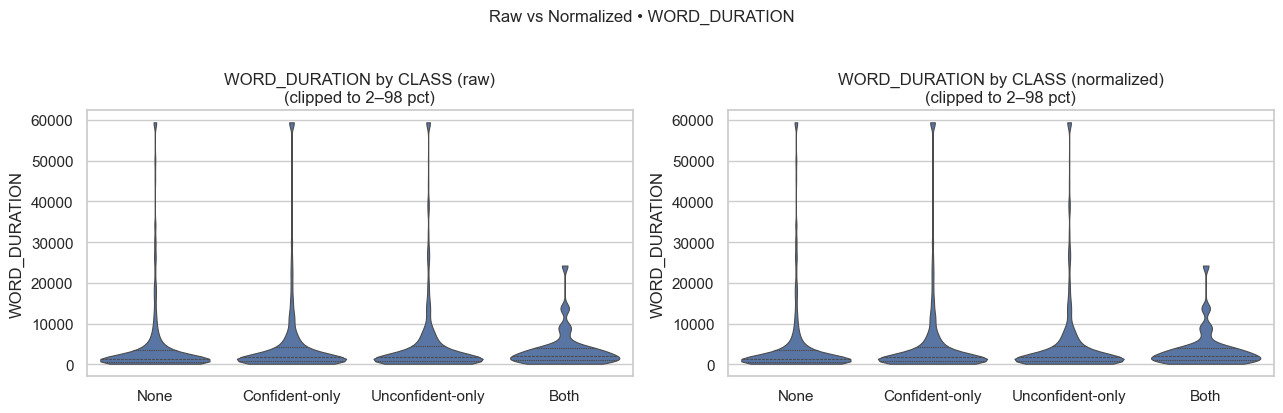

C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\40709941.py:55: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


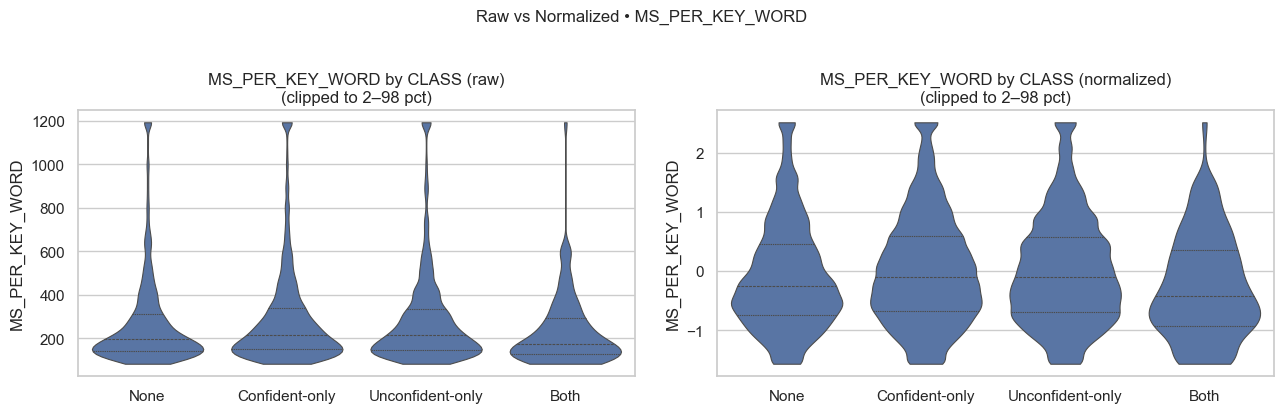

In [61]:
# ==== Raw vs Normalized violin plots (by CLASS) =================================
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

RAW_DIR  = "data/features_prediciton_raw"   # <- use curated raw; change to "data/trigraphs" if needed
NORM_DIR = "data/normalized"

# --- helpers --------------------------------------------------------------------
CLASS_ORDER = ["None","Confident-only","Unconfident-only","Both"]

def _ensure_class(df: pd.DataFrame) -> pd.DataFrame:
    if "CLASS" not in df.columns:
        conf = pd.to_numeric(df.get("CONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
        unco = pd.to_numeric(df.get("UNCONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
        df["CLASS"] = np.select(
            [(conf==1)&(unco==0), (conf==0)&(unco==1), (conf==1)&(unco==1)],
            ["Confident-only","Unconfident-only","Both"],
            default="None"
        )
    df["CLASS"] = pd.Categorical(df["CLASS"], categories=CLASS_ORDER, ordered=True)
    return df

def _read_concat_csvs(folder, pattern="*.csv", usecols=None):
    paths = sorted(glob.glob(os.path.join(folder, pattern)))
    if not paths:
        raise FileNotFoundError(f"No CSVs matched in {folder}/{pattern}")
    dfs = []
    for p in paths:
        try:
            dfs.append(pd.read_csv(p, low_memory=False, usecols=usecols))
        except Exception as e:
            print(f"Skip {os.path.basename(p)}: {e}")
    if not dfs:
        raise RuntimeError(f"Could not read any CSVs from {folder}")
    return pd.concat(dfs, axis=0, ignore_index=True, sort=False)

def violin_by_class_trimmed(df, feat, order, clip=(0.02, 0.98), ax=None, title_suffix=""):
    if feat not in df.columns:
        if ax is not None: ax.set_visible(False)
        return
    s = pd.to_numeric(df[feat], errors="coerce")
    ok = s.notna()
    if ok.sum() == 0:
        if ax is not None: ax.set_visible(False)
        return
    s = s[ok]
    lo, hi = s.quantile(clip)
    s_clipped = s.clip(lower=lo, upper=hi)
    data = pd.DataFrame({"CLASS": df.loc[s_clipped.index, "CLASS"], feat: s_clipped})
    if ax is None:
        _, ax = plt.subplots(figsize=(7,4))
    sns.violinplot(
        data=data, x="CLASS", y=feat, order=order,
        inner="quartile", cut=0, scale="width", linewidth=0.8, ax=ax
    )
    ax.set_title(f"{feat} by CLASS {title_suffix}\n(clipped to {int(clip[0]*100)}–{int(clip[1]*100)} pct)")
    ax.set_xlabel("")
    ax.set_ylabel(feat)

# --- load raw (pre-normalization) ----------------------------------------------
df_raw = _read_concat_csvs(RAW_DIR, "*.csv")
df_raw = _ensure_class(df_raw)

# --- load normalized (per-file normalized) -------------------------------------
norm_paths = sorted(glob.glob(os.path.join(NORM_DIR, "*__normalized.csv")))
if not norm_paths:
    raise FileNotFoundError(f"No normalized per-file CSVs found in {NORM_DIR} matching '*__normalized.csv'")
df_norm = pd.concat([pd.read_csv(p, low_memory=False) for p in norm_paths],
                    axis=0, ignore_index=True, sort=False)
df_norm = _ensure_class(df_norm)

# --- choose features to plot ----------------------------------------------------
CANDIDATES = [
    "D1U1","D1D2","U1D2","U1U2","D1U2",
    "TRI_RP_SUM","tri_1KeyLat[0]","tri_1KeyLat[1]","tri_2KeyLat[0]","tri_2KeyLat[1]",
    "tri_Dur[0]","tri_Dur[1]",
    "WORD_DURATION","MS_PER_KEY_WORD",
    "ENTROPY_WORD","ENTROPY_WIN5","ENTROPY_WIN10",
]
FEATURES_TO_PLOT = [c for c in CANDIDATES if c in df_raw.columns and c in df_norm.columns]
if not FEATURES_TO_PLOT:
    raise RuntimeError("No overlap between raw and normalized columns to plot.")

# --- look & feel ----------------------------------------------------------------
plt.rcParams.update(plt.rcParamsDefault)
sns.set_theme(context="notebook", style="whitegrid")

# --- side-by-side raw vs normalized for each feature ---------------------------
for feat in FEATURES_TO_PLOT:
    fig, axes = plt.subplots(1, 2, figsize=(13, 4), sharey=False)
    violin_by_class_trimmed(df_raw,  feat, CLASS_ORDER, clip=(0.02, 0.98), ax=axes[0], title_suffix="(raw)")
    violin_by_class_trimmed(df_norm, feat, CLASS_ORDER, clip=(0.02, 0.98), ax=axes[1], title_suffix="(normalized)")
    fig.suptitle(f"Raw vs Normalized • {feat}", y=1.03, fontsize=12)
    plt.tight_layout()
    plt.show()


### Generate CSV files that only contain files with features used for later prediction

In [62]:
# === Build "features_prediciton_raw" with only the specified keystroke features (safe int cast) ===
import os, glob
import numpy as np
import pandas as pd

INPUT_DIR  = "data/trigraphs"
OUTPUT_DIR = "data/features_prediciton_raw"  # (spelled as requested)
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Exact columns to keep, in the exact order provided
KEEP_COLS = [
    "CONFIDENT_MARKED_CHAR","UNCONFIDENT_MARKED_CHAR",
    "D1U1","D1D2","U1U2","D1U2","U1D2","WORD_ID",
    "D1U1_MEAN_WORD","D1D2_MEAN_WORD","U1U2_MEAN_WORD","D1U2_MEAN_WORD","U1D2_MEAN_WORD",
    "WORD_LEN_KEYS","WORD_DURATION","OVERLAP_FLAG","MS_PER_KEY_WORD",
    "D1U1_WORD_STD","D1U1_WORD_IQR","D1U1_WORD_RANGE","D1U1_WORD_CV",
    "D1D2_WORD_STD","D1D2_WORD_IQR","D1D2_WORD_RANGE","D1D2_WORD_CV",
    "U1U2_WORD_STD","U1U2_WORD_IQR","U1U2_WORD_RANGE","U1U2_WORD_CV",
    "D1U2_WORD_STD","D1U2_WORD_IQR","D1U2_WORD_RANGE","D1U2_WORD_CV",
    "U1D2_WORD_STD","U1D2_WORD_IQR","U1D2_WORD_RANGE","U1D2_WORD_CV",
    "PAUSE_FLAG_X2","PAUSE_FLAG_P90","PAUSE_RATE_WORD","OVERLAP_MAG","OVERLAP_RATE_WORD","OVERLAP_MAG_MEAN_WORD",
    "BACKSPACE_FLAG","BACKSPACE_RATE_WORD",
    "TRI_RP_SUM","tri_1KeyLat[0]","tri_1KeyLat[1]","tri_2KeyLat[0]","tri_2KeyLat[1]",
    "tri_1D2D[0]","tri_2D3D[0]","tri_Dur[0]","tri_Dur[1]","tri_NumEvents[0]","tri_NumEvents[1]",
    "TRI_RP_SUM_WORD_MEAN","tri_2KeyLat[0]_WORD_MEAN","tri_2KeyLat[1]_WORD_MEAN",
    "tri_1D2D[0]_WORD_MEAN","tri_2D3D[0]_WORD_MEAN","tri_Dur[0]_WORD_MEAN",
    "TRI_RP_SUM_DEV_FROM_TRIGRAM_MEAN","tri_2KeyLat[0]_DEV_FROM_TRIGRAM_MEAN",
    "tri_2KeyLat[1]_DEV_FROM_TRIGRAM_MEAN","tri_Dur[0]_DEV_FROM_TRIGRAM_MEAN",
]

def cast_whole_number_floats_to_int64_safe(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cast float columns to int64 ONLY if:
      - column has NO NaN/inf, and
      - all values are whole numbers (e.g., 113.0)
    Otherwise leave as float to avoid 'Cannot convert non-finite values' errors.
    """
    out = df.copy()
    for c in out.columns:
        if pd.api.types.is_float_dtype(out[c]):
            s = out[c].to_numpy()
            # skip if any non-finite
            if not np.isfinite(s).all():
                continue
            # whole-number check
            if np.all(np.equal(np.floor(s), s)):
                out[c] = out[c].astype(np.int64)
    return out

paths = sorted(glob.glob(os.path.join(INPUT_DIR, "*.csv")))
if not paths:
    print(f"No CSVs in {INPUT_DIR}")

ok = err = 0
for path in paths:
    try:
        df = pd.read_csv(path, low_memory=False)

        # Ensure all KEEP_COLS exist; add missing as NaN
        missing = [c for c in KEEP_COLS if c not in df.columns]
        for m in missing:
            df[m] = np.nan

        # Select in the exact order
        out = df[KEEP_COLS].copy()

        # Safe cast whole-number floats to int64 (skip columns with NaN/inf)
        out = cast_whole_number_floats_to_int64_safe(out)

        base = os.path.splitext(os.path.basename(path))[0]
        out_path = os.path.join(OUTPUT_DIR, f"{base}__features_prediction_raw.csv")
        out.to_csv(out_path, index=False)

        ok += 1
        miss_info = f" (added {len(missing)} missing cols)" if missing else ""
        print(f"✔ {os.path.basename(path)} → {os.path.basename(out_path)}{miss_info}")
        if missing:
            print("    Missing:", ", ".join(missing[:8]) + (" ..." if len(missing) > 8 else ""))
    except Exception as e:
        err += 1
        print(f"✖ {os.path.basename(path)}  ERROR: {e}")

print(f"Done. Success: {ok}, Errors: {err}")


✔ experiment_57b345d276b2ea0001c988bc_20250904190321__word_features__trigraph_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190321__word_features__trigraph_features__features_prediction_raw.csv
✔ experiment_57b345d276b2ea0001c988bc_20250904190454__word_features__trigraph_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190454__word_features__trigraph_features__features_prediction_raw.csv
✔ experiment_57b345d276b2ea0001c988bc_20250904190536__word_features__trigraph_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190536__word_features__trigraph_features__features_prediction_raw.csv
✔ experiment_57b345d276b2ea0001c988bc_20250904190637__word_features__trigraph_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190637__word_features__trigraph_features__features_prediction_raw.csv
✔ experiment_57b345d276b2ea0001c988bc_20250904190707__word_features__trigraph_features.csv → experiment_57b345d276b2ea0001c988bc_20250904190707__word_features__trigraph_fea

### create folder to contain normalized files with features for prediction

In [63]:
# === Normalize curated keystroke features into data/normalized (one file -> one normalized file) ===
# Input:  data/features_prediciton_raw/*.csv   (your curated schema)
# Output: data/normalized/<basename>__normalized.csv + scalers_final.json
import os, glob, json
import numpy as np
import pandas as pd

SRC_DIR  = "data/features_prediciton_raw"
OUT_DIR  = "data/normalized"
os.makedirs(OUT_DIR, exist_ok=True)

# Your curated schema (order)
KEEP_COLS = [
    "CONFIDENT_MARKED_CHAR","UNCONFIDENT_MARKED_CHAR",
    "D1U1","D1D2","U1U2","D1U2","U1D2","WORD_ID",
    "D1U1_MEAN_WORD","D1D2_MEAN_WORD","U1U2_MEAN_WORD","D1U2_MEAN_WORD","U1D2_MEAN_WORD",
    "WORD_LEN_KEYS","WORD_DURATION","OVERLAP_FLAG","MS_PER_KEY_WORD",
    "D1U1_WORD_STD","D1U1_WORD_IQR","D1U1_WORD_RANGE","D1U1_WORD_CV",
    "D1D2_WORD_STD","D1D2_WORD_IQR","D1D2_WORD_RANGE","D1D2_WORD_CV",
    "U1U2_WORD_STD","U1U2_WORD_IQR","U1U2_WORD_RANGE","U1U2_WORD_CV",
    "D1U2_WORD_STD","D1U2_WORD_IQR","D1U2_WORD_RANGE","D1U2_WORD_CV",
    "U1D2_WORD_STD","U1D2_WORD_IQR","U1D2_WORD_RANGE","U1D2_WORD_CV",
    "PAUSE_FLAG_X2","PAUSE_FLAG_P90","PAUSE_RATE_WORD","OVERLAP_MAG","OVERLAP_RATE_WORD","OVERLAP_MAG_MEAN_WORD",
    "BACKSPACE_FLAG","BACKSPACE_RATE_WORD",
    "TRI_RP_SUM","tri_1KeyLat[0]","tri_1KeyLat[1]","tri_2KeyLat[0]","tri_2KeyLat[1]",
    "tri_1D2D[0]","tri_2D3D[0]","tri_Dur[0]","tri_Dur[1]","tri_NumEvents[0]","tri_NumEvents[1]",
    "TRI_RP_SUM_WORD_MEAN","tri_2KeyLat[0]_WORD_MEAN","tri_2KeyLat[1]_WORD_MEAN",
    "tri_1D2D[0]_WORD_MEAN","tri_2D3D[0]_WORD_MEAN","tri_Dur[0]_WORD_MEAN",
    "TRI_RP_SUM_DEV_FROM_TRIGRAM_MEAN","tri_2KeyLat[0]_DEV_FROM_TRIGRAM_MEAN",
    "tri_2KeyLat[1]_DEV_FROM_TRIGRAM_MEAN","tri_Dur[0]_DEV_FROM_TRIGRAM_MEAN",
]

# -------- load all to fit one global scaler --------
paths = sorted(glob.glob(os.path.join(SRC_DIR, "*.csv")))
if not paths:
    raise FileNotFoundError(f"No CSVs found in {SRC_DIR}")

dfs = []
for p in paths:
    try:
        df = pd.read_csv(p, low_memory=False)
        # ensure schema
        for c in KEEP_COLS:
            if c not in df.columns:
                df[c] = np.nan
        df = df[KEEP_COLS].copy()
        df["__SRC__"] = os.path.basename(p)
        dfs.append(df)
    except Exception as e:
        print(f"Skip {os.path.basename(p)}: {e}")

full = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

# -------- split features into buckets (what to scale vs leave) --------
LABELS = {"CONFIDENT_MARKED_CHAR","UNCONFIDENT_MARKED_CHAR"}
LEAVE_ALWAYS = set(LABELS) | {"WORD_ID","OVERLAP_FLAG","BACKSPACE_FLAG"}

def split_feature_buckets(df, cols):
    pos_timing, neg_ok_timing, count_like, leave_as_is = [], [], [], []
    for c in cols:
        if c in LEAVE_ALWAYS:
            leave_as_is.append(c); continue
        cu = c.upper()
        if any(k in cu for k in ["RATE","RATIO","FREQ","DEV_FROM"]):
            leave_as_is.append(c); continue
        # counts/lengths
        if any(k in cu for k in ["COUNT","NUM","LEN","_N"]) and "TRI_" not in cu:
            count_like.append(c); continue
        # timings (uni/di/tri, word duration)
        if any(k in cu for k in ["D1U1","D1D2","U1U2","D1U2","LAT","DUR","TRI_","WORD_DURATION","MS_PER_KEY","RP","PP"]):
            s = pd.to_numeric(df[c], errors="coerce")
            if (s.min(skipna=True) if s.notna().any() else 0) < 0 or ("U1D2" in cu) or ("RP" in cu):
                neg_ok_timing.append(c)
            else:
                pos_timing.append(c)
            continue
        # default
        leave_as_is.append(c)
    return sorted(set(pos_timing)), sorted(set(neg_ok_timing)), sorted(set(count_like)), sorted(set(leave_as_is))

X_cols = [c for c in KEEP_COLS]  # keep all, but only some will be scaled
pos_timing, neg_ok_timing, count_like, leave_as_is = split_feature_buckets(full, X_cols)

# -------- fit one global scaler on the full corpus --------
WINSOR_Q = (0.01, 0.99)  # 1–99% clamp for neg-capable timings

def winsor_bounds(x, lo=0.01, hi=0.99):
    return float(np.nanpercentile(x, lo*100)), float(np.nanpercentile(x, hi*100))

scalers = {}

# positive timings: log1p -> z
for c in pos_timing:
    x = np.log1p(pd.to_numeric(full[c], errors="coerce").values.astype(float))
    mu, sd = np.nanmean(x), np.nanstd(x)
    scalers[c] = {"kind":"log1p_z","mean":float(mu),"std":float(sd if sd>0 else 1.0)}

# possibly-negative timings: winsorize -> z
for c in neg_ok_timing:
    x = pd.to_numeric(full[c], errors="coerce").values.astype(float)
    lo, hi = winsor_bounds(x, *WINSOR_Q)
    x = np.clip(x, lo, hi)
    mu, sd = np.nanmean(x), np.nanstd(x)
    scalers[c] = {"kind":"winsor_z","lo":lo,"hi":hi,"mean":float(mu),"std":float(sd if sd>0 else 1.0)}

# counts/lengths: sqrt -> z
for c in count_like:
    x = np.sqrt(np.clip(pd.to_numeric(full[c], errors="coerce").values.astype(float), 0, None))
    mu, sd = np.nanmean(x), np.nanstd(x)
    scalers[c] = {"kind":"sqrt_z","mean":float(mu),"std":float(sd if sd>0 else 1.0)}

# save scaler config
with open(os.path.join(OUT_DIR, "scalers_final.json"), "w", encoding="utf-8") as f:
    json.dump({
        "X_cols": X_cols,
        "pos_timing": pos_timing,
        "neg_ok_timing": neg_ok_timing,
        "count_like": count_like,
        "leave_as_is": leave_as_is,
        "scalers": scalers
    }, f, indent=2)

def apply_scalers(df, params):
    out = df.copy()
    for c, p in params.items():
        if c not in out.columns:
            continue
        x = pd.to_numeric(out[c], errors="coerce").values.astype(float)
        if p["kind"] == "log1p_z":
            out[c] = (np.log1p(x) - p["mean"]) / (p["std"] if p["std"] else 1.0)
        elif p["kind"] == "winsor_z":
            x = np.clip(x, p["lo"], p["hi"])
            out[c] = (x - p["mean"]) / (p["std"] if p["std"] else 1.0)
        elif p["kind"] == "sqrt_z":
            x = np.sqrt(np.clip(x, 0, None))
            out[c] = (x - p["mean"]) / (p["std"] if p["std"] else 1.0)
    return out

# -------- apply per file and write normalized copies --------
ok = err = 0
for p in paths:
    try:
        df = pd.read_csv(p, low_memory=False)
        for c in KEEP_COLS:
            if c not in df.columns:
                df[c] = np.nan
        df = df[KEEP_COLS].copy()

        df_norm = apply_scalers(df, scalers)  # labels/flags untouched (no scaler entry)

        base = os.path.splitext(os.path.basename(p))[0]
        out_path = os.path.join(OUT_DIR, f"{base}__normalized.csv")
        df_norm.to_csv(out_path, index=False)
        ok += 1
        print(f"✔ {os.path.basename(p)} → {os.path.basename(out_path)}")
    except Exception as e:
        err += 1
        print(f"✖ {os.path.basename(p)}  ERROR: {e}")

print(f"Done. Success: {ok}, Errors: {err}")


✔ experiment_57b345d276b2ea0001c988bc_20250904190321__word_features__trigraph_features__features_prediction_raw.csv → experiment_57b345d276b2ea0001c988bc_20250904190321__word_features__trigraph_features__features_prediction_raw__normalized.csv
✔ experiment_57b345d276b2ea0001c988bc_20250904190454__word_features__trigraph_features__features_prediction_raw.csv → experiment_57b345d276b2ea0001c988bc_20250904190454__word_features__trigraph_features__features_prediction_raw__normalized.csv
✔ experiment_57b345d276b2ea0001c988bc_20250904190536__word_features__trigraph_features__features_prediction_raw.csv → experiment_57b345d276b2ea0001c988bc_20250904190536__word_features__trigraph_features__features_prediction_raw__normalized.csv
✔ experiment_57b345d276b2ea0001c988bc_20250904190637__word_features__trigraph_features__features_prediction_raw.csv → experiment_57b345d276b2ea0001c988bc_20250904190637__word_features__trigraph_features__features_prediction_raw__normalized.csv
✔ experiment_57b345d276b

## Train models

### PERSONALIZED CLASSIFIER: build 2 Random Forest classifier and 2 SVM trained per participant to predict UNCONFIDENT_MARKED and CONFIDENT_MARKED

In [1]:
# === Personalized Random Forest (restricted features, robust target) ============
import os, glob, time
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

# ---------------------- config --------------------------------------------------
INPUT_DIR   = "data/personalized_raw"       # expects *__personalized_raw.csv
MODEL_ROOT  = "model_personalized/rf"
REPORT_CM   = "reports/cm"
REPORT_FIP  = "reports/fip"
N_SPLITS    = 5
SEED        = 42
DROP_BOTH   = True
N_REPEATS   = 5
MIN_ROWS    = 10
MODEL_NAME  = "RF"
# Drop per-participant features that are (near) constant to avoid lookup-ish leakage
DROP_NEAR_CONSTANT = True
NEAR_CONST_STD_THR = 1e-12

# Only these columns will be used for X
ALLOWED_FEATURES = [
    "D1U1","D1D2","U1U2","D1U2","U1D2",
    "OVERLAP_FLAG","PAUSE_FLAG_X2","PAUSE_FLAG_P90",
    "OVERLAP_MAG","OVERLAP_RATE_WORD","OVERLAP_MAG_MEAN_WORD",
    "BACKSPACE_FLAG","BACKSPACE_RATE_WORD",
    "TRI_RP_SUM","tri_1KeyLat[0]","tri_1KeyLat[1]","tri_2KeyLat[0]","tri_2KeyLat[1]",
    "tri_1D2D[0]","tri_2D3D[0]","tri_Dur[0]","tri_Dur[1]","tri_NumEvents[0]","tri_NumEvents[1]",
    "TRI_RP_SUM_DEV_FROM_TRIGRAM_MEAN","tri_2KeyLat[0]_DEV_FROM_TRIGRAM_MEAN",
    "tri_2KeyLat[1]_DEV_FROM_TRIGRAM_MEAN","tri_Dur[0]_DEV_FROM_TRIGRAM_MEAN",
]

# ---------------------- setup ---------------------------------------------------
os.makedirs(MODEL_ROOT, exist_ok=True)
os.makedirs(REPORT_CM, exist_ok=True)
os.makedirs(REPORT_FIP, exist_ok=True)

def _build_target(df: pd.DataFrame, drop_both: bool = True):
    """Build robust 3-class target and return (df_with_y, label_map). Drops unknowns.
       IMPORTANT: reset index so assignments align by position, not labels."""
    # Work on a copy with a clean RangeIndex to prevent alignment NaNs
    out = df.copy().reset_index(drop=True)

    # Ensure columns exist (some files may lack them)
    if "CONFIDENT_MARKED_CHAR" not in out.columns: out["CONFIDENT_MARKED_CHAR"] = np.nan
    if "UNCONFIDENT_MARKED_CHAR" not in out.columns: out["UNCONFIDENT_MARKED_CHAR"] = np.nan

    conf = pd.to_numeric(out["CONFIDENT_MARKED_CHAR"], errors="coerce").fillna(0).astype(int)
    unco = pd.to_numeric(out["UNCONFIDENT_MARKED_CHAR"], errors="coerce").fillna(0).astype(int)

    # Build 4-way then reduce to 3-way (drop 'both')
    cls = np.select(
        [(conf==1)&(unco==0), (conf==0)&(unco==1), (conf==1)&(unco==1)],
        ["confident_only","unconfident_only","both"],
        default="none"
    )
    # Align by position: give the same index as 'out'
    out["TARGET_3"] = pd.Series(cls, index=out.index, dtype="object")

    if drop_both:
        before = len(out)
        out = out[out["TARGET_3"] != "both"]
        dropped = before - len(out)
        if dropped > 0:
            print(f"[target] dropped {dropped} 'both' rows")

    # Map to ints safely; report & drop unknowns
    label_map = {"none":0, "confident_only":1, "unconfident_only":2}
    mapped = out["TARGET_3"].astype(str).str.strip().str.lower().map(label_map)

    bad = mapped.isna()
    if bad.any():
        bad_vals = out.loc[bad, "TARGET_3"].astype(str).value_counts().to_dict()
        print(f"[target] dropping {bad.sum()} rows with unknown TARGET_3 values: {bad_vals}")
        out = out.loc[~bad].copy()
        mapped = mapped.loc[~bad]

    out["y"] = mapped.astype(int)

    # Small class distribution log
    counts = out["y"].value_counts().to_dict()
    print(f"[target] class counts (0=none,1=confident_only,2=unconfident_only): {counts}")
    return out, label_map

# ---------------------- load data ----------------------------------------------
paths = sorted(glob.glob(os.path.join(INPUT_DIR, "*__personalized_raw.csv")))
if not paths:
    raise FileNotFoundError(f"No personalized CSVs in {INPUT_DIR}")

dfs = []
for p in paths:
    df = pd.read_csv(p, low_memory=False)
    df["__SRC__"] = os.path.basename(p)
    dfs.append(df)
full = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

if "PARTICIPANT_ID" not in full.columns:
    raise ValueError("PARTICIPANT_ID missing in personalized_raw — required for per-user models.")

participants = sorted(full["PARTICIPANT_ID"].dropna().astype(str).unique().tolist())
print(f"[{MODEL_NAME}] Participants: {len(participants)} found. Using ONLY {len(ALLOWED_FEATURES)} allowed features.")

# ---------------------- per participant loop -----------------------------------
for idx, pid in enumerate(participants, start=1):
    # Keep user's rows, then reset index BEFORE building target (belt & suspenders)
    user = full[full["PARTICIPANT_ID"].astype(str) == pid].copy().reset_index(drop=True)
    print(f"\n[{MODEL_NAME}][{idx}/{len(participants)}] p={pid} | rows={len(user):,}")

    user, _ = _build_target(user, drop_both=DROP_BOTH)

    # Skip if too small or only one class remains
    if len(user) < MIN_ROWS:
        print(f"[{MODEL_NAME}][p={pid}] Skip — too few rows ({len(user)})")
        continue
    if user["y"].nunique() < 2:
        print(f"[{MODEL_NAME}][p={pid}] Skip — only one class present after filtering")
        continue

    # Features = intersection of allowed features & existing columns
    X_cols = [c for c in ALLOWED_FEATURES if c in user.columns]
    missing = [c for c in ALLOWED_FEATURES if c not in user.columns]
    if missing:
        print(f"[{MODEL_NAME}][p={pid}] Missing {len(missing)} allowed features (ignored): "
              f"{missing[:8]}{'...' if len(missing)>8 else ''}")
    if len(X_cols) < 3:
        print(f"[{MODEL_NAME}][p={pid}] Skip — not enough usable features ({len(X_cols)})")
        continue

    X = user[X_cols].apply(pd.to_numeric, errors="coerce")
    y = user["y"].values

    # Optionally drop near-constant features per participant
    if DROP_NEAR_CONSTANT:
        desc = X.describe().T
        to_drop = desc.index[(desc["std"].fillna(0).abs() < NEAR_CONST_STD_THR)].tolist()
        if to_drop:
            print(f"[{MODEL_NAME}][p={pid}] Dropping near-constant features: {to_drop}")
            X_cols = [c for c in X_cols if c not in to_drop]
            X = X[X_cols]
            if len(X_cols) < 3:
                print(f"[{MODEL_NAME}][p={pid}] Skip — not enough features after variance filter")
                continue

    # dirs
    model_dir = os.path.join(MODEL_ROOT, f"p_{pid}")
    cm_dir    = os.path.join(REPORT_CM,  f"{pid}")
    fip_dir   = os.path.join(REPORT_FIP, f"{pid}")
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(cm_dir, exist_ok=True)
    os.makedirs(fip_dir, exist_ok=True)

    print(f"[{MODEL_NAME}][p={pid}] Using {len(X_cols)} features")
    print(f"[{MODEL_NAME}][p={pid}] Training {N_SPLITS}-fold CV…")
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)

    cm_sum = np.zeros((3,3), dtype=float)
    perm_accum = np.zeros(len(X_cols), dtype=float)
    rf_imp_accum = np.zeros(len(X_cols), dtype=float)
    metrics = []
    t0 = time.time()

    for k, (tr_idx, va_idx) in enumerate(kf.split(X, y)):
        print(f"[{MODEL_NAME}][p={pid}]  • Fold {k}: train={len(tr_idx):,}, val={len(va_idx):,}")
        Xtr, Xva = X.iloc[tr_idx].copy(), X.iloc[va_idx].copy()
        ytr, yva = y[tr_idx], y[va_idx]

        # Impute per fold
        imp = SimpleImputer(strategy="median")
        Xtr_imp = pd.DataFrame(imp.fit_transform(Xtr), columns=X_cols, index=Xtr.index)
        Xva_imp = pd.DataFrame(imp.transform(Xva), columns=X_cols, index=Xva.index)

        # Model
        clf = RandomForestClassifier(
            n_estimators=400, n_jobs=-1, random_state=SEED,
            max_depth=None, min_samples_split=2, min_samples_leaf=1
        )
        clf.fit(Xtr_imp, ytr)

        # Save fold artifacts
        joblib.dump(clf, os.path.join(model_dir, f"rf_fold{k}.joblib"))
        joblib.dump(imp, os.path.join(model_dir, f"imputer_fold{k}.joblib"))

        # Validate
        yhat = clf.predict(Xva_imp)
        acc  = accuracy_score(yva, yhat)
        cm   = confusion_matrix(yva, yhat, labels=[0,1,2])
        cm_sum += cm
        metrics.append({"fold": k, "accuracy": acc})
        print(f"[{MODEL_NAME}][p={pid}]    → fold {k} acc={acc:.4f}")

        # Importance (permutation on val)
        pi = permutation_importance(
            clf, Xva_imp, yva, n_repeats=N_REPEATS, random_state=SEED, n_jobs=-1, scoring="f1_macro"
        )
        perm_accum += pi.importances_mean
        rf_imp_accum += clf.feature_importances_

    elapsed = time.time() - t0
    acc_mean = float(np.mean([m["accuracy"] for m in metrics])) if metrics else float("nan")
    print(f"[{MODEL_NAME}][p={pid}] Done in {elapsed:.1f}s — mean acc={acc_mean:.4f}")

    cm_avg = cm_sum / max(len(metrics), 1)

    # Save CSVs — confusion matrix + feature importance
    cm_csv  = os.path.join(cm_dir,  f"cm_{pid}_RF.csv")
    fip_csv = os.path.join(fip_dir, f"fip_{pid}_RF.csv")
    pd.DataFrame(cm_avg, index=["none","confident_only","unconfident_only"],
                 columns=["none","confident_only","unconfident_only"]).to_csv(cm_csv, index=True)

    fi_perm = pd.DataFrame({
        "feature": X_cols,
        "perm_importance_mean": perm_accum / max(len(metrics),1),
        "rf_impurity_importance_mean": rf_imp_accum / max(len(metrics),1),
    }).sort_values("perm_importance_mean", ascending=False)
    fi_perm.to_csv(fip_csv, index=False)

    # Save PDFs — top-25 permutation importance + confusion matrix
    cm_pdf  = os.path.join(cm_dir,  f"cm_{pid}_RF.pdf")
    fip_pdf = os.path.join(fip_dir, f"fip_{pid}_RF.pdf")

    # FIP PDF
    top = fi_perm.head(25)
    plt.figure(figsize=(8.5, 11))
    plt.barh(top["feature"][::-1], top["perm_importance_mean"][::-1])
    plt.title(f"RF Personalized — Feature Importance (p={pid})")
    plt.xlabel("Permutation importance (avg across folds)")
    plt.tight_layout()
    plt.savefig(fip_pdf)
    plt.close()

    # CM PDF
    plt.figure(figsize=(6,6))
    im = plt.imshow(cm_avg, interpolation="nearest")
    plt.title(f"RF Personalized — Confusion Matrix (p={pid})")
    plt.xticks([0,1,2], ["none","confident_only","unconfident_only"])
    plt.yticks([0,1,2], ["none","confident_only","unconfident_only"])
    for i in range(3):
        for j in range(3):
            plt.text(j, i, f"{cm_avg[i,j]:.1f}", ha="center", va="center")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.savefig(cm_pdf)
    plt.close()

    # Per-participant metrics CSV
    pd.DataFrame(metrics).to_csv(os.path.join(model_dir, "metrics_per_fold.csv"), index=False)


[RF] Participants: 106 found. Using ONLY 28 allowed features.

[RF][1/106] p=57b345d276b2ea0001c988bc | rows=626
[target] dropped 1 'both' rows
[target] class counts (0=none,1=confident_only,2=unconfident_only): {0: 401, 1: 155, 2: 69}
[RF][p=57b345d276b2ea0001c988bc] Using 28 features
[RF][p=57b345d276b2ea0001c988bc] Training 5-fold CV…
[RF][p=57b345d276b2ea0001c988bc]  • Fold 0: train=500, val=125
[RF][p=57b345d276b2ea0001c988bc]    → fold 0 acc=0.7680
[RF][p=57b345d276b2ea0001c988bc]  • Fold 1: train=500, val=125
[RF][p=57b345d276b2ea0001c988bc]    → fold 1 acc=0.7120
[RF][p=57b345d276b2ea0001c988bc]  • Fold 2: train=500, val=125
[RF][p=57b345d276b2ea0001c988bc]    → fold 2 acc=0.7280
[RF][p=57b345d276b2ea0001c988bc]  • Fold 3: train=500, val=125
[RF][p=57b345d276b2ea0001c988bc]    → fold 3 acc=0.7680
[RF][p=57b345d276b2ea0001c988bc]  • Fold 4: train=500, val=125
[RF][p=57b345d276b2ea0001c988bc]    → fold 4 acc=0.6880
[RF][p=57b345d276b2ea0001c988bc] Done in 78.8s — mean acc=0.7328


In [1]:
# === Personalized Random Forest (restricted features, robust target) =============
import os, glob, time
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

# ---------------------- config --------------------------------------------------
INPUT_DIR   = "data/fix_means"

# new structure
MODEL_DIR        = "model_personalized/rf/fix_means/model"
REPORT_CM_ROOT   = "model_personalized/rf/fix_means/reports/cm"
REPORT_FIP_ROOT  = "model_personalized/rf/fix_means/reports/fip"
REPORT_METR_ROOT = "model_personalized/rf/fix_means/reports/metrics"

N_SPLITS    = 5
SEED        = 42
DROP_BOTH   = True
N_REPEATS   = 5
MIN_ROWS    = 10
MODEL_NAME  = "RF"
DROP_NEAR_CONSTANT = True
NEAR_CONST_STD_THR = 1e-12

ALLOWED_FEATURES = [
    "D1U1","D1D2","U1U2","D1U2","U1D2",
    "OVERLAP_FLAG","PAUSE_FLAG_X2","PAUSE_FLAG_P90",
    "OVERLAP_MAG","OVERLAP_RATE_WORD","OVERLAP_MAG_MEAN_WORD",
    "BACKSPACE_FLAG","BACKSPACE_RATE_WORD",
    "TRI_RP_SUM","tri_1KeyLat[0]","tri_1KeyLat[1]",
    "tri_2KeyLat[0]","tri_2KeyLat[1]",
    "tri_1D2D[0]","tri_2D3D[0]",
    "tri_Dur[0]","tri_Dur[1]",
    "tri_NumEvents[0]","tri_NumEvents[1]",
    "TRI_RP_SUM_DEV_FROM_TRIGRAM_MEAN",
    "tri_2KeyLat[0]_DEV_FROM_TRIGRAM_MEAN",
    "tri_2KeyLat[1]_DEV_FROM_TRIGRAM_MEAN",
    "tri_Dur[0]_DEV_FROM_TRIGRAM_MEAN",
]

# make roots
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(REPORT_CM_ROOT, exist_ok=True)
os.makedirs(REPORT_FIP_ROOT, exist_ok=True)
os.makedirs(REPORT_METR_ROOT, exist_ok=True)

def _build_target(df: pd.DataFrame, drop_both: bool = True):
    out = df.copy().reset_index(drop=True)

    if "CONFIDENT_MARKED_CHAR" not in out.columns:
        out["CONFIDENT_MARKED_CHAR"] = np.nan
    if "UNCONFIDENT_MARKED_CHAR" not in out.columns:
        out["UNCONFIDENT_MARKED_CHAR"] = np.nan

    conf = pd.to_numeric(out["CONFIDENT_MARKED_CHAR"], errors="coerce").fillna(0).astype(int)
    unco = pd.to_numeric(out["UNCONFIDENT_MARKED_CHAR"], errors="coerce").fillna(0).astype(int)

    cls = np.select(
        [(conf==1)&(unco==0), (conf==0)&(unco==1), (conf==1)&(unco==1)],
        ["confident_only","unconfident_only","both"],
        default="none"
    )
    out["TARGET_3"] = cls

    if drop_both:
        before = len(out)
        out = out[out["TARGET_3"] != "both"]
        if before - len(out) > 0:
            print(f"[target] dropped {before - len(out)} 'both' rows")

    label_map = {"none":0, "confident_only":1, "unconfident_only":2}
    mapped = out["TARGET_3"].astype(str).str.lower().map(label_map)

    bad = mapped.isna()
    if bad.any():
        print(f"[target] dropping {bad.sum()} rows with unknown labels")
        out = out.loc[~bad].copy()
        mapped = mapped.loc[~bad]

    out["y"] = mapped.astype(int)

    # log & return dist
    counts = out["y"].value_counts().sort_index()
    total  = counts.sum()
    dist = {
        0: counts.get(0,0) / total if total else 0.0,
        1: counts.get(1,0) / total if total else 0.0,
        2: counts.get(2,0) / total if total else 0.0,
    }
    print(f"[target] class counts: {counts.to_dict()}")
    print(f"[target] class dist   : none={dist[0]:.4f}, confident_only={dist[1]:.4f}, unconfident_only={dist[2]:.4f}")
    return out, dist

# ---------------------- load data ----------------------------------------------
paths = sorted(glob.glob(os.path.join(INPUT_DIR, "*.csv")))
if not paths:
    raise FileNotFoundError(f"No CSVs in {INPUT_DIR}")

dfs = []
for p in paths:
    df = pd.read_csv(p, low_memory=False)
    df["__SRC__"] = os.path.basename(p)
    dfs.append(df)
full = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

if "PARTICIPANT_ID" not in full.columns:
    raise ValueError("PARTICIPANT_ID missing in fix_means – required for per-user models.")

participants = sorted(full["PARTICIPANT_ID"].dropna().astype(str).unique().tolist())
print(f"[{MODEL_NAME}] Participants: {len(participants)} found. Allowed features: {len(ALLOWED_FEATURES)}")

# ---------------------- per participant loop -----------------------------------
for idx, pid in enumerate(participants, start=1):
    user = full[full["PARTICIPANT_ID"].astype(str) == pid].copy().reset_index(drop=True)
    print(f"\n[{MODEL_NAME}][{idx}/{len(participants)}] p={pid} | rows={len(user):,}")

    # build target + class dist
    user, base_dist = _build_target(user, drop_both=DROP_BOTH)

    if len(user) < MIN_ROWS:
        print(f"[{MODEL_NAME}][p={pid}] Skip — too few rows")
        continue
    if user["y"].nunique() < 2:
        print(f"[{MODEL_NAME}][p={pid}] Skip — only one class")
        continue

    # features
    X_cols = [c for c in ALLOWED_FEATURES if c in user.columns]
    missing = [c for c in ALLOWED_FEATURES if c not in user.columns]
    if missing:
        print(f"[{MODEL_NAME}][p={pid}] missing: {missing[:8]}{'...' if len(missing)>8 else ''}")
    if len(X_cols) < 3:
        print(f"[{MODEL_NAME}][p={pid}] Skip — not enough usable features")
        continue

    X = user[X_cols].apply(pd.to_numeric, errors="coerce")
    y = user["y"].values

    # optional: drop near-constant
    if DROP_NEAR_CONSTANT:
        desc = X.describe().T
        to_drop = desc.index[(desc["std"].fillna(0).abs() < NEAR_CONST_STD_THR)].tolist()
        if to_drop:
            print(f"[{MODEL_NAME}][p={pid}] dropping near-constant: {to_drop}")
            X_cols = [c for c in X_cols if c not in to_drop]
            X = X[X_cols]
            if len(X_cols) < 3:
                print(f"[{MODEL_NAME}][p={pid}] Skip — not enough features after drop")
                continue

    # participant-specific report dirs
    cm_dir  = os.path.join(REPORT_CM_ROOT,  pid)
    fip_dir = os.path.join(REPORT_FIP_ROOT, pid)
    metr_dir= os.path.join(REPORT_METR_ROOT, pid)
    os.makedirs(cm_dir,  exist_ok=True)
    os.makedirs(fip_dir, exist_ok=True)
    os.makedirs(metr_dir, exist_ok=True)

    print(f"[{MODEL_NAME}][p={pid}] Using {len(X_cols)} features")
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)

    cm_sum = np.zeros((3,3), dtype=float)
    perm_accum = np.zeros(len(X_cols), dtype=float)
    rf_imp_accum = np.zeros(len(X_cols), dtype=float)
    metrics = []
    t0 = time.time()

    for k, (tr_idx, va_idx) in enumerate(kf.split(X, y)):
        print(f"[{MODEL_NAME}][p={pid}]  • fold {k} train={len(tr_idx)}, val={len(va_idx)}")

        Xtr, Xva = X.iloc[tr_idx], X.iloc[va_idx]
        ytr, yva = y[tr_idx], y[va_idx]

        imp = SimpleImputer(strategy="median")
        Xtr_imp = pd.DataFrame(imp.fit_transform(Xtr), columns=X_cols, index=Xtr.index)
        Xva_imp = pd.DataFrame(imp.transform(Xva), columns=X_cols, index=Xva.index)

        clf = RandomForestClassifier(
            n_estimators=400,
            n_jobs=-1,
            random_state=SEED,
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1
        )
        clf.fit(Xtr_imp, ytr)

        # store ALL trained models in the shared model dir
        joblib.dump(clf, os.path.join(MODEL_DIR, f"p_{pid}_rf_fold{k}.joblib"))
        joblib.dump(imp, os.path.join(MODEL_DIR, f"p_{pid}_imputer_fold{k}.joblib"))

        yhat = clf.predict(Xva_imp)
        acc = accuracy_score(yva, yhat)
        cm  = confusion_matrix(yva, yhat, labels=[0,1,2])
        cm_sum += cm
        metrics.append({"fold": k, "accuracy": acc})
        print(f"[{MODEL_NAME}][p={pid}]    acc={acc:.4f}")

        pi = permutation_importance(
            clf, Xva_imp, yva,
            n_repeats=N_REPEATS, random_state=SEED, n_jobs=-1, scoring="f1_macro"
        )
        perm_accum += pi.importances_mean
        rf_imp_accum += clf.feature_importances_

    elapsed = time.time() - t0
    acc_mean = float(np.mean([m["accuracy"] for m in metrics])) if metrics else float("nan")
    print(f"[{MODEL_NAME}][p={pid}] done in {elapsed:.1f}s — mean acc={acc_mean:.4f}")
    print(f"[{MODEL_NAME}][p={pid}] class dist (input): none={base_dist[0]:.4f}, "
          f"confident_only={base_dist[1]:.4f}, unconfident_only={base_dist[2]:.4f}")

    cm_avg = cm_sum / max(len(metrics), 1)

    # ---------- save CM (CSV + PDF) ----------
    cm_csv  = os.path.join(cm_dir,  f"cm_{pid}_RF.csv")
    cm_df = pd.DataFrame(
        cm_avg,
        index=["none","confident_only","unconfident_only"],
        columns=["none","confident_only","unconfident_only"]
    )
    dist_row = pd.DataFrame(
        {
            "none": [base_dist[0]],
            "confident_only": [base_dist[1]],
            "unconfident_only": [base_dist[2]],
        },
        index=["__class_distribution__"]
    )
    cm_out = pd.concat([cm_df, dist_row], axis=0)
    cm_out.to_csv(cm_csv, index=True)

    cm_pdf  = os.path.join(cm_dir,  f"cm_{pid}_RF.pdf")
    plt.figure(figsize=(6,6))
    im = plt.imshow(cm_avg, interpolation="nearest")
    title = (f"RF Personalized — CM (p={pid})\n"
             f"acc={acc_mean:.3f} | dist: none={base_dist[0]:.2f}, "
             f"conf={base_dist[1]:.2f}, unconf={base_dist[2]:.2f}")
    plt.title(title)
    plt.xticks([0,1,2], ["none","confident_only","unconfident_only"])
    plt.yticks([0,1,2], ["none","confident_only","unconfident_only"])
    for i in range(3):
        for j in range(3):
            plt.text(j, i, f"{cm_avg[i,j]:.1f}", ha="center", va="center")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.savefig(cm_pdf)
    plt.close()

    # ---------- save FIP (CSV + PDF) ----------
    fip_csv = os.path.join(fip_dir, f"fip_{pid}_RF.csv")
    fi_perm = pd.DataFrame({
        "feature": X_cols,
        "perm_importance_mean": perm_accum / max(len(metrics),1),
        "rf_impurity_importance_mean": rf_imp_accum / max(len(metrics),1),
    }).sort_values("perm_importance_mean", ascending=False)
    fi_perm.to_csv(fip_csv, index=False)

    fip_pdf = os.path.join(fip_dir, f"fip_{pid}_RF.pdf")
    top = fi_perm.head(25)
    plt.figure(figsize=(8.5, 11))
    plt.barh(top["feature"][::-1], top["perm_importance_mean"][::-1])
    plt.title(f"RF Personalized — Feature Importance (p={pid})")
    plt.xlabel("Permutation importance")
    plt.tight_layout()
    plt.savefig(fip_pdf)
    plt.close()

    # ---------- per-participant metrics ----------
    pd.DataFrame(metrics).to_csv(os.path.join(metr_dir, "metrics_per_fold.csv"), index=False)


[RF] Participants: 106 found. Allowed features: 28

[RF][1/106] p=57b345d276b2ea0001c988bc | rows=626
[target] dropped 1 'both' rows
[target] class counts: {0: 401, 1: 155, 2: 69}
[target] class dist   : none=0.6416, confident_only=0.2480, unconfident_only=0.1104
[RF][p=57b345d276b2ea0001c988bc] Using 28 features
[RF][p=57b345d276b2ea0001c988bc]  • fold 0 train=500, val=125
[RF][p=57b345d276b2ea0001c988bc]    acc=0.7280
[RF][p=57b345d276b2ea0001c988bc]  • fold 1 train=500, val=125
[RF][p=57b345d276b2ea0001c988bc]    acc=0.7200
[RF][p=57b345d276b2ea0001c988bc]  • fold 2 train=500, val=125
[RF][p=57b345d276b2ea0001c988bc]    acc=0.7040
[RF][p=57b345d276b2ea0001c988bc]  • fold 3 train=500, val=125
[RF][p=57b345d276b2ea0001c988bc]    acc=0.7040
[RF][p=57b345d276b2ea0001c988bc]  • fold 4 train=500, val=125
[RF][p=57b345d276b2ea0001c988bc]    acc=0.6480
[RF][p=57b345d276b2ea0001c988bc] done in 70.6s — mean acc=0.7008
[RF][p=57b345d276b2ea0001c988bc] class dist (input): none=0.6416, confident

KeyboardInterrupt: 

### evaluate best performer


===== TOP 10 personalized RF models (best over baseline) =====
p=5cab22cd68194f001511b2d6 | acc=0.7119 | baseline=0.6153 | +0.0966
p=57b345d276b2ea0001c988bc | acc=0.7008 | baseline=0.6416 | +0.0592
p=5accb373436f5500010037ee | acc=0.5224 | baseline=0.4750 | +0.0474
p=5c4f5967aac8be0001716a65 | acc=0.4928 | baseline=0.4641 | +0.0288
p=5adae3ebdec767000128c131 | acc=0.4189 | baseline=0.4044 | +0.0144
p=5962a9280b835400010a7617 | acc=0.5006 | baseline=0.4907 | +0.0098
p=57c357770e6a1f00015f6038 | acc=0.6258 | baseline=0.6202 | +0.0056
p=5caa534a19731a00190bb935 | acc=0.4163 | baseline=0.4131 | +0.0032
p=5d3b0da8a884020001881773 | acc=0.4177 | baseline=0.4183 | +-0.0006
p=5ced66139b5b490001b688ed | acc=0.7865 | baseline=0.7904 | +-0.0039
p=5883a935c0c9a10001df6345 | acc=0.4300 | baseline=0.4548 | +-0.0248
p=5bf368846edd7200017136c7 | acc=0.5852 | baseline=0.6235 | +-0.0383


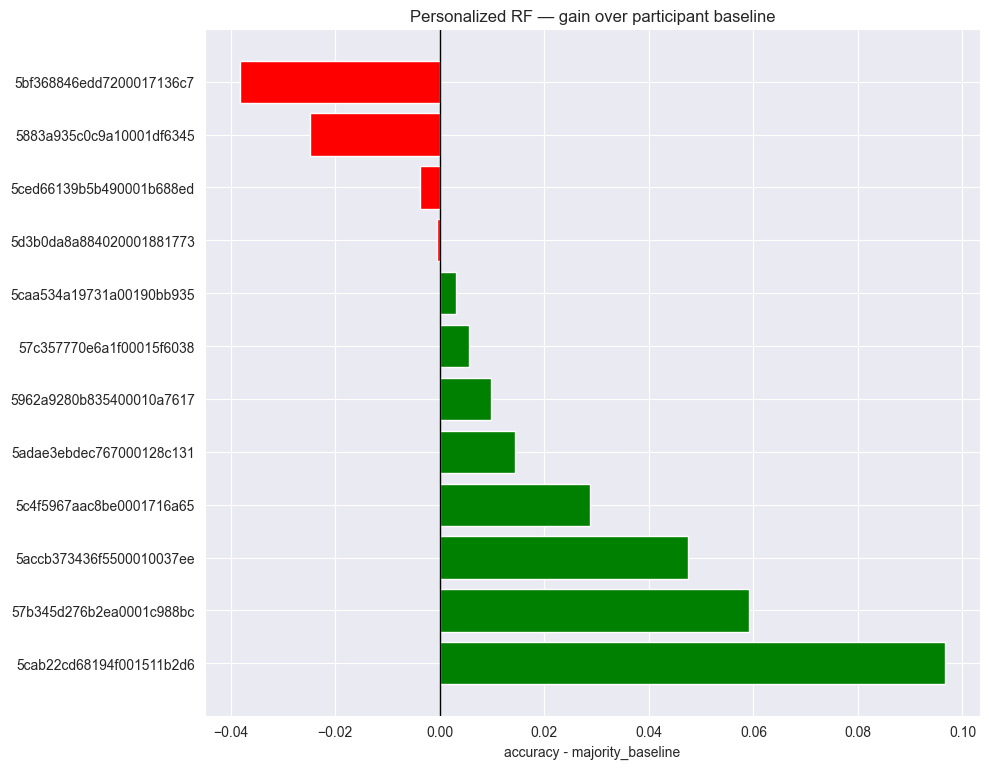


===== aggregate =====
participants evaluated: 12
mean gain over baseline: 0.0165
median gain over baseline: 0.0077
min gain: -0.0383
max gain: 0.0966


In [3]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# where your personalized RF training stored stuff
CM_ROOT    = "model_personalized/rf/fix_means/reports/cm"
METR_ROOT  = "model_personalized/rf/fix_means/reports/metrics"

rows = []

# 1) scan all cm csvs (one per participant)
cm_files = glob.glob(os.path.join(CM_ROOT, "*", "cm_*_RF.csv"))

for cm_path in cm_files:
    # participant id is the folder name
    pid = os.path.basename(os.path.dirname(cm_path))

    # ---- read CM to get distribution row
    cm_df = pd.read_csv(cm_path, index_col=0)

    if "__class_distribution__" not in cm_df.index:
        # old / corrupted file -> skip
        print(f"[eval] {pid}: no __class_distribution__ row, skipping")
        continue

    dist_row = cm_df.loc["__class_distribution__"]
    # we stored columns: none, confident_only, unconfident_only
    # majority baseline = pick the largest of them
    majority_baseline = float(dist_row.max())

    # ---- read metrics to get mean accuracy
    metr_path = os.path.join(METR_ROOT, pid, "metrics_per_fold.csv")
    if not os.path.exists(metr_path):
        print(f"[eval] {pid}: no metrics_per_fold.csv, skipping")
        continue

    metr_df = pd.read_csv(metr_path)
    if "accuracy" not in metr_df.columns or metr_df["accuracy"].empty:
        print(f"[eval] {pid}: metrics has no accuracy, skipping")
        continue

    mean_acc = float(metr_df["accuracy"].mean())

    delta = mean_acc - majority_baseline

    rows.append({
        "participant_id": pid,
        "mean_accuracy": mean_acc,
        "majority_baseline": majority_baseline,
        "better_than_baseline": delta,
        "n_folds": len(metr_df),
    })

# 2) make a DataFrame
eval_df = pd.DataFrame(rows)
if eval_df.empty:
    raise RuntimeError("No participants could be evaluated — check paths/files.")

# sort by improvement
eval_df = eval_df.sort_values("better_than_baseline", ascending=False).reset_index(drop=True)

# 3) show top 10 best models
top10 = eval_df.head(10)
print("\n===== TOP 10 personalized RF models (best over baseline) =====")
for _, r in top10.iterrows():
    print(
        f"p={r['participant_id']:>6} | acc={r['mean_accuracy']:.4f} | "
        f"baseline={r['majority_baseline']:.4f} | +{r['better_than_baseline']:.4f}"
    )

# 4) plot all deltas (how much better than majority baseline)
# if you have many participants this will be tall, but it shows the shape
plt.figure(figsize=(10, 0.4*len(eval_df) + 3))

# color: green if better, red if worse
colors = ["green" if d > 0 else "red" for d in eval_df["better_than_baseline"]]

plt.barh(
    y=eval_df["participant_id"],
    width=eval_df["better_than_baseline"],
    color=colors
)
plt.axvline(0.0, color="black", linewidth=1)
plt.xlabel("accuracy - majority_baseline")
plt.title("Personalized RF — gain over participant baseline")
plt.tight_layout()
plt.show()

# 5) (optional) quick aggregate stats
print("\n===== aggregate =====")
print(f"participants evaluated: {len(eval_df)}")
print(f"mean gain over baseline: {eval_df['better_than_baseline'].mean():.4f}")
print(f"median gain over baseline: {eval_df['better_than_baseline'].median():.4f}")
print(f"min gain: {eval_df['better_than_baseline'].min():.4f}")
print(f"max gain: {eval_df['better_than_baseline'].max():.4f}")


C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\2649020408.py:96: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\2649020408.py:96: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\2649020408.py:96: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\2649020408.py:96: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\dekassla\AppData\Local\Temp\ipykernel_17248\2649020408.py:96: FutureWarning: 

The `sca

[save] reports/compare\top5_RF_57b345d276b2ea0001c988bc.pdf


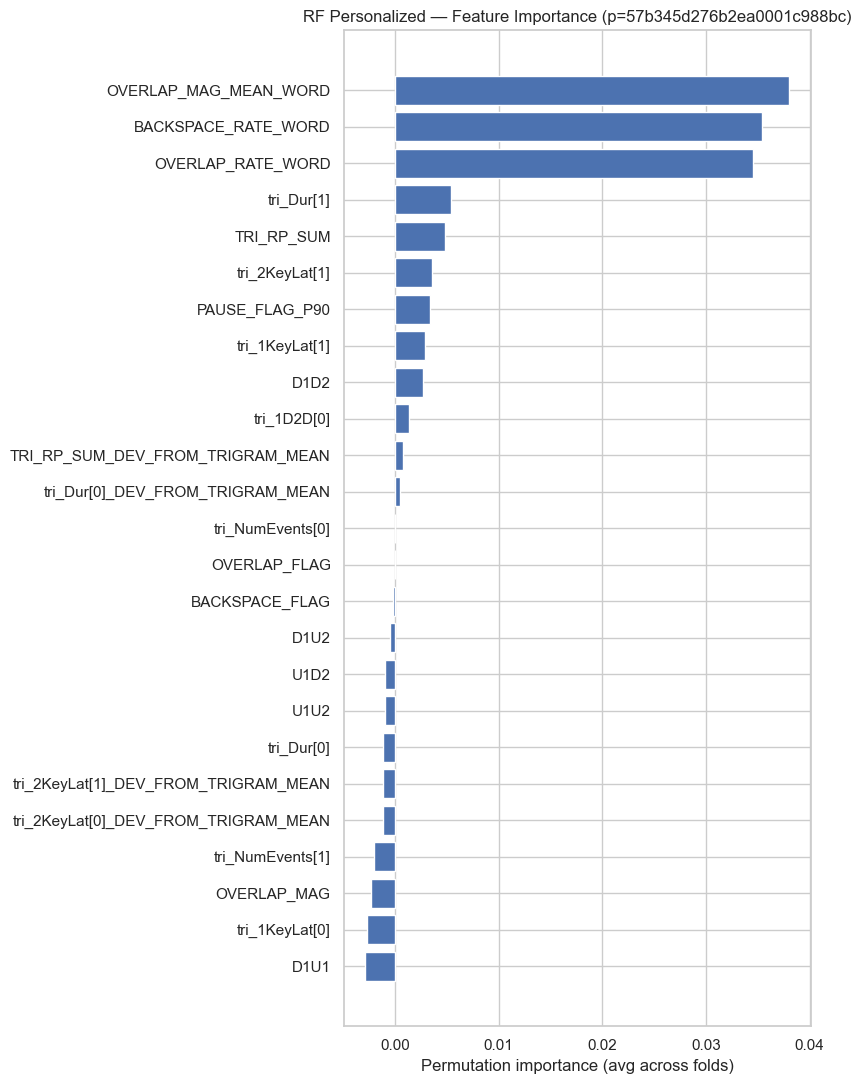

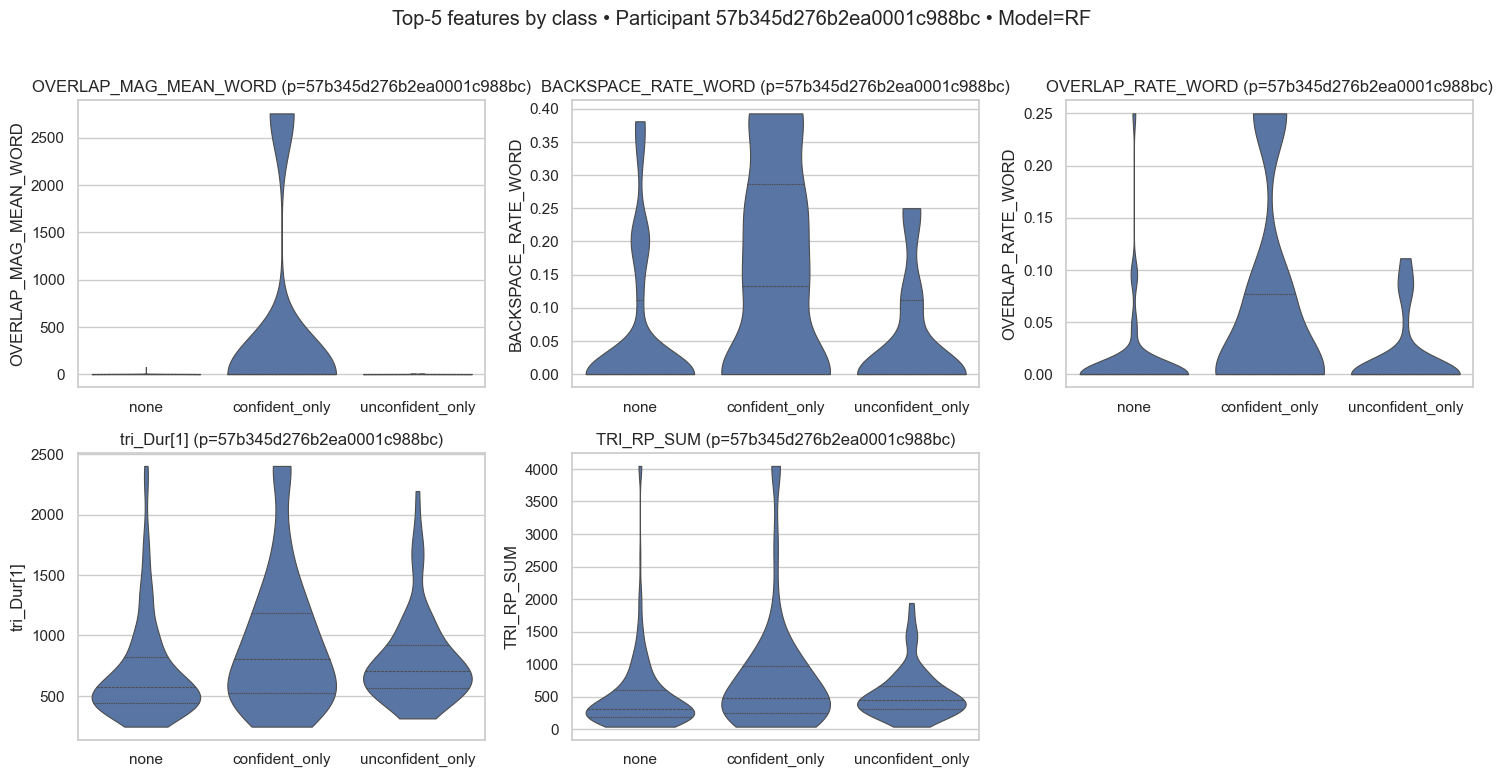

In [73]:
# ==== Compare top features across classes & participants ========================
# What it does:
# - Reads per-participant feature importance CSVs (RF or SVM) to pick top-K features
# - Loads participant data from data/personalized_raw
# - Builds 3-class target: none / confident_only / unconfident_only
# - Plots class-wise distributions (violin with quartiles) for:
#     (A) multiple features for a single participant, or
#     (B) one feature across multiple participants (side-by-side)
# - Optional: save plots to reports/compare

import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------- CONFIG -------------------------------------------------
PERSONALIZED_DIR = "data/personalized_raw"
FIP_ROOT_RF      = "reports/fip"     # per-participant folder with fip_{pid}_RF.csv
FIP_ROOT_SVM     = "reports/fip"     # per-participant folder with fip_{pid}_SVM.csv
SAVE_DIR         = "reports/compare"
MODEL_FOR_TOPK   = "RF"              # "RF" or "SVM" (where to read top features from)
TOP_K            = 5                 # how many top features to plot
CLIP_P           = (0.02, 0.98)      # clip for violins (2nd–98th percentile)
SAVE_PDFS        = True              # set False if you only want to show on screen
DPI              = 150               # for saved figures

os.makedirs(SAVE_DIR, exist_ok=True)

CLASS_NAMES  = ["none", "confident_only", "unconfident_only"]
CLASS_ORDER  = ["none", "confident_only", "unconfident_only"]

def build_target_3(df: pd.DataFrame) -> pd.DataFrame:
    conf = pd.to_numeric(df["CONFIDENT_MARKED_CHAR"], errors="coerce").fillna(0).astype(int)
    unco = pd.to_numeric(df["UNCONFIDENT_MARKED_CHAR"], errors="coerce").fillna(0).astype(int)
    cls = np.select(
        [(conf==1)&(unco==0), (conf==0)&(unco==1), (conf==1)&(unco==1)],
        ["confident_only","unconfident_only","both"],
        default="none"
    )
    out = df.copy()
    out["TARGET_3"] = cls
    # drop "both"
    out = out[out["TARGET_3"] != "both"]
    out["TARGET_3"] = pd.Categorical(out["TARGET_3"], categories=CLASS_ORDER, ordered=True)
    return out

def load_user_df(pid: str) -> pd.DataFrame:
    # concat all files for this participant from personalized_raw
    paths = sorted(glob.glob(os.path.join(PERSONALIZED_DIR, "*__personalized_raw.csv")))
    dfs = []
    for p in paths:
        try:
            df = pd.read_csv(p, low_memory=False)
            if "PARTICIPANT_ID" in df.columns:
                dfs.append(df[df["PARTICIPANT_ID"] == pid])
        except Exception as e:
            print(f"Skip {os.path.basename(p)}: {e}")
    if not dfs:
        raise FileNotFoundError(f"No rows found for participant {pid} in {PERSONALIZED_DIR}")
    user = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
    user["__SRC__"] = os.path.basename(paths[0])  # optional trace
    return build_target_3(user)

def read_topk_features(pid: str, model_kind: str = "RF", k: int = 5) -> list:
    # Reads fip_{pid}_{model}.csv from reports/fip/{pid}/
    model_tag = "RF" if model_kind.upper() == "RF" else "SVM"
    fip_dir   = os.path.join(FIP_ROOT_RF if model_tag=="RF" else FIP_ROOT_SVM, f"{pid}")
    csv_path  = os.path.join(fip_dir, f"fip_{pid}_{model_tag}.csv")
    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"Feature-importance CSV not found: {csv_path}")
    fi = pd.read_csv(csv_path)
    # infer correct importance column name
    imp_col = [c for c in fi.columns if "importance" in c.lower()]
    if not imp_col:
        raise ValueError(f"Could not find an importance column in {csv_path}")
    imp_col = imp_col[0]
    fi = fi.sort_values(imp_col, ascending=False)
    feats = fi["feature"].astype(str).head(k).tolist()
    return feats

def violin_per_class(ax, data: pd.DataFrame, feat: str, title: str = "", clip=CLIP_P):
    s = pd.to_numeric(data[feat], errors="coerce")
    ok = s.notna()
    if ok.sum() == 0:
        ax.set_visible(False)
        ax.set_title(f"{feat} (no data)")
        return
    s = s[ok]
    lo, hi = s.quantile(clip)
    s_clipped = s.clip(lower=lo, upper=hi)
    plot_df = pd.DataFrame({
        "TARGET_3": data.loc[s_clipped.index, "TARGET_3"],
        feat: s_clipped
    }).dropna(subset=[feat, "TARGET_3"])
    sns.violinplot(
        data=plot_df, x="TARGET_3", y=feat,
        order=CLASS_ORDER, inner="quartile", cut=0, scale="width", linewidth=0.8, ax=ax
    )
    ax.set_xlabel("")
    ax.set_ylabel(feat)
    ax.set_title(title or feat)

# ---------- (A) Multi-feature plot for a single participant ---------------------
def plot_topk_for_participant(pid: str, model_kind: str = MODEL_FOR_TOPK, k: int = TOP_K, save=SAVE_PDFS):
    feats = read_topk_features(pid, model_kind=model_kind, k=k)
    df    = load_user_df(pid)
    n = len(feats)
    cols = min(3, n)
    rows = int(np.ceil(n / cols))
    plt.rcParams.update(plt.rcParamsDefault)
    sns.set_theme(context="notebook", style="whitegrid")

    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.8*rows))
    axes = np.array(axes).reshape(-1) if isinstance(axes, np.ndarray) else np.array([axes])

    for i, feat in enumerate(feats):
        violin_per_class(axes[i], df, feat, title=f"{feat} (p={pid})")

    # hide unused axes
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    fig.suptitle(f"Top-{k} features by class • Participant {pid} • Model={model_kind.upper()}", y=1.02)
    fig.tight_layout()
    if save:
        out = os.path.join(SAVE_DIR, f"top{k}_{model_kind.upper()}_{pid}.pdf")
        fig.savefig(out, dpi=DPI, bbox_inches="tight")
        print(f"[save] {out}")
    plt.show()

# ---------- (B) One feature across multiple participants -----------------------
def plot_feature_across_participants(feature: str, pids: list[str], save=SAVE_PDFS):
    plt.rcParams.update(plt.rcParamsDefault)
    sns.set_theme(context="notebook", style="whitegrid")

    rows = 1
    cols = len(pids)
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4))
    if cols == 1:
        axes = [axes]

    for ax, pid in zip(axes, pids):
        df = load_user_df(pid)
        if feature not in df.columns:
            ax.set_visible(False)
            ax.set_title(f"{feature} (missing)")
            continue
        violin_per_class(ax, df, feature, title=f"{feature} (p={pid})")

    fig.suptitle(f"{feature} • class-wise distribution across participants", y=1.02)
    fig.tight_layout()
    if save:
        pid_tag = "_".join(str(p) for p in pids[:5])
        out = os.path.join(SAVE_DIR, f"compare_{feature}_{pid_tag}.pdf")
        fig.savefig(out, dpi=DPI, bbox_inches="tight")
        print(f"[save] {out}")
    plt.show()

# -------------------- Examples (uncomment & run) --------------------------------
# Example 1: show top-5 RF features for one participant
plot_topk_for_participant(pid="57b345d276b2ea0001c988bc", model_kind="RF", k=5)
#
# # Example 2: compare a single feature across several participants
# pids = ["57b345d276b2ea0001c988bc", "57c357770e6a1f00015f6038", "5883a935c0c9a10001df6345"]
# plot_feature_across_participants(feature="U1U2_MEAN_WORD", pids=pids)


### Personalized model SVM

In [4]:
# === Personalized SVM (fix_means, same layout as personalized RF) ===============
import os, glob, time
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

# ---------------------- config --------------------------------------------------
INPUT_DIR   = "data/fix_means"   # <- now we train on the fixed files

# new structure (parallel to RF one you just made)
MODEL_DIR        = "model_personalized/svm/fix_means/model"
REPORT_CM_ROOT   = "model_personalized/svm/fix_means/reports/cm"
REPORT_FIP_ROOT  = "model_personalized/svm/fix_means/reports/fip"
REPORT_METR_ROOT = "model_personalized/svm/fix_means/reports/metrics"

N_SPLITS    = 5
SEED        = 42
DROP_BOTH   = True
N_REPEATS   = 5
MIN_ROWS    = 10                 # match RF style (you can bump to 30 again if you want)
MODEL_NAME  = "SVM"
DROP_NEAR_CONSTANT = True        # to align with RF
NEAR_CONST_STD_THR = 1e-12

ALLOWED_FEATURES = [
    "D1U1","D1D2","U1U2","D1U2","U1D2",
    "OVERLAP_FLAG","PAUSE_FLAG_X2","PAUSE_FLAG_P90",
    "OVERLAP_MAG","OVERLAP_RATE_WORD","OVERLAP_MAG_MEAN_WORD",
    "BACKSPACE_FLAG","BACKSPACE_RATE_WORD",
    "TRI_RP_SUM","tri_1KeyLat[0]","tri_1KeyLat[1]",
    "tri_2KeyLat[0]","tri_2KeyLat[1]",
    "tri_1D2D[0]","tri_2D3D[0]",
    "tri_Dur[0]","tri_Dur[1]",
    "tri_NumEvents[0]","tri_NumEvents[1]",
    "TRI_RP_SUM_DEV_FROM_TRIGRAM_MEAN",
    "tri_2KeyLat[0]_DEV_FROM_TRIGRAM_MEAN",
    "tri_2KeyLat[1]_DEV_FROM_TRIGRAM_MEAN",
    "tri_Dur[0]_DEV_FROM_TRIGRAM_MEAN",
]

# make roots
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(REPORT_CM_ROOT, exist_ok=True)
os.makedirs(REPORT_FIP_ROOT, exist_ok=True)
os.makedirs(REPORT_METR_ROOT, exist_ok=True)

# ---------------------- helpers -------------------------------------------------
def _build_target(df: pd.DataFrame, drop_both: bool = True):
    """same target logic as RF: none / confident_only / unconfident_only (+drop both)"""
    out = df.copy().reset_index(drop=True)

    # make sure cols exist
    if "CONFIDENT_MARKED_CHAR" not in out.columns:
        out["CONFIDENT_MARKED_CHAR"] = np.nan
    if "UNCONFIDENT_MARKED_CHAR" not in out.columns:
        out["UNCONFIDENT_MARKED_CHAR"] = np.nan

    conf = pd.to_numeric(out["CONFIDENT_MARKED_CHAR"], errors="coerce").fillna(0).astype(int)
    unco = pd.to_numeric(out["UNCONFIDENT_MARKED_CHAR"], errors="coerce").fillna(0).astype(int)

    cls = np.select(
        [(conf==1)&(unco==0), (conf==0)&(unco==1), (conf==1)&(unco==1)],
        ["confident_only","unconfident_only","both"],
        default="none"
    )
    out["TARGET_3"] = cls

    if drop_both:
        before = len(out)
        out = out[out["TARGET_3"] != "both"]
        dropped = before - len(out)
        if dropped > 0:
            print(f"[target] dropped {dropped} 'both' rows")

    label_map = {"none":0, "confident_only":1, "unconfident_only":2}
    mapped = out["TARGET_3"].astype(str).str.lower().map(label_map)

    bad = mapped.isna()
    if bad.any():
        print(f"[target] dropping {bad.sum()} rows with unknown labels")
        out = out.loc[~bad].copy()
        mapped = mapped.loc[~bad]

    out["y"] = mapped.astype(int)

    # class distribution (for log + CM csv)
    counts = out["y"].value_counts().sort_index()
    total  = counts.sum()
    dist = {
        0: counts.get(0,0) / total if total else 0.0,
        1: counts.get(1,0) / total if total else 0.0,
        2: counts.get(2,0) / total if total else 0.0,
    }
    print(f"[target] class counts: {counts.to_dict()}")
    print(f"[target] class dist   : none={dist[0]:.4f}, confident_only={dist[1]:.4f}, unconfident_only={dist[2]:.4f}")
    return out, dist

# ---------------------- load data ----------------------------------------------
paths = sorted(glob.glob(os.path.join(INPUT_DIR, "*.csv")))
if not paths:
    raise FileNotFoundError(f"No CSVs in {INPUT_DIR}")

dfs = []
for p in paths:
    df = pd.read_csv(p, low_memory=False)
    df["__SRC__"] = os.path.basename(p)
    dfs.append(df)
full = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

if "PARTICIPANT_ID" not in full.columns:
    raise ValueError("PARTICIPANT_ID missing in fix_means — required for per-user SVM models.")

participants = sorted(full["PARTICIPANT_ID"].dropna().astype(str).unique().tolist())
print(f"[{MODEL_NAME}] Participants: {len(participants)} found. Using ONLY {len(ALLOWED_FEATURES)} allowed features.")

# ---------------------- per participant loop -----------------------------------
for idx, pid in enumerate(participants, start=1):
    user = full[full["PARTICIPANT_ID"].astype(str) == pid].copy().reset_index(drop=True)
    print(f"\n[{MODEL_NAME}][{idx}/{len(participants)}] p={pid} | rows={len(user):,}")

    user, base_dist = _build_target(user, drop_both=DROP_BOTH)

    # min rows & at least 2 classes
    if len(user) < MIN_ROWS:
        print(f"[{MODEL_NAME}][p={pid}] Skip — too few rows ({len(user)})")
        continue
    if user["y"].nunique() < 2:
        print(f"[{MODEL_NAME}][p={pid}] Skip — only one class present")
        continue

    # take only allowed features
    X_cols = [c for c in ALLOWED_FEATURES if c in user.columns]
    missing = [c for c in ALLOWED_FEATURES if c not in user.columns]
    if missing:
        print(f"[{MODEL_NAME}][p={pid}] missing {len(missing)} features (ignored): "
              f"{missing[:8]}{'...' if len(missing)>8 else ''}")
    if len(X_cols) < 3:
        print(f"[{MODEL_NAME}][p={pid}] Skip — not enough usable features ({len(X_cols)})")
        continue

    X = user[X_cols].apply(pd.to_numeric, errors="coerce")
    y = user["y"].values

    # drop near-constant just like RF
    if DROP_NEAR_CONSTANT:
        desc = X.describe().T
        to_drop = desc.index[(desc["std"].fillna(0).abs() < NEAR_CONST_STD_THR)].tolist()
        if to_drop:
            print(f"[{MODEL_NAME}][p={pid}] dropping near-constant features: {to_drop}")
            X_cols = [c for c in X_cols if c not in to_drop]
            X = X[X_cols]
            if len(X_cols) < 3:
                print(f"[{MODEL_NAME}][p={pid}] Skip — not enough features after drop")
                continue

    # participant-specific report dirs
    cm_dir   = os.path.join(REPORT_CM_ROOT,  pid)
    fip_dir  = os.path.join(REPORT_FIP_ROOT, pid)
    metr_dir = os.path.join(REPORT_METR_ROOT, pid)
    os.makedirs(cm_dir,  exist_ok=True)
    os.makedirs(fip_dir, exist_ok=True)
    os.makedirs(metr_dir, exist_ok=True)

    print(f"[{MODEL_NAME}][p={pid}] Using {len(X_cols)} features")
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)

    cm_sum = np.zeros((3,3), dtype=float)
    perm_accum = np.zeros(len(X_cols), dtype=float)
    metrics = []
    t0 = time.time()

    for k, (tr_idx, va_idx) in enumerate(kf.split(X, y)):
        print(f"[{MODEL_NAME}][p={pid}]  • fold {k} train={len(tr_idx)}, val={len(va_idx)}")
        Xtr, Xva = X.iloc[tr_idx].copy(), X.iloc[va_idx].copy()
        ytr, yva = y[tr_idx], y[va_idx]

        # impute
        imp = SimpleImputer(strategy="median")
        Xtr_imp = pd.DataFrame(imp.fit_transform(Xtr), columns=X_cols, index=Xtr.index)
        Xva_imp = pd.DataFrame(imp.transform(Xva), columns=X_cols, index=Xva.index)

        # scale
        scaler = StandardScaler(with_mean=True, with_std=True)
        Xtr_sc = pd.DataFrame(scaler.fit_transform(Xtr_imp), columns=X_cols, index=Xtr_imp.index)
        Xva_sc = pd.DataFrame(scaler.transform(Xva_imp), columns=X_cols, index=Xva_imp.index)

        # model
        clf = LinearSVC(C=1.0, class_weight="balanced", max_iter=5000, random_state=SEED)
        clf.fit(Xtr_sc, ytr)

        # save all fold artifacts in shared model dir (like RF)
        joblib.dump(clf,    os.path.join(MODEL_DIR, f"p_{pid}_svm_fold{k}.joblib"))
        joblib.dump(imp,    os.path.join(MODEL_DIR, f"p_{pid}_imputer_fold{k}.joblib"))
        joblib.dump(scaler, os.path.join(MODEL_DIR, f"p_{pid}_scaler_fold{k}.joblib"))

        # evaluate
        yhat = clf.predict(Xva_sc)
        acc  = accuracy_score(yva, yhat)
        cm   = confusion_matrix(yva, yhat, labels=[0,1,2])
        cm_sum += cm
        metrics.append({"fold": k, "accuracy": acc})
        print(f"[{MODEL_NAME}][p={pid}]    → fold {k} acc={acc:.4f}")

        # permutation importance
        pi = permutation_importance(
            clf, Xva_sc, yva,
            n_repeats=N_REPEATS, random_state=SEED, n_jobs=-1, scoring="f1_macro"
        )
        perm_accum += pi.importances_mean

    elapsed = time.time() - t0
    acc_mean = float(np.mean([m["accuracy"] for m in metrics])) if metrics else float("nan")
    print(f"[{MODEL_NAME}][p={pid}] done in {elapsed:.1f}s — mean acc={acc_mean:.4f}")
    print(f"[{MODEL_NAME}][p={pid}] class dist (input): "
          f"none={base_dist[0]:.4f}, conf={base_dist[1]:.4f}, unconf={base_dist[2]:.4f}")

    # ---------- aggregate ----------
    cm_avg = cm_sum / max(len(metrics), 1)

    # CM CSV (with dist row)
    cm_csv = os.path.join(cm_dir, f"cm_{pid}_SVM.csv")
    cm_df = pd.DataFrame(
        cm_avg,
        index=["none","confident_only","unconfident_only"],
        columns=["none","confident_only","unconfident_only"]
    )
    dist_row = pd.DataFrame(
        {
            "none": [base_dist[0]],
            "confident_only": [base_dist[1]],
            "unconfident_only": [base_dist[2]],
        },
        index=["__class_distribution__"]
    )
    cm_out = pd.concat([cm_df, dist_row], axis=0)
    cm_out.to_csv(cm_csv, index=True)

    # FIP CSV
    fip_csv = os.path.join(fip_dir, f"fip_{pid}_SVM.csv")
    fi_perm = pd.DataFrame({
        "feature": X_cols,
        "perm_importance_mean": perm_accum / max(len(metrics),1),
    }).sort_values("perm_importance_mean", ascending=False)
    fi_perm.to_csv(fip_csv, index=False)

    # PDFs
    # 1) feature importance
    fip_pdf = os.path.join(fip_dir, f"fip_{pid}_SVM.pdf")
    top = fi_perm.head(25)
    plt.figure(figsize=(8.5, 11))
    plt.barh(top["feature"][::-1], top["perm_importance_mean"][::-1])
    plt.title(f"SVM Personalized — Feature Importance (p={pid})")
    plt.xlabel("Permutation importance")
    plt.tight_layout()
    plt.savefig(fip_pdf)
    plt.close()

    # 2) confusion matrix
    cm_pdf = os.path.join(cm_dir, f"cm_{pid}_SVM.pdf")
    plt.figure(figsize=(6,6))
    im = plt.imshow(cm_avg, interpolation="nearest")
    title = (f"SVM Personalized — CM (p={pid})\n"
             f"acc={acc_mean:.3f} | dist: none={base_dist[0]:.2f}, "
             f"conf={base_dist[1]:.2f}, unconf={base_dist[2]:.2f}")
    plt.title(title)
    plt.xticks([0,1,2], ["none","confident_only","unconfident_only"])
    plt.yticks([0,1,2], ["none","confident_only","unconfident_only"])
    for i in range(3):
        for j in range(3):
            plt.text(j, i, f"{cm_avg[i,j]:.1f}", ha="center", va="center")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.savefig(cm_pdf)
    plt.close()

    # per-participant metrics
    pd.DataFrame(metrics).to_csv(os.path.join(metr_dir, "metrics_per_fold.csv"), index=False)


[SVM] Participants: 106 found. Using ONLY 28 allowed features.

[SVM][1/106] p=57b345d276b2ea0001c988bc | rows=626
[target] dropped 1 'both' rows
[target] class counts: {0: 401, 1: 155, 2: 69}
[target] class dist   : none=0.6416, confident_only=0.2480, unconfident_only=0.1104
[SVM][p=57b345d276b2ea0001c988bc] Using 28 features
[SVM][p=57b345d276b2ea0001c988bc]  • fold 0 train=500, val=125
[SVM][p=57b345d276b2ea0001c988bc]    → fold 0 acc=0.6320
[SVM][p=57b345d276b2ea0001c988bc]  • fold 1 train=500, val=125
[SVM][p=57b345d276b2ea0001c988bc]    → fold 1 acc=0.6800
[SVM][p=57b345d276b2ea0001c988bc]  • fold 2 train=500, val=125
[SVM][p=57b345d276b2ea0001c988bc]    → fold 2 acc=0.6720
[SVM][p=57b345d276b2ea0001c988bc]  • fold 3 train=500, val=125
[SVM][p=57b345d276b2ea0001c988bc]    → fold 3 acc=0.6480
[SVM][p=57b345d276b2ea0001c988bc]  • fold 4 train=500, val=125
[SVM][p=57b345d276b2ea0001c988bc]    → fold 4 acc=0.6640
[SVM][p=57b345d276b2ea0001c988bc] done in 23.5s — mean acc=0.6592
[SVM]

### evaluate svm personalized scores


===== TOP 10 personalized SVM models (gain over participant baseline) =====
p=664c8dd7baa052f7b1e88417 | acc=0.5216 | baseline=0.3790 | +0.1426
p=668a9841d4178ffe1aaaa225 | acc=0.6142 | baseline=0.5031 | +0.1111
p=6150ca3f37e1fe330f70311d | acc=0.4879 | baseline=0.3935 | +0.0944
p=67709b0a96dcc9c2a7b0a06e | acc=0.5372 | baseline=0.4472 | +0.0900
p=65f03cac071873738667ccbb | acc=0.5572 | baseline=0.4902 | +0.0670
p=663378460f834e9670d1508c | acc=0.5140 | baseline=0.4500 | +0.0640
p=6635344fb4ae723326e3ce04 | acc=0.5514 | baseline=0.4880 | +0.0634
p=5da5fdef9a9dc5001484350b | acc=0.5851 | baseline=0.5322 | +0.0529
p=5fbfe145e52a44000a9c2966 | acc=0.4567 | baseline=0.4093 | +0.0474
p=65a3ec77f674ac3e98f0c6ac | acc=0.5207 | baseline=0.4757 | +0.0450


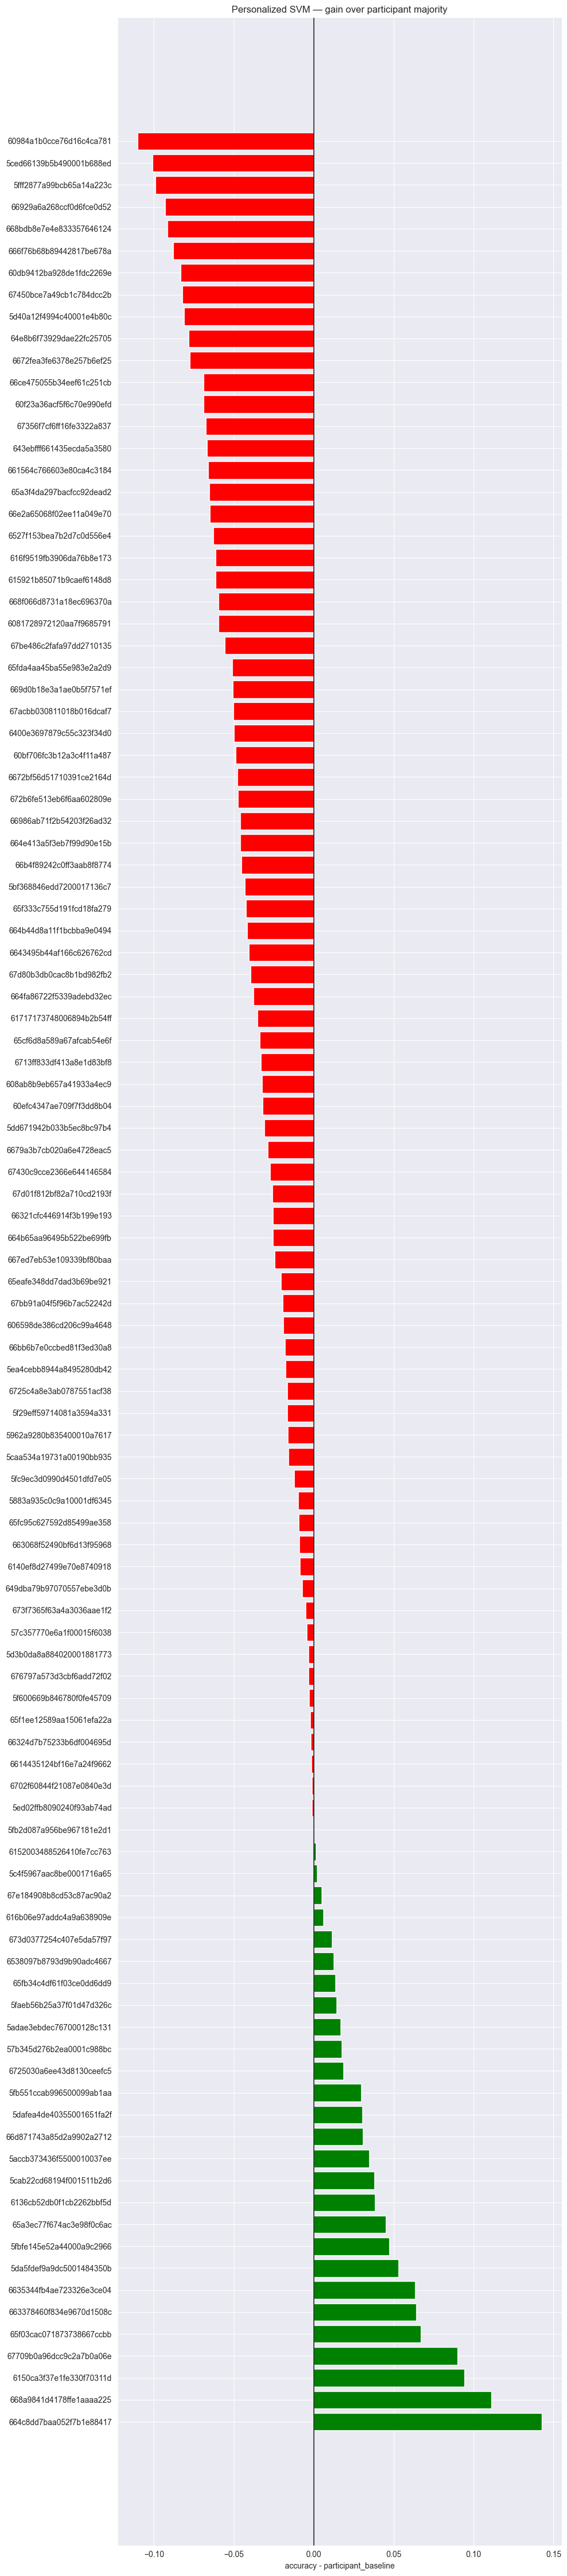


===== aggregate (SVM) =====
participants evaluated: 105
mean gain over baseline: -0.0194
median gain over baseline: -0.0204
min gain: -0.1102
max gain: 0.1426


In [5]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# paths that your SVM training code used
SVM_CM_ROOT    = "model_personalized/svm/fix_means/reports/cm"
SVM_METR_ROOT  = "model_personalized/svm/fix_means/reports/metrics"

rows = []

# 1) find all participants that have a CM
cm_files = glob.glob(os.path.join(SVM_CM_ROOT, "*", "cm_*_SVM.csv"))

for cm_path in cm_files:
    pid = os.path.basename(os.path.dirname(cm_path))  # folder name is participant id

    # --- read CM and get distribution row
    cm_df = pd.read_csv(cm_path, index_col=0)
    if "__class_distribution__" not in cm_df.index:
        print(f"[SVM-EVAL] {pid}: no __class_distribution__ in CM, skip")
        continue

    dist_row = cm_df.loc["__class_distribution__"]
    # columns should be: none, confident_only, unconfident_only
    majority_baseline = float(dist_row.max())

    # --- read metrics (to get mean acc)
    metr_path = os.path.join(SVM_METR_ROOT, pid, "metrics_per_fold.csv")
    if not os.path.exists(metr_path):
        print(f"[SVM-EVAL] {pid}: metrics_per_fold.csv missing, skip")
        continue

    metr_df = pd.read_csv(metr_path)
    if "accuracy" not in metr_df.columns or metr_df["accuracy"].empty:
        print(f"[SVM-EVAL] {pid}: no accuracy column, skip")
        continue

    mean_acc = float(metr_df["accuracy"].mean())
    delta = mean_acc - majority_baseline

    rows.append({
        "participant_id": pid,
        "mean_accuracy": mean_acc,
        "majority_baseline": majority_baseline,
        "better_than_baseline": delta,
        "n_folds": len(metr_df),
    })

# 2) collect
svm_eval_df = pd.DataFrame(rows)
if svm_eval_df.empty:
    raise RuntimeError("SVM evaluation: no participants found / no valid CM+metrics pairs.")

# sort by improvement
svm_eval_df = svm_eval_df.sort_values("better_than_baseline", ascending=False).reset_index(drop=True)

# 3) print top 10
print("\n===== TOP 10 personalized SVM models (gain over participant baseline) =====")
for _, r in svm_eval_df.head(10).iterrows():
    print(
        f"p={r['participant_id']:>6} | acc={r['mean_accuracy']:.4f} | "
        f"baseline={r['majority_baseline']:.4f} | +{r['better_than_baseline']:.4f}"
    )

# 4) plot all deltas
plt.figure(figsize=(10, 0.4*len(svm_eval_df) + 3))
colors = ["green" if d > 0 else "red" for d in svm_eval_df["better_than_baseline"]]
plt.barh(
    y=svm_eval_df["participant_id"],
    width=svm_eval_df["better_than_baseline"],
    color=colors,
)
plt.axvline(0.0, color="black", linewidth=1)
plt.xlabel("accuracy - participant_baseline")
plt.title("Personalized SVM — gain over participant majority")
plt.tight_layout()
plt.show()

# 5) summary
print("\n===== aggregate (SVM) =====")
print(f"participants evaluated: {len(svm_eval_df)}")
print(f"mean gain over baseline: {svm_eval_df['better_than_baseline'].mean():.4f}")
print(f"median gain over baseline: {svm_eval_df['better_than_baseline'].median():.4f}")
print(f"min gain: {svm_eval_df['better_than_baseline'].min():.4f}")
print(f"max gain: {svm_eval_df['better_than_baseline'].max():.4f}")


### GENERALIZED CLASSIFIER: build classifier 2 Random Forest and 2 SVM on raw and normalized data

### RF and SVM generalized

In [6]:
# === Random Forest (generalized, fix_means, keystroke-only) ====================
import os, glob, time
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

# ---------------------------------------------------------------------
# config
# ---------------------------------------------------------------------
INPUT_DIR   = "data/fix_means"

MODEL_DIR   = "model_generalized/rf/model"        # <- trained folds go here
REPORT_CM   = "model_generalized/rf/reports/cm"   # <- CSV + PDF confusion matrix
REPORT_FIP  = "model_generalized/rf/reports/fip"  # <- CSV + PDF feature importance
REPORT_MISC = "model_generalized/rf/reports"      # <- extra CSVs (metrics, class dist)

N_SPLITS   = 5
SEED       = 42
DROP_BOTH  = True
N_REPEATS  = 5

ALLOWED_FEATURES = [
    "D1U1","D1D2","U1U2","D1U2","U1D2",
    "OVERLAP_FLAG","PAUSE_FLAG_X2","PAUSE_FLAG_P90",
    "OVERLAP_MAG","OVERLAP_RATE_WORD","OVERLAP_MAG_MEAN_WORD",
    "BACKSPACE_FLAG","BACKSPACE_RATE_WORD",
    "TRI_RP_SUM","tri_1KeyLat[0]","tri_1KeyLat[1]",
    "tri_2KeyLat[0]","tri_2KeyLat[1]",
    "tri_1D2D[0]","tri_2D3D[0]",
    "tri_Dur[0]","tri_Dur[1]",
    "tri_NumEvents[0]","tri_NumEvents[1]",
    "TRI_RP_SUM_DEV_FROM_TRIGRAM_MEAN",
    "tri_2KeyLat[0]_DEV_FROM_TRIGRAM_MEAN",
    "tri_2KeyLat[1]_DEV_FROM_TRIGRAM_MEAN",
    "tri_Dur[0]_DEV_FROM_TRIGRAM_MEAN",
]

# make dirs
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(REPORT_CM, exist_ok=True)
os.makedirs(REPORT_FIP, exist_ok=True)
os.makedirs(REPORT_MISC, exist_ok=True)

# ---------------------------------------------------------------------
# 1) load data
# ---------------------------------------------------------------------
print("[RF-GEN] loading from data/fix_means …")
paths = sorted(glob.glob(os.path.join(INPUT_DIR, "*.csv")))
if not paths:
    raise FileNotFoundError(f"No CSVs found in {INPUT_DIR}")

dfs = []
for p in paths:
    df = pd.read_csv(p, low_memory=False)
    df["__SRC__"] = os.path.basename(p)
    dfs.append(df)
full = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
print(f"[RF-GEN] loaded {len(paths)} files, rows={len(full):,}")

# ---------------------------------------------------------------------
# 2) target: 3-way (None / Confident / Unconfident), drop Both
# ---------------------------------------------------------------------
conf = pd.to_numeric(full.get("CONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
unco = pd.to_numeric(full.get("UNCONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)

full["CLASS_4WAY"] = np.select(
    [
        (conf==1) & (unco==0),
        (conf==0) & (unco==1),
        (conf==1) & (unco==1),
    ],
    ["Confident", "Unconfident", "Both"],
    default="None"
)

if DROP_BOTH:
    before = len(full)
    full = full[full["CLASS_4WAY"] != "Both"].copy()
    drop_n = before - len(full)
    if drop_n:
        print(f"[RF-GEN] dropped {drop_n} rows labelled 'Both'")

full["TARGET_3"] = full["CLASS_4WAY"].replace({"Both": "None"})
label_map = {"None": 0, "Confident": 1, "Unconfident": 2}
full["y"] = full["TARGET_3"].map(label_map).astype(int)

# class distribution
cls_counts = full["y"].value_counts(normalize=True).reindex([0,1,2]).fillna(0)
print("[RF-GEN] overall class distribution:")
print(f"          None        : {cls_counts[0]:.3f}")
print(f"          Confident   : {cls_counts[1]:.3f}")
print(f"          Unconfident : {cls_counts[2]:.3f}")

# ---------------------------------------------------------------------
# 3) features: ONLY allowed ones
# ---------------------------------------------------------------------
X_cols = [c for c in ALLOWED_FEATURES if c in full.columns]
if not X_cols:
    raise ValueError("None of the ALLOWED_FEATURES are present in data/fix_means")
X = full[X_cols].apply(pd.to_numeric, errors="coerce")
y = full["y"].values

groups = full["PARTICIPANT_ID"].astype(str).values if "PARTICIPANT_ID" in full.columns else None

print(f"[RF-GEN] using {len(X_cols)} features")

# ---------------------------------------------------------------------
# 4) CV spliterator
# ---------------------------------------------------------------------
if groups is not None and len(np.unique(groups)) > 1:
    splitter = GroupKFold(n_splits=N_SPLITS).split(X, y, groups)
    print("[RF-GEN] using GroupKFold by PARTICIPANT_ID")
else:
    splitter = KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED).split(X, y)
    print("[RF-GEN] using plain KFold")

# ---------------------------------------------------------------------
# 5) train across folds
# ---------------------------------------------------------------------
labels_order = [0,1,2]
cm_sum   = np.zeros((3,3), dtype=float)
perm_sum = np.zeros(len(X_cols), dtype=float)
rf_sum   = np.zeros(len(X_cols), dtype=float)
metrics  = []

t0 = time.time()
for k, (tr_idx, va_idx) in enumerate(splitter):
    print(f"[RF-GEN] fold {k}  train={len(tr_idx):,}  val={len(va_idx):,}")
    Xtr, Xva = X.iloc[tr_idx].copy(), X.iloc[va_idx].copy()
    ytr, yva = y[tr_idx], y[va_idx]

    # impute
    imp = SimpleImputer(strategy="median")
    Xtr_imp = pd.DataFrame(imp.fit_transform(Xtr), columns=X_cols, index=Xtr.index)
    Xva_imp = pd.DataFrame(imp.transform(Xva), columns=X_cols, index=Xva.index)

    # model
    clf = RandomForestClassifier(
        n_estimators=400,
        n_jobs=-1,
        random_state=SEED,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
    )
    clf.fit(Xtr_imp, ytr)

    # save fold model + imputer
    joblib.dump(clf, os.path.join(MODEL_DIR, f"rf_fold{k}.joblib"))
    joblib.dump(imp, os.path.join(MODEL_DIR, f"imputer_fold{k}.joblib"))

    # eval
    yhat = clf.predict(Xva_imp)
    acc  = accuracy_score(yva, yhat)
    cm   = confusion_matrix(yva, yhat, labels=labels_order)
    cm_sum += cm
    metrics.append({"fold": k, "accuracy": acc})
    print(f"[RF-GEN]   fold {k} acc={acc:.4f}")

    # importances
    pi = permutation_importance(
        clf, Xva_imp, yva,
        n_repeats=N_REPEATS, random_state=SEED, n_jobs=-1, scoring="f1_macro"
    )
    perm_sum += pi.importances_mean
    rf_sum   += clf.feature_importances_

elapsed = time.time() - t0
mean_acc = float(np.mean([m["accuracy"] for m in metrics]))
print(f"[RF-GEN] done in {elapsed:.1f}s — mean acc={mean_acc:.4f}")

# ---------------------------------------------------------------------
# 6) aggregate + save
# ---------------------------------------------------------------------
cm_avg = cm_sum / max(len(metrics), 1)

# --- confusion matrix CSV/PDF ---
cm_df = pd.DataFrame(
    cm_avg,
    index=["None","Confident","Unconfident"],
    columns=["None","Confident","Unconfident"]
)
cm_csv_path = os.path.join(REPORT_CM, "confusion_matrix_rf_generalized.csv")
cm_df.to_csv(cm_csv_path, index=True)

plt.figure(figsize=(6,6))
im = plt.imshow(cm_avg, interpolation="nearest")
plt.title(f"RF generalized — Confusion Matrix (acc={mean_acc:.3f})")
plt.xticks([0,1,2], ["None","Confident","Unconfident"])
plt.yticks([0,1,2], ["None","Confident","Unconfident"])
for i in range(3):
    for j in range(3):
        plt.text(j, i, f"{cm_avg[i,j]:.1f}", ha="center", va="center")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
cm_pdf_path = os.path.join(REPORT_CM, "confusion_matrix_rf_generalized.pdf")
plt.savefig(cm_pdf_path)
plt.close()

# --- feature importance CSV/PDF ---
fi_df = pd.DataFrame({
    "feature": X_cols,
    "perm_importance_mean": perm_sum / max(len(metrics), 1),
    "rf_impurity_importance_mean": rf_sum / max(len(metrics), 1),
}).sort_values("perm_importance_mean", ascending=False)

fi_csv_path = os.path.join(REPORT_FIP, "feature_importance_rf_generalized.csv")
fi_df.to_csv(fi_csv_path, index=False)

top = fi_df.head(25)
plt.figure(figsize=(8.5, 11))
plt.barh(top["feature"][::-1], top["perm_importance_mean"][::-1])
plt.title("RF generalized (fix_means) — Permutation Feature Importance (Top 25)")
plt.xlabel("importance (avg across folds)")
plt.tight_layout()
fi_pdf_path = os.path.join(REPORT_FIP, "feature_importance_rf_generalized.pdf")
plt.savefig(fi_pdf_path)
plt.close()

# --- misc CSVs ---
pd.DataFrame(metrics).to_csv(os.path.join(REPORT_MISC, "metrics_per_fold.csv"), index=False)
cls_counts.to_frame(name="proportion").to_csv(
    os.path.join(REPORT_MISC, "class_distribution_rf_generalized.csv")
)

print("[RF-GEN] saved:")
print("  models  ->", MODEL_DIR)
print("  CM csv  ->", cm_csv_path)
print("  CM pdf  ->", cm_pdf_path)
print("  FIP csv ->", fi_csv_path)
print("  FIP pdf ->", fi_pdf_path)


[RF-GEN] loading from data/fix_means …
[RF-GEN] loaded 848 files, rows=167,853
[RF-GEN] dropped 1249 rows labelled 'Both'
[RF-GEN] overall class distribution:
          None          : 0.319
          Confident     : 0.457
          Unconfident   : 0.224
[RF-GEN] using 28 features
[RF-GEN] using GroupKFold by PARTICIPANT_ID
[RF-GEN] fold 0  train=133,414  val=33,190
[RF-GEN]   fold 0 acc=0.4368


KeyboardInterrupt: 

In [90]:
# === SVM (generalized, fix_means, keystroke-only) ==============================
import os, glob, time
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold, KFold
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

# ---------------------------------------------------------------------
# config
# ---------------------------------------------------------------------
INPUT_DIR  = "data/fix_means"
MODEL_DIR  = "model_generalized/svm"                 # <- models here
REPORT_FIP = "model_generalized/reports/svm/fip"     # <- fip csv/pdf here
REPORT_CM  = "model_generalized/reports/svm/cm"      # <- cm  csv/pdf here

N_SPLITS   = 5
SEED       = 42
DROP_BOTH  = True
N_REPEATS  = 5

ALLOWED_FEATURES = [
    "D1U1","D1D2","U1U2","D1U2","U1D2",
    "OVERLAP_FLAG","PAUSE_FLAG_X2","PAUSE_FLAG_P90",
    "OVERLAP_MAG","OVERLAP_RATE_WORD","OVERLAP_MAG_MEAN_WORD",
    "BACKSPACE_FLAG","BACKSPACE_RATE_WORD",
    "TRI_RP_SUM","tri_1KeyLat[0]","tri_1KeyLat[1]",
    "tri_2KeyLat[0]","tri_2KeyLat[1]",
    "tri_1D2D[0]","tri_2D3D[0]",
    "tri_Dur[0]","tri_Dur[1]",
    "tri_NumEvents[0]","tri_NumEvents[1]",
    "TRI_RP_SUM_DEV_FROM_TRIGRAM_MEAN",
    "tri_2KeyLat[0]_DEV_FROM_TRIGRAM_MEAN",
    "tri_2KeyLat[1]_DEV_FROM_TRIGRAM_MEAN",
    "tri_Dur[0]_DEV_FROM_TRIGRAM_MEAN",
]

os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(REPORT_FIP, exist_ok=True)
os.makedirs(REPORT_CM,  exist_ok=True)

# ---------------------------------------------------------------------
# 1) load
# ---------------------------------------------------------------------
print("[SVM-GEN] loading from data/fix_means …")
paths = sorted(glob.glob(os.path.join(INPUT_DIR, "*.csv")))
if not paths:
    raise FileNotFoundError(f"No CSVs in {INPUT_DIR}")

dfs = []
for p in paths:
    df = pd.read_csv(p, low_memory=False)
    df["__SRC__"] = os.path.basename(p)
    dfs.append(df)
full = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
print(f"[SVM-GEN] rows={len(full):,}")

# ---------------------------------------------------------------------
# 2) target 3-way
# ---------------------------------------------------------------------
conf = pd.to_numeric(full.get("CONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
unco = pd.to_numeric(full.get("UNCONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)

full["CLASS_4WAY"] = np.select(
    [
        (conf==1) & (unco==0),
        (conf==0) & (unco==1),
        (conf==1) & (unco==1),
    ],
    ["Confident", "Unconfident", "Both"],
    default="None"
)
if DROP_BOTH:
    before = len(full)
    full = full[full["CLASS_4WAY"] != "Both"].copy()
    dropped = before - len(full)
    if dropped:
        print(f"[SVM-GEN] dropped {dropped} 'Both' rows")

full["TARGET_3WAY"] = full["CLASS_4WAY"].replace({"Both": "None"})
label_map = {"None":0, "Confident":1, "Unconfident":2}
full["y"] = full["TARGET_3WAY"].map(label_map).astype(int)

# log class distribution
cls_dist = full["y"].value_counts(normalize=True).reindex([0,1,2]).fillna(0)
print("[SVM-GEN] overall class distribution:")
print(f"  None         : {cls_dist[0]:.3f}")
print(f"  Confident    : {cls_dist[1]:.3f}")
print(f"  Unconfident  : {cls_dist[2]:.3f}")

# ---------------------------------------------------------------------
# 3) features — only allowed
# ---------------------------------------------------------------------
X_cols = [c for c in ALLOWED_FEATURES if c in full.columns]
if not X_cols:
    raise ValueError("No allowed features found in data/fix_means for SVM generalized")

X = full[X_cols].apply(pd.to_numeric, errors="coerce")
y = full["y"].values
groups = full["PARTICIPANT_ID"].astype(str).values if "PARTICIPANT_ID" in full.columns else None

print(f"[SVM-GEN] using {len(X_cols)} features")

# ---------------------------------------------------------------------
# 4) CV
# ---------------------------------------------------------------------
if groups is not None and len(np.unique(groups)) > 1:
    splitter = GroupKFold(n_splits=N_SPLITS).split(X, y, groups)
    print("[SVM-GEN] GroupKFold (by PARTICIPANT_ID)")
else:
    splitter = KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED).split(X, y)
    print("[SVM-GEN] plain KFold")

labels_order = [0,1,2]
cm_sum  = np.zeros((3,3), dtype=float)
perm_acc = np.zeros(len(X_cols), dtype=float)
metrics = []
t0 = time.time()

# ---------------------------------------------------------------------
# 5) train / eval
# ---------------------------------------------------------------------
for k, (tr_idx, va_idx) in enumerate(splitter):
    print(f"[SVM-GEN] fold {k} train={len(tr_idx)}, val={len(va_idx)}")
    Xtr, Xva = X.iloc[tr_idx].copy(), X.iloc[va_idx].copy()
    ytr, yva = y[tr_idx], y[va_idx]

    # impute
    imp = SimpleImputer(strategy="median")
    Xtr_imp = pd.DataFrame(imp.fit_transform(Xtr), columns=X_cols, index=Xtr.index)
    Xva_imp = pd.DataFrame(imp.transform(Xva), columns=X_cols, index=Xva.index)

    # model
    clf = LinearSVC(
        C=1.0,
        class_weight="balanced",
        max_iter=5000,
        random_state=SEED,
    )
    clf.fit(Xtr_imp, ytr)

    # save per fold
    joblib.dump(clf, os.path.join(MODEL_DIR, f"svm_fix_means_fold{k}.joblib"))
    joblib.dump(imp, os.path.join(MODEL_DIR, f"imputer_fold{k}.joblib"))

    # validate
    yhat = clf.predict(Xva_imp)
    acc  = accuracy_score(yva, yhat)
    cm   = confusion_matrix(yva, yhat, labels=labels_order)
    cm_sum += cm
    metrics.append({"fold": k, "accuracy": acc})
    print(f"[SVM-GEN]   acc={acc:.4f}")

    # permutation importance
    pi = permutation_importance(
        clf, Xva_imp, yva,
        n_repeats=N_REPEATS,
        random_state=SEED,
        n_jobs=-1,
        scoring="f1_macro"
    )
    perm_acc += pi.importances_mean

elapsed = time.time() - t0
acc_mean = float(np.mean([m["accuracy"] for m in metrics])) if metrics else float("nan")
print(f"[SVM-GEN] done in {elapsed:.1f}s — mean acc={acc_mean:.4f}")

# ---------------------------------------------------------------------
# 6) aggregate + save reports
# ---------------------------------------------------------------------
cm_avg = cm_sum / max(len(metrics), 1)

# confusion matrix CSV
cm_df = pd.DataFrame(
    cm_avg,
    index=["None","Confident","Unconfident"],
    columns=["None","Confident","Unconfident"]
)
cm_csv_path = os.path.join(REPORT_CM, "confusion_matrix_svm_generalized.csv")
cm_df.to_csv(cm_csv_path, index=True)

# feature importance CSV
fi_df = pd.DataFrame({
    "feature": X_cols,
    "permutation_importance_mean": perm_acc / max(len(metrics), 1),
}).sort_values("permutation_importance_mean", ascending=False)
fi_csv_path = os.path.join(REPORT_FIP, "feature_importance_svm_generalized.csv")
fi_df.to_csv(fi_csv_path, index=False)

# metrics CSV (put into cm folder or make a small root; I'll stick it near cm)
metrics_path = os.path.join(REPORT_CM, "metrics_per_fold.csv")
pd.DataFrame(metrics).to_csv(metrics_path, index=False)

# class distribution CSV — nice to have
dist_path = os.path.join(REPORT_CM, "class_distribution_svm_generalized.csv")
cls_dist.to_frame(name="proportion").to_csv(dist_path)

# ---------------------------------------------------------------------
# 7) PDFs
# ---------------------------------------------------------------------
# FIP pdf
top = fi_df.head(25)
plt.figure(figsize=(8.5, 11))
plt.barh(top["feature"][::-1], top["permutation_importance_mean"][::-1])
plt.title("SVM generalized (fix_means) — Permutation Feature Importance (Top 25)")
plt.xlabel("importance (avg across folds)")
plt.tight_layout()
plt.savefig(os.path.join(REPORT_FIP, "feature_importance_svm_generalized.pdf"))
plt.close()

# CM pdf
plt.figure(figsize=(6,6))
im = plt.imshow(cm_avg, interpolation="nearest")
plt.title(f"SVM generalized — Confusion Matrix (acc={acc_mean:.3f})")
plt.xticks([0,1,2], ["None","Confident","Unconfident"])
plt.yticks([0,1,2], ["None","Confident","Unconfident"])
for i in range(3):
    for j in range(3):
        plt.text(j, i, f"{cm_avg[i,j]:.1f}", ha="center", va="center")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig(os.path.join(REPORT_CM, "confusion_matrix_svm_generalized.pdf"))
plt.close()

print("[SVM-GEN] reports →", REPORT_CM, "and", REPORT_FIP)
print("[SVM-GEN] models  →", MODEL_DIR)


[RF-RAW] Step 1/7: Loading data…
[RF-RAW] Loaded 848 file(s), rows=167,853
[RF-RAW] Step 2/7: Building 3-class target…
[RF-RAW] Step 3/7: Setting up CV…
[RF-RAW] Step 4/7: Training across folds…
[RF-RAW]  • Fold 0: train=133,283, val=33,321
[RF-RAW]    → fold 0 accuracy: 0.9207
[RF-RAW]  • Fold 1: train=133,283, val=33,321
[RF-RAW]    → fold 1 accuracy: 0.9199
[RF-RAW]  • Fold 2: train=133,283, val=33,321


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[RF-RAW]    → fold 2 accuracy: 0.9219
[RF-RAW]  • Fold 3: train=133,283, val=33,321
[RF-RAW]    → fold 3 accuracy: 0.9240
[RF-RAW]  • Fold 4: train=133,284, val=33,320
[RF-RAW]    → fold 4 accuracy: 0.9206
[RF-RAW] Step 5/7: Aggregating results… (elapsed 4315.1s)
[RF-RAW] Step 6/7: Saving PDFs…
[RF-RAW] Step 7/7: Done. Mean accuracy across folds: 0.9214


### SVM raw and normalized

In [91]:
# === SVM (NORMALIZED) ==========================================================
import os, glob, json, time
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold, KFold
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

INPUT_DIR = "data/normalized"
OUT_DIR   = "data/models/svm_normalized"
MODEL_DIR = "model/svm_normalized"
N_SPLITS  = 5
SEED      = 42
DROP_BOTH = True
N_REPEATS = 5

os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(MODEL_DIR, exist_ok=True)

print("[SVM-NORM] Step 1/7: Loading data…")
paths = sorted(glob.glob(os.path.join(INPUT_DIR, "*__normalized.csv")))
if not paths: raise FileNotFoundError(f"No normalized CSVs in {INPUT_DIR}")

dfs = []
for p in paths:
    df = pd.read_csv(p, low_memory=False)
    df["__SRC__"] = os.path.basename(p)
    dfs.append(df)
full = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
print(f"[SVM-NORM] Loaded {len(paths)} file(s), rows={len(full):,}")

print("[SVM-NORM] Step 2/7: Building 3-class target…")
conf = pd.to_numeric(full.get("CONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
unco = pd.to_numeric(full.get("UNCONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
cond = [(conf==1)&(unco==0), (conf==0)&(unco==1), (conf==1)&(unco==1)]
choice = ["Confident","Unconfident","Both"]
full["CLASS_4WAY"] = np.select(cond, choice, default="None")
if DROP_BOTH:
    full = full[full["CLASS_4WAY"]!="Both"].copy()
full["TARGET_3WAY"] = full["CLASS_4WAY"].replace({"Both":"None"})
label_map = {"None":0, "Confident":1, "Unconfident":2}
full["y"] = full["TARGET_3WAY"].map(label_map).astype(int)

label_cols = ["CONFIDENT_MARKED_CHAR","UNCONFIDENT_MARKED_CHAR","CLASS_4WAY","TARGET_3WAY","y"]
meta_cols  = [c for c in ["PARTICIPANT_ID","__SRC__"] if c in full.columns]
X_cols = [c for c in full.columns if c not in label_cols + meta_cols]

X = full[X_cols].apply(pd.to_numeric, errors="coerce")
y = full["y"].values
groups = full["PARTICIPANT_ID"].astype(str).values if "PARTICIPANT_ID" in full.columns else None

print("[SVM-NORM] Step 3/7: Setting up CV…")
if groups is not None and len(np.unique(groups)) > 1:
    splitter = GroupKFold(n_splits=N_SPLITS).split(X, y, groups)
else:
    splitter = KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED).split(X, y)

rng = np.random.RandomState(SEED)
labels_order = [0,1,2]
cm_sum = np.zeros((3,3), dtype=float)
perm_importance_accum = np.zeros(len(X_cols), dtype=float)
metrics = []
folds = 0

print("[SVM-NORM] Step 4/7: Training across folds…")
t0 = time.time()
for k, (tr_idx, va_idx) in enumerate(splitter):
    print(f"[SVM-NORM]  • Fold {k}: train={len(tr_idx):,}, val={len(va_idx):,}")
    Xtr, Xva = X.iloc[tr_idx].copy(), X.iloc[va_idx].copy()
    ytr, yva = y[tr_idx], y[va_idx]

    imp = SimpleImputer(strategy="median")
    Xtr_imp = pd.DataFrame(imp.fit_transform(Xtr), columns=X_cols, index=Xtr.index)
    Xva_imp = pd.DataFrame(imp.transform(Xva), columns=X_cols, index=Xva.index)

    clf = LinearSVC(C=1.0, class_weight="balanced", max_iter=5000, random_state=SEED)
    clf.fit(Xtr_imp, ytr)

    joblib.dump(clf, os.path.join(MODEL_DIR, f"svm_normalized_fold{k}.joblib"))
    joblib.dump(imp, os.path.join(MODEL_DIR, f"imputer_fold{k}.joblib"))

    yhat = clf.predict(Xva_imp)
    acc  = accuracy_score(yva, yhat)
    cm   = confusion_matrix(yva, yhat, labels=labels_order)
    cm_sum += cm
    folds += 1
    metrics.append({"fold": k, "accuracy": acc})
    print(f"[SVM-NORM]    → fold {k} accuracy: {acc:.4f}")

    pi = permutation_importance(
        clf, Xva_imp, yva,
        n_repeats=N_REPEATS, random_state=rng, n_jobs=-1, scoring="f1_macro"
    )
    perm_importance_accum += pi.importances_mean

elapsed = time.time() - t0
print(f"[SVM-NORM] Step 5/7: Aggregating… (elapsed {elapsed:.1f}s)")
cm_avg = cm_sum / max(folds,1)
acc_mean = float(np.mean([m["accuracy"] for m in metrics])) if metrics else float("nan")

fi_perm = pd.DataFrame({
    "feature": X_cols,
    "permutation_importance_mean": perm_importance_accum / max(folds,1)
}).sort_values("permutation_importance_mean", ascending=False)
fi_perm.to_csv(os.path.join(OUT_DIR, "feature_importance.csv"), index=False)

pd.DataFrame(cm_avg, index=["None","Confident","Unconfident"], columns=["None","Confident","Unconfident"]) \
  .to_csv(os.path.join(OUT_DIR, "confusion_matrix.csv"))

pd.DataFrame(metrics).to_csv(os.path.join(OUT_DIR, "metrics_per_fold.csv"), index=False)

print("[SVM-NORM] Step 6/7: Saving PDFs…")
top = fi_perm.head(25)
plt.figure(figsize=(8.5, 11))
plt.barh(top["feature"][::-1], top["permutation_importance_mean"][::-1])
plt.title("SVM (Normalized) — Permutation Feature Importance (Top 25)")
plt.xlabel("importance (avg across folds)")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "feature_importance_top25.pdf"))
plt.close()

plt.figure(figsize=(6,6))
im = plt.imshow(cm_avg, interpolation="nearest")
plt.title("SVM (Normalized) — Confusion Matrix (avg across folds)")
plt.xticks([0,1,2], ["None","Confident","Unconfident"])
plt.yticks([0,1,2], ["None","Confident","Unconfident"])
for i in range(3):
    for j in range(3):
        plt.text(j, i, f"{cm_avg[i,j]:.1f}", ha="center", va="center")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "confusion_matrix.pdf"))
plt.close()

print(f"[SVM-NORM] Step 7/7: Done. Mean accuracy across folds: {acc_mean:.4f}")


[SVM-NORM] Step 1/7: Loading data…
[SVM-NORM] Loaded 848 file(s), rows=167,853
[SVM-NORM] Step 2/7: Building 3-class target…
[SVM-NORM] Step 3/7: Setting up CV…
[SVM-NORM] Step 4/7: Training across folds…
[SVM-NORM]  • Fold 0: train=133,283, val=33,321
[SVM-NORM]    → fold 0 accuracy: 0.4139
[SVM-NORM]  • Fold 1: train=133,283, val=33,321
[SVM-NORM]    → fold 1 accuracy: 0.4108
[SVM-NORM]  • Fold 2: train=133,283, val=33,321
[SVM-NORM]    → fold 2 accuracy: 0.4140
[SVM-NORM]  • Fold 3: train=133,283, val=33,321
[SVM-NORM]    → fold 3 accuracy: 0.4039
[SVM-NORM]  • Fold 4: train=133,284, val=33,320
[SVM-NORM]    → fold 4 accuracy: 0.4056
[SVM-NORM] Step 5/7: Aggregating… (elapsed 156.0s)
[SVM-NORM] Step 6/7: Saving PDFs…
[SVM-NORM] Step 7/7: Done. Mean accuracy across folds: 0.4096


In [ ]:
# === SVM (RAW) =================================================================
import os, glob, json, time
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

INPUT_DIR = "data/features_prediciton_raw"
OUT_DIR   = "data/models/svm_raw"
MODEL_DIR = "model/svm_raw"
N_SPLITS  = 5
SEED      = 42
DROP_BOTH = True
N_REPEATS = 5

os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(MODEL_DIR, exist_ok=True)

print("[SVM-RAW] Step 1/7: Loading data…")
paths = sorted(glob.glob(os.path.join(INPUT_DIR, "*.csv")))
if not paths: raise FileNotFoundError(f"No CSVs in {INPUT_DIR}")

dfs = []
for p in paths:
    df = pd.read_csv(p, low_memory=False)
    df["__SRC__"] = os.path.basename(p)
    dfs.append(df)
full = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
print(f"[SVM-RAW] Loaded {len(paths)} file(s), rows={len(full):,}")

print("[SVM-RAW] Step 2/7: Building 3-class target…")
conf = pd.to_numeric(full.get("CONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
unco = pd.to_numeric(full.get("UNCONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
cond = [(conf==1)&(unco==0), (conf==0)&(unco==1), (conf==1)&(unco==1)]
choice = ["Confident","Unconfident","Both"]
full["CLASS_4WAY"] = np.select(cond, choice, default="None")
if DROP_BOTH:
    full = full[full["CLASS_4WAY"]!="Both"].copy()
full["TARGET_3WAY"] = full["CLASS_4WAY"].replace({"Both":"None"})
label_map = {"None":0, "Confident":1, "Unconfident":2}
full["y"] = full["TARGET_3WAY"].map(label_map).astype(int)

label_cols = ["CONFIDENT_MARKED_CHAR","UNCONFIDENT_MARKED_CHAR","CLASS_4WAY","TARGET_3WAY","y"]
meta_cols  = [c for c in ["PARTICIPANT_ID","__SRC__"] if c in full.columns]
X_cols = [c for c in full.columns if c not in label_cols + meta_cols]

X = full[X_cols].apply(pd.to_numeric, errors="coerce")
y = full["y"].values
groups = full["PARTICIPANT_ID"].astype(str).values if "PARTICIPANT_ID" in full.columns else None

print("[SVM-RAW] Step 3/7: Setting up CV…")
if groups is not None and len(np.unique(groups)) > 1:
    splitter = GroupKFold(n_splits=N_SPLITS).split(X, y, groups)
else:
    splitter = KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED).split(X, y)

rng = np.random.RandomState(SEED)
labels_order = [0,1,2]
cm_sum = np.zeros((3,3), dtype=float)
perm_importance_accum = np.zeros(len(X_cols), dtype=float)
metrics = []
folds = 0

print("[SVM-RAW] Step 4/7: Training across folds…")
t0 = time.time()
for k, (tr_idx, va_idx) in enumerate(splitter):
    print(f"[SVM-RAW]  • Fold {k}: train={len(tr_idx):,}, val={len(va_idx):,}")
    Xtr, Xva = X.iloc[tr_idx].copy(), X.iloc[va_idx].copy()
    ytr, yva = y[tr_idx], y[va_idx]

    # Impute then scale inside pipeline: we store imputer & scaler separately for reuse
    imp = SimpleImputer(strategy="median")
    Xtr_imp = pd.DataFrame(imp.fit_transform(Xtr), columns=X_cols, index=Xtr.index)
    Xva_imp = pd.DataFrame(imp.transform(Xva), columns=X_cols, index=Xva.index)

    scaler = StandardScaler(with_mean=True, with_std=True)
    Xtr_scaled = pd.DataFrame(scaler.fit_transform(Xtr_imp), columns=X_cols, index=Xtr_imp.index)
    Xva_scaled = pd.DataFrame(scaler.transform(Xva_imp), columns=X_cols, index=Xva_imp.index)

    clf = LinearSVC(C=1.0, class_weight="balanced", max_iter=5000, random_state=SEED)
    clf.fit(Xtr_scaled, ytr)

    # Save model + preprocessors per fold
    joblib.dump(clf,    os.path.join(MODEL_DIR, f"svm_raw_fold{k}.joblib"))
    joblib.dump(imp,    os.path.join(MODEL_DIR, f"imputer_fold{k}.joblib"))
    joblib.dump(scaler, os.path.join(MODEL_DIR, f"scaler_fold{k}.joblib"))

    yhat = clf.predict(Xva_scaled)
    acc  = accuracy_score(yva, yhat)
    cm   = confusion_matrix(yva, yhat, labels=labels_order)
    cm_sum += cm
    folds += 1
    metrics.append({"fold": k, "accuracy": acc})
    print(f"[SVM-RAW]    → fold {k} accuracy: {acc:.4f}")

    # Permutation importance on the preprocessed space
    def _predict_fn(X_in):
        return clf.predict(X_in)
    pi = permutation_importance(
        clf, Xva_scaled, yva,
        n_repeats=N_REPEATS, random_state=rng, n_jobs=-1, scoring="f1_macro"
    )
    perm_importance_accum += pi.importances_mean

elapsed = time.time() - t0
print(f"[SVM-RAW] Step 5/7: Aggregating… (elapsed {elapsed:.1f}s)")
cm_avg = cm_sum / max(folds,1)
acc_mean = float(np.mean([m["accuracy"] for m in metrics])) if metrics else float("nan")

fi_perm = pd.DataFrame({
    "feature": X_cols,
    "permutation_importance_mean": perm_importance_accum / max(folds,1)
}).sort_values("permutation_importance_mean", ascending=False)
fi_perm.to_csv(os.path.join(OUT_DIR, "feature_importance.csv"), index=False)

pd.DataFrame(cm_avg, index=["None","Confident","Unconfident"], columns=["None","Confident","Unconfident"]) \
  .to_csv(os.path.join(OUT_DIR, "confusion_matrix.csv"))

pd.DataFrame(metrics).to_csv(os.path.join(OUT_DIR, "metrics_per_fold.csv"), index=False)

print("[SVM-RAW] Step 6/7: Saving PDFs…")
top = fi_perm.head(25)
plt.figure(figsize=(8.5, 11))
plt.barh(top["feature"][::-1], top["permutation_importance_mean"][::-1])
plt.title("SVM (RAW) — Permutation Feature Importance (Top 25)")
plt.xlabel("importance (avg across folds)")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "feature_importance_top25.pdf"))
plt.close()

plt.figure(figsize=(6,6))
im = plt.imshow(cm_avg, interpolation="nearest")
plt.title("SVM (RAW) — Confusion Matrix (avg across folds)")
plt.xticks([0,1,2], ["None","Confident","Unconfident"])
plt.yticks([0,1,2], ["None","Confident","Unconfident"])
for i in range(3):
    for j in range(3):
        plt.text(j, i, f"{cm_avg[i,j]:.1f}", ha="center", va="center")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "confusion_matrix.pdf"))
plt.close()

print(f"[SVM-RAW] Step 7/7: Done. Mean accuracy across folds: {acc_mean:.4f}")


In [82]:
import os
import glob
import shutil
import numpy as np
import pandas as pd

def create_train_test_split(
    source_dir="data/trigraphs",
    train_dir="data/training",
    test_dir="data/test",
    test_ratio=0.2,
    seed=42,
    exclude=("fd_means_per_file.csv", "fd_means_per_participant.csv")
):
    """Create clean train/test folders from CSV files in source_dir."""
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Clean existing
    for d in [train_dir, test_dir]:
        for f in glob.glob(os.path.join(d, "*")):
            os.remove(f)

    # Gather CSVs, excluding summaries
    all_csvs = sorted(glob.glob(os.path.join(source_dir, "*.csv")))
    eligible = [f for f in all_csvs if os.path.basename(f) not in exclude]

    # Split by file
    rng = np.random.default_rng(seed)
    n_test = max(1, int(round(len(eligible) * test_ratio)))
    test_idx = set(rng.choice(len(eligible), size=n_test, replace=False))
    test_files = [eligible[i] for i in sorted(test_idx)]
    train_files = [f for i, f in enumerate(eligible) if i not in test_idx]

    # Copy files
    for f in train_files:
        shutil.copy2(f, os.path.join(train_dir, os.path.basename(f)))
    for f in test_files:
        shutil.copy2(f, os.path.join(test_dir, os.path.basename(f)))

    # Save manifest
    manifest = pd.DataFrame(
        [{"filename": os.path.basename(f), "subset": "train"} for f in train_files] +
        [{"filename": os.path.basename(f), "subset": "test"} for f in test_files]
    ).sort_values(["subset", "filename"]).reset_index(drop=True)
    manifest.to_csv("data/split_manifest.csv", index=False)

    print("Split complete")
    print(f"Train files: {len(train_files)} saved in {train_dir}")
    print(f"Test files:  {len(test_files)} saved in {test_dir}")
    print("Manifest written to data/split_manifest.csv")

    return manifest


In [83]:
manifest = create_train_test_split()
manifest.head()

Split complete
Train files: 678 saved in data/training
Test files:  170 saved in data/test
Manifest written to data/split_manifest.csv


filename subset
0  experiment_57b345d276b2ea0001c988bc_2025090419...   test
1  experiment_5883a935c0c9a10001df6345_2025090417...   test
2  experiment_5962a9280b835400010a7617_2025081917...   test
3  experiment_5962a9280b835400010a7617_2025081917...   test
4  experiment_5962a9280b835400010a7617_2025081917...   test

### Train Model for 4 classes

In [ ]:
import os
import glob
import shutil
import numpy as np
import pandas as pd

def create_train_test_split(
    source_dir="data/engineered_features",
    train_dir="data/training",
    test_dir="data/test",
    test_ratio=0.2,
    seed=42,
    exclude=("fd_means_per_file.csv", "fd_means_per_participant.csv")
):
    """Create clean train/test folders from CSV files in source_dir."""
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Clean existing
    for d in [train_dir, test_dir]:
        for f in glob.glob(os.path.join(d, "*")):
            os.remove(f)

    # Gather CSVs, excluding summaries
    all_csvs = sorted(glob.glob(os.path.join(source_dir, "*.csv")))
    eligible = [f for f in all_csvs if os.path.basename(f) not in exclude]

    # Split by file
    rng = np.random.default_rng(seed)
    n_test = max(1, int(round(len(eligible) * test_ratio)))
    test_idx = set(rng.choice(len(eligible), size=n_test, replace=False))
    test_files = [eligible[i] for i in sorted(test_idx)]
    train_files = [f for i, f in enumerate(eligible) if i not in test_idx]

    # Copy files
    for f in train_files:
        shutil.copy2(f, os.path.join(train_dir, os.path.basename(f)))
    for f in test_files:
        shutil.copy2(f, os.path.join(test_dir, os.path.basename(f)))

    # Save manifest
    manifest = pd.DataFrame(
        [{"filename": os.path.basename(f), "subset": "train"} for f in train_files] +
        [{"filename": os.path.basename(f), "subset": "test"} for f in test_files]
    ).sort_values(["subset", "filename"]).reset_index(drop=True)
    manifest.to_csv("data/split_manifest.csv", index=False)

    print("Split complete")
    print(f"Train files: {len(train_files)} saved in {train_dir}")
    print(f"Test files:  {len(test_files)} saved in {test_dir}")
    print("Manifest written to data/split_manifest.csv")

    return manifest


In [75]:
import os, glob, time, joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Folders
TRAIN_DIR = Path("data/training")
TEST_DIR  = Path("data/test")
REPORTS_DIR = Path("data/reports"); REPORTS_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR  = Path("models");       MODELS_DIR.mkdir(parents=True, exist_ok=True)

CLASS_ORDER = ["None","Confident-only","Unconfident-only","Both"]

def ensure_class(df: pd.DataFrame) -> pd.DataFrame:
    if "CLASS" in df.columns:
        df["CLASS"] = pd.Categorical(df["CLASS"], categories=CLASS_ORDER, ordered=True)
        return df
    conf = pd.to_numeric(df.get("CONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
    unco = pd.to_numeric(df.get("UNCONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
    df["CLASS"] = np.select(
        [(conf==1)&(unco==0), (conf==0)&(unco==1), (conf==1)&(unco==1)],
        ["Confident-only","Unconfident-only","Both"], default="None"
    )
    df["CLASS"] = pd.Categorical(df["CLASS"], categories=CLASS_ORDER, ordered=True)
    return df

def load_concat(folder: Path) -> pd.DataFrame:
    files = sorted(glob.glob(str(folder / "*.csv")))
    if not files:
        raise FileNotFoundError(f"No CSVs in {folder}")
    dfs = []
    for f in files:
        d = pd.read_csv(f, low_memory=False)
        d["__SOURCE"] = os.path.basename(f)
        dfs.append(ensure_class(d))
    return pd.concat(dfs, ignore_index=True)


In [76]:
# === Cell 2 — build X/y using ONLY plotting features ===
import re
from pathlib import Path

def select_plotting_features(df: pd.DataFrame) -> list:
    # raw latencies
    lat_pos   = [c for c in ["D1U1","D1D2","D1U2"] if c in df.columns]
    lat_signed= [c for c in ["U1D2","U1U2"]       if c in df.columns]
    # entropy
    entropy   = [c for c in ["ENTROPY_WORD","ENTROPY_WIN5","ENTROPY_WIN10"] if c in df.columns]
    # engineered (explicit names you plotted)
    engineered_expected = [
        "PAUSE_RATE_WORD","PAUSE_FLAG_X2","PAUSE_FLAG_P90",
        "OVERLAP_RATE_WORD","OVERLAP_MAG","OVERLAP_MAG_MEAN_WORD",
        "ENTROPY_WIN5_DELTA","ENTROPY_WIN5_ROLL_STD5",
        "ENTROPY_WIN10_DELTA","ENTROPY_WIN10_ROLL_STD5",
        "BIGRAM_FREQ_IN_FILE","D1U2_DEV_FROM_BIGRAM_MEAN",
        "WORD_POS","WORD_POS_FRAC","ROW_IDX_IN_FILE","ROW_POS_FRAC_FILE",
        "BACKSPACE_FLAG","BACKSPACE_RATE_WORD",
    ]
    engineered_expected = [c for c in engineered_expected if c in df.columns]
    # within-word variability stats e.g. D1U1_WORD_STD / _IQR / _RANGE / _CV
    var_like = [c for c in df.columns
                if re.fullmatch(r"(D1U1|D1D2|U1U2|D1U2|U1D2)_WORD_(STD|IQR|RANGE|CV)", c)]
    feats = lat_pos + lat_signed + entropy + engineered_expected + var_like
    # drop targets/leakage just in case and keep numeric only
    deny = {"CLASS","CONFIDENT_MARKED_CHAR","UNCONFIDENT_MARKED_CHAR"}
    feats = [c for c in feats if c not in deny and pd.api.types.is_numeric_dtype(df[c])]
    # keep order, de-dup
    seen=set(); feats=[c for c in feats if not (c in seen or seen.add(c))]
    return feats

# load data prepared in Cell 1 utilities
train_df = load_concat(TRAIN_DIR)
test_df  = load_concat(TEST_DIR)

# ensure target exists
y_train = train_df["CLASS"].astype(str)
y_test  = test_df["CLASS"].astype(str)

# select features from plotting universe and align train/test
feat_train = select_plotting_features(train_df)
feat_test  = select_plotting_features(test_df)
features   = [f for f in feat_train if f in feat_test]

if not features:
    raise RuntimeError("No common plotting features found in train and test.")

X_train = train_df[features].astype(float).fillna(0)
X_test  = test_df[features].astype(float).fillna(0)

print(f"Using {len(features)} features (first 20): {features[:20]}")
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Using 44 features (first 20): ['D1U1', 'D1D2', 'D1U2', 'U1D2', 'U1U2', 'ENTROPY_WORD', 'ENTROPY_WIN5', 'ENTROPY_WIN10', 'PAUSE_RATE_WORD', 'PAUSE_FLAG_X2', 'PAUSE_FLAG_P90', 'OVERLAP_RATE_WORD', 'OVERLAP_MAG', 'OVERLAP_MAG_MEAN_WORD', 'ENTROPY_WIN5_DELTA', 'ENTROPY_WIN5_ROLL_STD5', 'ENTROPY_WIN10_DELTA', 'ENTROPY_WIN10_ROLL_STD5', 'BIGRAM_FREQ_IN_FILE', 'D1U2_DEV_FROM_BIGRAM_MEAN']
Train shape: (132527, 44)  Test shape: (35326, 44)


In [77]:
from sklearn.utils.class_weight import compute_class_weight

# compute class weights based on training set distribution
classes = np.unique(y_train)
weights = compute_class_weight("balanced", classes=classes, y=y_train)
class_weight = dict(zip(classes, weights))
print("Class weights:", class_weight)


Class weights: {'Both': np.float64(32.16674757281553), 'Confident-only': np.float64(0.5528869420108469), 'None': np.float64(0.7721218830109532), 'Unconfident-only': np.float64(1.1559468983322867)}


In [78]:
# ---- train
rf = RandomForestClassifier(
    n_estimators=400, max_depth=None, min_samples_leaf=2,
    random_state=42, n_jobs=-1, class_weight=class_weight
)
rf.fit(X_train, y_train)

# ---- predict & metrics
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# classification report as DataFrame
rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T
# confusion matrix as DataFrame (fixed label order)
label_order = CLASS_ORDER  # keep your preferred order
cm = confusion_matrix(y_test, y_pred, labels=label_order)
cm_df = pd.DataFrame(cm, index=label_order, columns=label_order)

# feature importance
imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
imp_df = imp.reset_index().rename(columns={"index":"feature", 0:"importance"})

# ---- save CSVs
ts = time.strftime("%Y%m%d_%H%M%S")
rep_df.to_csv(REPORTS_DIR / f"classification_report_{ts}.csv")
cm_df.to_csv(REPORTS_DIR / f"confusion_matrix_{ts}.csv")
imp_df.to_csv(REPORTS_DIR / f"feature_importance_{ts}.csv", index=False)

# ---- save PDFs
# confusion matrix heatmap
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation="nearest", cmap="Blues")
plt.title(f"Confusion Matrix (acc={acc:.3f})")
plt.xticks(ticks=np.arange(len(label_order)), labels=label_order, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(label_order)), labels=label_order)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=9)
plt.colorbar(fraction=0.045, pad=0.04)
plt.tight_layout()
plt.savefig(REPORTS_DIR / f"confusion_matrix_{ts}.pdf")
plt.close()

# top-30 feature importance bar plot
topk = 30 if len(imp_df) >= 30 else len(imp_df)
plt.figure(figsize=(8, 0.28*topk + 1.5))
plt.barh(imp_df["feature"].head(topk)[::-1], imp_df["importance"].head(topk)[::-1])
plt.xlabel("importance")
plt.title("Feature importance (RandomForest)")
plt.tight_layout()
plt.savefig(REPORTS_DIR / f"feature_importance_{ts}.pdf")
plt.close()

# ---- save model
model_path = MODELS_DIR / f"rf_model_{ts}.joblib"
joblib.dump({"model": rf, "features": features, "class_order": label_order}, model_path)

print("Saved:")
print(" ", REPORTS_DIR / f"classification_report_{ts}.csv")
print(" ", REPORTS_DIR / f"confusion_matrix_{ts}.csv")
print(" ", REPORTS_DIR / f"feature_importance_{ts}.csv")
print(" ", REPORTS_DIR / f"confusion_matrix_{ts}.pdf")
print(" ", REPORTS_DIR / f"feature_importance_{ts}.pdf")
print(" ", model_path)


Accuracy: 0.4689
Saved:
  data\reports\classification_report_20251026_145826.csv
  data\reports\confusion_matrix_20251026_145826.csv
  data\reports\feature_importance_20251026_145826.csv
  data\reports\confusion_matrix_20251026_145826.pdf
  data\reports\feature_importance_20251026_145826.pdf
  models\rf_model_20251026_145826.joblib


### Train Models for 3 classes only

In [79]:
import os, glob, time, joblib, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score

def train_three_class_model(
    train_dir="data/training",
    test_dir="data/test",
    reports_dir="data/reports",
    models_dir="models",
    random_state=42
):
    # --- folders ---
    REPORTS_DIR = Path(reports_dir); REPORTS_DIR.mkdir(parents=True, exist_ok=True)
    MODELS_DIR  = Path(models_dir);  MODELS_DIR.mkdir(parents=True, exist_ok=True)

    # --- helpers ---
    def ensure_class(df: pd.DataFrame) -> pd.DataFrame:
        if "CLASS" in df.columns:
            return df
        conf = pd.to_numeric(df.get("CONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
        unco = pd.to_numeric(df.get("UNCONFIDENT_MARKED_CHAR"), errors="coerce").fillna(0).astype(int)
        df["CLASS"] = np.select(
            [(conf==1)&(unco==0), (conf==0)&(unco==1), (conf==1)&(unco==1)],
            ["Confident-only","Unconfident-only","Both"], default="None"
        )
        return df

    def load_concat(folder: str | Path) -> pd.DataFrame:
        files = sorted(glob.glob(str(Path(folder) / "*.csv")))
        if not files:
            raise FileNotFoundError(f"No CSVs in {folder}")
        out = []
        for f in files:
            d = pd.read_csv(f, low_memory=False)
            d["__SOURCE"] = os.path.basename(f)
            out.append(ensure_class(d))
        return pd.concat(out, ignore_index=True)

    def select_plotting_features(df: pd.DataFrame) -> list:
        # Keystroke latencies used for plotting
        lat_pos    = [c for c in ["D1U1","D1D2","D1U2"] if c in df.columns]
        lat_signed = [c for c in ["U1D2","U1U2"]       if c in df.columns]
        # Entropy used for plotting
        entropy    = [c for c in ["ENTROPY_WORD","ENTROPY_WIN5","ENTROPY_WIN10"] if c in df.columns]
        # Engineered used for plotting
        engineered_expected = [
            "PAUSE_RATE_WORD","PAUSE_FLAG_X2","PAUSE_FLAG_P90",
            "OVERLAP_RATE_WORD","OVERLAP_MAG","OVERLAP_MAG_MEAN_WORD",
            "ENTROPY_WIN5_DELTA","ENTROPY_WIN5_ROLL_STD5",
            "ENTROPY_WIN10_DELTA","ENTROPY_WIN10_ROLL_STD5",
            "BIGRAM_FREQ_IN_FILE","D1U2_DEV_FROM_BIGRAM_MEAN",
            "WORD_POS","WORD_POS_FRAC","ROW_IDX_IN_FILE","ROW_POS_FRAC_FILE",
            "BACKSPACE_FLAG","BACKSPACE_RATE_WORD",
        ]
        engineered_expected = [c for c in engineered_expected if c in df.columns]
        var_like = [c for c in df.columns
                    if re.fullmatch(r"(D1U1|D1D2|U1U2|D1U2|U1D2)_WORD_(STD|IQR|RANGE|CV)", c)]
        feats = lat_pos + lat_signed + entropy + engineered_expected + var_like
        deny = {"CLASS","CONFIDENT_MARKED_CHAR","UNCONFIDENT_MARKED_CHAR"}
        feats = [c for c in feats if c not in deny and pd.api.types.is_numeric_dtype(df[c])]
        seen=set(); feats=[c for c in feats if not (c in seen or seen.add(c))]
        return feats

    # --- load ---
    train_df = load_concat(train_dir)
    test_df  = load_concat(test_dir)

    # --- drop the "Both" class and define the 3-class order ---
    keep_order = ["None","Confident-only","Unconfident-only"]
    train_df = train_df[~train_df["CLASS"].eq("Both")].copy()
    test_df  = test_df[~test_df["CLASS"].eq("Both")].copy()
    train_df["CLASS"] = pd.Categorical(train_df["CLASS"], categories=keep_order, ordered=True)
    test_df["CLASS"]  = pd.Categorical(test_df["CLASS"],  categories=keep_order, ordered=True)

    # --- select plotting features and align ---
    feat_train = select_plotting_features(train_df)
    feat_test  = select_plotting_features(test_df)
    features   = [f for f in feat_train if f in feat_test]
    if not features:
        raise RuntimeError("No common plotting features between train and test after filtering.")

    X_train = train_df[features].astype(float).fillna(0)
    y_train = train_df["CLASS"].astype(str)
    X_test  = test_df[features].astype(float).fillna(0)
    y_test  = test_df["CLASS"].astype(str)

    # --- class weights (balanced) ---
    classes = np.unique(y_train)
    weights = compute_class_weight("balanced", classes=classes, y=y_train)
    cw = dict(zip(classes, weights))

    # --- model ---
    rf = RandomForestClassifier(
        n_estimators=400, max_depth=None, min_samples_leaf=2,
        random_state=random_state, n_jobs=-1, class_weight=cw
    )
    rf.fit(X_train, y_train)

    # --- eval ---
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average="macro")
    print(f"Accuracy: {acc:.4f} | Balanced Acc: {bal_acc:.4f} | Macro F1: {macro_f1:.4f}")

    # reports
    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T
    cm = confusion_matrix(y_test, y_pred, labels=keep_order)
    cm_df = pd.DataFrame(cm, index=keep_order, columns=keep_order)
    imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
    imp_df = imp.reset_index().rename(columns={"index":"feature", 0:"importance"})

    # --- save CSVs ---
    ts = time.strftime("%Y%m%d_%H%M%S")
    report_df.to_csv(REPORTS_DIR / f"classification_report_3class_{ts}.csv")
    cm_df.to_csv(REPORTS_DIR / f"confusion_matrix_3class_{ts}.csv")
    imp_df.to_csv(REPORTS_DIR / f"feature_importance_3class_{ts}.csv", index=False)

    # --- save PDFs ---
    # Confusion matrix
    plt.figure(figsize=(5,4))
    plt.imshow(cm, interpolation="nearest", cmap="Blues")
    plt.title(f"Confusion Matrix (3-class)  acc={acc:.3f}")
    plt.xticks(ticks=np.arange(len(keep_order)), labels=keep_order, rotation=45, ha="right")
    plt.yticks(ticks=np.arange(len(keep_order)), labels=keep_order)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=9)
    plt.colorbar(fraction=0.045, pad=0.04)
    plt.tight_layout()
    plt.savefig(REPORTS_DIR / f"confusion_matrix_3class_{ts}.pdf")
    plt.close()

    # Feature importance (top 30)
    topk = 30 if len(imp_df) >= 30 else len(imp_df)
    plt.figure(figsize=(8, 0.28*topk + 1.5))
    plt.barh(imp_df["feature"].head(topk)[::-1], imp_df["importance"].head(topk)[::-1])
    plt.xlabel("importance"); plt.title("Feature importance (RandomForest, 3-class)")
    plt.tight_layout()
    plt.savefig(REPORTS_DIR / f"feature_importance_3class_{ts}.pdf")
    plt.close()

    # --- save model ---
    model_path = Path(models_dir) / f"rf_model_3class_{ts}.joblib"
    joblib.dump({"model": rf, "features": features, "class_order": keep_order}, model_path)

    print("Saved:")
    print(" ", REPORTS_DIR / f"classification_report_3class_{ts}.csv")
    print(" ", REPORTS_DIR / f"confusion_matrix_3class_{ts}.csv")
    print(" ", REPORTS_DIR / f"feature_importance_3class_{ts}.csv")
    print(" ", REPORTS_DIR / f"confusion_matrix_3class_{ts}.pdf")
    print(" ", REPORTS_DIR / f"feature_importance_3class_{ts}.pdf")
    print(" ", model_path)

# run:
# train_three_class_model()


In [80]:
train_three_class_model()

Accuracy: 0.4616 | Balanced Acc: 0.3848 | Macro F1: 0.3612
Saved:
  data\reports\classification_report_3class_20251026_145940.csv
  data\reports\confusion_matrix_3class_20251026_145940.csv
  data\reports\feature_importance_3class_20251026_145940.csv
  data\reports\confusion_matrix_3class_20251026_145940.pdf
  data\reports\feature_importance_3class_20251026_145940.pdf
  models\rf_model_3class_20251026_145940.joblib
